# Table of Contents
 <p><div class="lev1 toc-item"><a href="#LSTM-Lecture" data-toc-modified-id="LSTM-Lecture-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LSTM Lecture</a></div><div class="lev1 toc-item"><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></div><div class="lev2 toc-item"><a href="#Reshaping-the-Data-2-(X-:-Multiple,-Y-:-Multiple)" data-toc-modified-id="Reshaping-the-Data-2-(X-:-Multiple,-Y-:-Multiple)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reshaping the Data 2 (X : Multiple, Y : Multiple)</a></div><div class="lev3 toc-item"><a href="#Dimension" data-toc-modified-id="Dimension-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Dimension</a></div><div class="lev3 toc-item"><a href="#Assignment" data-toc-modified-id="Assignment-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Assignment</a></div><div class="lev3 toc-item"><a href="#Reshaping-:-1D-to-2D-(for-MinMaxScaler)" data-toc-modified-id="Reshaping-:-1D-to-2D-(for-MinMaxScaler)-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Reshaping : 1D to 2D (for <code>MinMaxScaler</code>)</a></div><div class="lev3 toc-item"><a href="#Scaling-:-MinMax,-0-~-1" data-toc-modified-id="Scaling-:-MinMax,-0-~-1-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Scaling : <code>MinMax</code>, 0 ~ 1</a></div><div class="lev3 toc-item"><a href="#Reshaping-X:-2D-to-3D,-(Samples,-Timestep-Sequence,-Features)" data-toc-modified-id="Reshaping-X:-2D-to-3D,-(Samples,-Timestep-Sequence,-Features)-215"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Reshaping <code>X</code>: 2D to 3D, (Samples, Timestep-Sequence, Features)</a></div><div class="lev3 toc-item"><a href="#Padding" data-toc-modified-id="Padding-216"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Padding</a></div><div class="lev3 toc-item"><a href="#Splitting-(Train-&amp;-Test)" data-toc-modified-id="Splitting-(Train-&amp;-Test)-217"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Splitting (Train &amp; Test)</a></div><div class="lev1 toc-item"><a href="#Sequential-Output-(with-padding)" data-toc-modified-id="Sequential-Output-(with-padding)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sequential Output (with <code>padding</code>)</a></div><div class="lev3 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-301"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Modeling</a></div><div class="lev3 toc-item"><a href="#Training" data-toc-modified-id="Training-302"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Training</a></div><div class="lev3 toc-item"><a href="#Scoring" data-toc-modified-id="Scoring-303"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Scoring</a></div><div class="lev3 toc-item"><a href="#Testing" data-toc-modified-id="Testing-304"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Testing</a></div><div class="lev1 toc-item"><a href="#Sequential-Output-(TimeDistributed)" data-toc-modified-id="Sequential-Output-(TimeDistributed)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sequential Output (<code>TimeDistributed</code>)</a></div><div class="lev3 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-401"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Modeling</a></div><div class="lev3 toc-item"><a href="#Training" data-toc-modified-id="Training-402"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Training</a></div><div class="lev3 toc-item"><a href="#Scoring" data-toc-modified-id="Scoring-403"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Scoring</a></div><div class="lev3 toc-item"><a href="#Testing" data-toc-modified-id="Testing-404"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Testing</a></div><div class="lev1 toc-item"><a href="#Bidirectional-LSTM" data-toc-modified-id="Bidirectional-LSTM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bidirectional LSTM</a></div><div class="lev3 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-501"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Modeling</a></div><div class="lev3 toc-item"><a href="#Training" data-toc-modified-id="Training-502"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Training</a></div><div class="lev3 toc-item"><a href="#Scoring" data-toc-modified-id="Scoring-503"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Scoring</a></div><div class="lev3 toc-item"><a href="#Testing" data-toc-modified-id="Testing-504"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Testing</a></div>

# LSTM Lecture

In Recurrent Neural Networks, we are quickly confronted to the so-called __gradient vanishing problem__:

In machine learning, __the vanishing gradient problem__ is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation.  
In such methods, each of the neural network’s weights receives an update proportional to the gradient of the error function with respect to the current weight in each iteration of training.   
_Traditional activation functions such as the hyperbolic tangent function have gradients in the range `(−1,1)` or `(0,1)`_, and backpropagation computes gradients by the chain rule.  
This has the effect of multiplying n of these small numbers to compute gradients of the “front” layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n and the front layers train very slowly.

One solution is __to consider *adding the updates* instead of multiplying them__, and this is exactly what the LSTM does. The state of every cell is updated in an additive way (Equation 9) such that the gradient hardly vanishes.

![lstm](keras_stateful_lstm_2.png)
![lstm](lstm_basic.png)
![lstm](lstm_module.jpg)
![](LSTM.png)

!['lstm'](lstm.jpg)

In [1]:
import os
import math
import datetime as dt
import itertools as it
from glob import glob
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import Callback, LambdaCallback

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.layers import TimeDistributed, Embedding, RepeatVector, Permute, Lambda, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
from keras.layers import Input, Reshape, dot, multiply

In [3]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.weights = []

    def on_batch_begin(self, batch, logs={}):
        self.weights.append([{'begin_' + layer.name: layer.get_weights()} for layer in model.layers])

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.weights.append([{'end_' + layer.name: layer.get_weights()} for layer in model.layers])

history = LossHistory()

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: pprint(model.layers[0].get_weights()))

# Data

In [4]:
data_len = 100
data = pd.DataFrame({'col1': np.arange(data_len),
                     'col2': np.arange(data_len) * 1.5,
                     'col3': np.round(np.cos(np.arange(data_len)), 2),
                     'col4': np.round(np.cos(np.arange(data_len) * 2), 2),
                     'col5': np.arange(0, data_len*.2, .2)})

data.head(10)

,col1,col2,col3,col4,col5
0,0,0.0,1.00,1.00,0.0
1,1,1.5,0.54,-0.42,0.2
2,2,3.0,-0.42,-0.65,0.4
3,3,4.5,-0.99,0.96,0.6
4,4,6.0,-0.65,-0.15,0.8
5,5,7.5,0.28,-0.84,1.0
6,6,9.0,0.96,0.84,1.2
7,7,10.5,0.75,0.14,1.4
8,8,12.0,-0.15,-0.96,1.6
9,9,13.5,-0.91,0.66,1.8


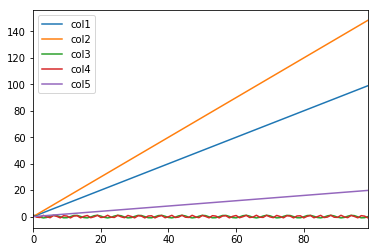

In [5]:
data.plot()

## Reshaping the Data 2 (X : Multiple, Y : Multiple)

### Dimension

In [6]:
xfeature = 3
yfeature = 2
look_back = timestep = xlen = 4
foresight = 2
ylen = 3

### Assignment

In [7]:
data_X_1d = data.iloc[:, :xfeature].values.astype('float32')
data_X_1d

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.50000000e+00,   5.40000021e-01],
       [  2.00000000e+00,   3.00000000e+00,  -4.19999987e-01],
       [  3.00000000e+00,   4.50000000e+00,  -9.90000010e-01],
       [  4.00000000e+00,   6.00000000e+00,  -6.49999976e-01],
       [  5.00000000e+00,   7.50000000e+00,   2.80000001e-01],
       [  6.00000000e+00,   9.00000000e+00,   9.59999979e-01],
       [  7.00000000e+00,   1.05000000e+01,   7.50000000e-01],
       [  8.00000000e+00,   1.20000000e+01,  -1.50000006e-01],
       [  9.00000000e+00,   1.35000000e+01,  -9.10000026e-01],
       [  1.00000000e+01,   1.50000000e+01,  -8.39999974e-01],
       [  1.10000000e+01,   1.65000000e+01,   0.00000000e+00],
       [  1.20000000e+01,   1.80000000e+01,   8.39999974e-01],
       [  1.30000000e+01,   1.95000000e+01,   9.10000026e-01],
       [  1.40000000e+01,   2.10000000e+01,   1.40000001e-01],
       [  1.50000000e+01,   2.25000000e+01,  -7.5999999

In [8]:
data_Y_1d = data.iloc[:, -yfeature:].values.astype('float32')
data_Y_1d

array([[  1.        ,   0.        ],
       [ -0.41999999,   0.2       ],
       [ -0.64999998,   0.40000001],
       [  0.95999998,   0.60000002],
       [ -0.15000001,   0.80000001],
       [ -0.83999997,   1.        ],
       [  0.83999997,   1.20000005],
       [  0.14      ,   1.39999998],
       [ -0.95999998,   1.60000002],
       [  0.66000003,   1.79999995],
       [  0.41      ,   2.        ],
       [ -1.        ,   2.20000005],
       [  0.41999999,   2.4000001 ],
       [  0.64999998,   2.5999999 ],
       [ -0.95999998,   2.79999995],
       [  0.15000001,   3.        ],
       [  0.82999998,   3.20000005],
       [ -0.85000002,   3.4000001 ],
       [ -0.13      ,   3.5999999 ],
       [  0.95999998,   3.79999995],
       [ -0.67000002,   4.        ],
       [ -0.40000001,   4.19999981],
       [  1.        ,   4.4000001 ],
       [ -0.43000001,   4.5999999 ],
       [ -0.63999999,   4.80000019],
       [  0.95999998,   5.        ],
       [ -0.16      ,   5.19999981],
 

### Reshaping : 1D to 2D (for `MinMaxScaler`)

In [9]:
data_X_1d.shape

(100, 3)

In [10]:
data_X_2d = data_X_1d.reshape(-1, xfeature)
print(data_X_2d.shape)
data_X_2d

(100, 3)


array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.50000000e+00,   5.40000021e-01],
       [  2.00000000e+00,   3.00000000e+00,  -4.19999987e-01],
       [  3.00000000e+00,   4.50000000e+00,  -9.90000010e-01],
       [  4.00000000e+00,   6.00000000e+00,  -6.49999976e-01],
       [  5.00000000e+00,   7.50000000e+00,   2.80000001e-01],
       [  6.00000000e+00,   9.00000000e+00,   9.59999979e-01],
       [  7.00000000e+00,   1.05000000e+01,   7.50000000e-01],
       [  8.00000000e+00,   1.20000000e+01,  -1.50000006e-01],
       [  9.00000000e+00,   1.35000000e+01,  -9.10000026e-01],
       [  1.00000000e+01,   1.50000000e+01,  -8.39999974e-01],
       [  1.10000000e+01,   1.65000000e+01,   0.00000000e+00],
       [  1.20000000e+01,   1.80000000e+01,   8.39999974e-01],
       [  1.30000000e+01,   1.95000000e+01,   9.10000026e-01],
       [  1.40000000e+01,   2.10000000e+01,   1.40000001e-01],
       [  1.50000000e+01,   2.25000000e+01,  -7.5999999

In [11]:
data_Y_2d = data_Y_1d.reshape(-1, yfeature)
print(data_Y_2d.shape)
data_Y_2d

(100, 2)


array([[  1.        ,   0.        ],
       [ -0.41999999,   0.2       ],
       [ -0.64999998,   0.40000001],
       [  0.95999998,   0.60000002],
       [ -0.15000001,   0.80000001],
       [ -0.83999997,   1.        ],
       [  0.83999997,   1.20000005],
       [  0.14      ,   1.39999998],
       [ -0.95999998,   1.60000002],
       [  0.66000003,   1.79999995],
       [  0.41      ,   2.        ],
       [ -1.        ,   2.20000005],
       [  0.41999999,   2.4000001 ],
       [  0.64999998,   2.5999999 ],
       [ -0.95999998,   2.79999995],
       [  0.15000001,   3.        ],
       [  0.82999998,   3.20000005],
       [ -0.85000002,   3.4000001 ],
       [ -0.13      ,   3.5999999 ],
       [  0.95999998,   3.79999995],
       [ -0.67000002,   4.        ],
       [ -0.40000001,   4.19999981],
       [  1.        ,   4.4000001 ],
       [ -0.43000001,   4.5999999 ],
       [ -0.63999999,   4.80000019],
       [  0.95999998,   5.        ],
       [ -0.16      ,   5.19999981],
 

### Scaling : `MinMax`, 0 ~ 1

In [12]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))

scaled_X = scalerX.fit_transform(data_X_2d)
scaled_Y = scalerY.fit_transform(data_Y_2d)

print(scaled_X)
print(scaled_Y)

[[ 0.          0.          1.        ]
 [ 0.01010101  0.01010101  0.76999998]
 [ 0.02020202  0.02020202  0.29000002]
 [ 0.03030303  0.03030303  0.005     ]
 [ 0.04040404  0.04040404  0.17500001]
 [ 0.05050505  0.05050505  0.63999999]
 [ 0.06060606  0.06060606  0.98000002]
 [ 0.07070707  0.07070707  0.875     ]
 [ 0.08080808  0.08080808  0.42500001]
 [ 0.09090909  0.09090909  0.04499999]
 [ 0.1010101   0.1010101   0.08000001]
 [ 0.11111111  0.11111111  0.5       ]
 [ 0.12121212  0.12121212  0.91999996]
 [ 0.13131313  0.13131313  0.95500004]
 [ 0.14141414  0.14141414  0.56999999]
 [ 0.15151516  0.15151514  0.12      ]
 [ 0.16161616  0.16161616  0.02000001]
 [ 0.17171717  0.17171717  0.36000001]
 [ 0.18181819  0.18181817  0.83000004]
 [ 0.19191919  0.19191919  0.995     ]
 [ 0.2020202   0.2020202   0.70499998]
 [ 0.21212122  0.2121212   0.22499999]
 [ 0.22222222  0.22222222  0.        ]
 [ 0.23232323  0.23232323  0.23500001]
 [ 0.24242425  0.24242423  0.70999998]
 [ 0.25252524  0.25252524

### Reshaping `X`: 2D to 3D, (Samples, Timestep-Sequence, Features)

In [13]:
len(scaled_X) - xlen - foresight - ylen

91

In [14]:
seq_X = np.array([scaled_X[i:i+xlen] for i in range(0, len(scaled_X) - xlen - (foresight - 1) - (ylen - 1))])
print('X Shape:', seq_X.shape)
seq_X

X Shape: (93, 4, 3)


array([[[ 0.        ,  0.        ,  1.        ],
        [ 0.01010101,  0.01010101,  0.76999998],
        [ 0.02020202,  0.02020202,  0.29000002],
        [ 0.03030303,  0.03030303,  0.005     ]],

       [[ 0.01010101,  0.01010101,  0.76999998],
        [ 0.02020202,  0.02020202,  0.29000002],
        [ 0.03030303,  0.03030303,  0.005     ],
        [ 0.04040404,  0.04040404,  0.17500001]],

       [[ 0.02020202,  0.02020202,  0.29000002],
        [ 0.03030303,  0.03030303,  0.005     ],
        [ 0.04040404,  0.04040404,  0.17500001],
        [ 0.05050505,  0.05050505,  0.63999999]],

       ..., 
       [[ 0.90909094,  0.90909088,  0.27500001],
        [ 0.9191919 ,  0.9191919 ,  0.005     ],
        [ 0.92929292,  0.92929292,  0.185     ],
        [ 0.93939394,  0.93939394,  0.65999997]],

       [[ 0.9191919 ,  0.9191919 ,  0.005     ],
        [ 0.92929292,  0.92929292,  0.185     ],
        [ 0.93939394,  0.93939394,  0.65999997],
        [ 0.94949496,  0.9494949 ,  0.98500001]]

In [15]:
seq_Y = np.array([scaled_Y[i:i+ylen] for i in range(xlen + (foresight - 1), len(scaled_Y) - (ylen - 1))])
print('Y Shape:', seq_Y.shape)
seq_Y

Y Shape: (93, 3, 2)


array([[[ 0.08000001,  0.05050505],
        [ 0.91999996,  0.06060607],
        [ 0.56999999,  0.07070708]],

       [[ 0.91999996,  0.06060607],
        [ 0.56999999,  0.07070708],
        [ 0.02000001,  0.08080809]],

       [[ 0.56999999,  0.07070708],
        [ 0.02000001,  0.08080809],
        [ 0.83000004,  0.09090909]],

       [[ 0.02000001,  0.08080809],
        [ 0.83000004,  0.09090909],
        [ 0.70499998,  0.10101011]],

       [[ 0.83000004,  0.09090909],
        [ 0.70499998,  0.10101011],
        [ 0.        ,  0.11111112]],

       [[ 0.70499998,  0.10101011],
        [ 0.        ,  0.11111112],
        [ 0.70999998,  0.12121213]],

       [[ 0.        ,  0.11111112],
        [ 0.70999998,  0.12121213],
        [ 0.82499999,  0.13131313]],

       [[ 0.70999998,  0.12121213],
        [ 0.82499999,  0.13131313],
        [ 0.02000001,  0.14141415]],

       [[ 0.82499999,  0.13131313],
        [ 0.02000001,  0.14141415],
        [ 0.57499999,  0.15151516]],

       [[ 

### Padding

In [16]:
padded_seq_Y = pad_sequences(seq_Y, maxlen=xlen, dtype='float32', padding='pre')
padded_seq_Y

array([[[ 0.        ,  0.        ],
        [ 0.08000001,  0.05050505],
        [ 0.91999996,  0.06060607],
        [ 0.56999999,  0.07070708]],

       [[ 0.        ,  0.        ],
        [ 0.91999996,  0.06060607],
        [ 0.56999999,  0.07070708],
        [ 0.02000001,  0.08080809]],

       [[ 0.        ,  0.        ],
        [ 0.56999999,  0.07070708],
        [ 0.02000001,  0.08080809],
        [ 0.83000004,  0.09090909]],

       [[ 0.        ,  0.        ],
        [ 0.02000001,  0.08080809],
        [ 0.83000004,  0.09090909],
        [ 0.70499998,  0.10101011]],

       [[ 0.        ,  0.        ],
        [ 0.83000004,  0.09090909],
        [ 0.70499998,  0.10101011],
        [ 0.        ,  0.11111112]],

       [[ 0.        ,  0.        ],
        [ 0.70499998,  0.10101011],
        [ 0.        ,  0.11111112],
        [ 0.70999998,  0.12121213]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.11111112],
        [ 0.70999998,  0.12121213],
        [ 0.8249

### Splitting (Train & Test)

In [17]:
test_size = .3

(train_X, test_X,
 train_Y, test_Y)  = train_test_split(seq_X, padded_seq_Y,
                                      test_size=test_size,
                                      shuffle=False,
                                      random_state=99)

print('Train_X\t: %s\nTrain_Y\t: %s\nTest_X\t: %s\nTest_Y\t: %s\n' % 
      (train_X.shape, train_Y.shape, test_X.shape, test_Y.shape))

Train_X	: (65, 4, 3)
Train_Y	: (65, 4, 2)
Test_X	: (28, 4, 3)
Test_Y	: (28, 4, 2)



---
# Sequential Output (with `padding`)

!['lstm_many_to_many_2'](lstm_many_to_many_2.jpg)

!['lstm_many_to_many_3'](lstm_charseq.jpeg)
!['Use of the complete encoded sequence in the decoder network'](lstm_attention_2.png)

### Modeling

In [18]:
_, timestepX, ndimX = train_X.shape
_, timestepY, ndimY = train_Y.shape
#_, ndimY = seq_Y.shape

HIDDEN_SIZE = 16

# simple lstm network learning
model = Sequential()
"""
2D: (batch_size, units)
3D: (batch_size, timesteps, input_dim)
"""
model.add(LSTM(HIDDEN_SIZE,  # Network Node
               input_shape=(timestepX, ndimX),  # Time-step, Feature Number
               #dropout=.3,  # Drop-Out Ratio; Among the Input
               recurrent_dropout=.3,  # Recurrent Drop-out Ratio; Among the Recurrent Network
               return_sequences=True,  # If LSTM Returns the sequence;the same dimension of the input.
               kernel_initializer=keras.initializers.Zeros(),
               recurrent_initializer='zeros',
               bias_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
               use_bias=True
              ))

#model.add(TimeDistributed(Dense(ndimY),  # Network Node
model.add(Dense(ndimY,  # Network Node
                input_shape=(ylen, ndimY),  # Time-step, Feature Number
                activation='linear',
                kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                bias_initializer=keras.initializers.Constant(value=0),))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

pprint(model.weights)
model.summary()

[<tf.Variable 'lstm_1/kernel:0' shape=(3, 64) dtype=float32_ref>,
 <tf.Variable 'lstm_1/recurrent_kernel:0' shape=(16, 64) dtype=float32_ref>,
 <tf.Variable 'lstm_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(16, 2) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32_ref>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 16)             1280      
_________________________________________________________________
dense_1 (Dense)              (None, 4, 2)              34        
Total params: 1,314
Trainable params: 1,314
Non-trainable params: 0
_________________________________________________________________


### Training

In [19]:
EPOCH_NUM = 300
BATCH_SIZE = 32

fitted = model.fit(seq_X, padded_seq_Y,
                   epochs=EPOCH_NUM,     # How many times to run back_propagation
                   batch_size=BATCH_SIZE,  # How many data to deal with at one epoch
                   verbose=2,       # 1: progress bar, 2: one line per epoch
                   #validation_data=(testX, testY),  # Validation set
                   validation_split=.2,
                   shuffle=False,
                   callbacks=[history, print_weights])

Train on 74 samples, validate on 19 samples
Epoch 1/300
[array([[-0.00242719, -0.00100394,  0.00262786, -0.00250372, -0.00214117,
         0.00249456,  0.00251032,  0.0023129 ,  0.00172486, -0.00258841,
        -0.00264857,  0.00233598,  0.00234002, -0.00264339,  0.00208605,
        -0.0024609 , -0.00237331, -0.00104673,  0.00262501, -0.0024932 ,
        -0.00200718,  0.00248023,  0.00250203,  0.00224347,  0.00166229,
        -0.0025854 , -0.00264816,  0.00226791,  0.00228035, -0.00263154,
         0.001964  , -0.00241059,  0.00248295, -0.00038556, -0.0026625 ,
         0.00250636,  0.00240266, -0.00254352,  0.00255969,  0.00244086,
        -0.00177061,  0.0025822 , -0.0026424 , -0.0024936 ,  0.00245338,
        -0.00261525, -0.00253555, -0.00252458, -0.00243126, -0.00088976,
         0.002634  , -0.00250645, -0.00213416,  0.00249917,  0.00251432,
         0.00231277,  0.00173311, -0.0025935 , -0.00265423,  0.00233858,
         0.00234475, -0.00264889,  0.00209728, -0.00246555],
      

Epoch 3/300
[array([[-0.00634916, -0.00493635,  0.00799241, -0.00703572, -0.00603735,
         0.00738625,  0.00742892,  0.00689238,  0.0037909 , -0.00740775,
        -0.00772891,  0.00700076,  0.00698457, -0.00643656,  0.00664234,
        -0.00657759, -0.00633477, -0.00498396,  0.00802307, -0.00703869,
        -0.00591605,  0.00738548,  0.00743822,  0.00681992,  0.00329451,
        -0.00742872, -0.00775925,  0.00693599,  0.00692318, -0.00656157,
         0.00653071, -0.00656716,  0.00696933, -0.00452934, -0.0080589 ,
         0.00715034,  0.00662889, -0.00746112,  0.00750811,  0.00704339,
        -0.00390868,  0.00752251, -0.00783748, -0.00724381,  0.00712564,
        -0.0077071 , -0.00737881, -0.0068155 , -0.00635892, -0.00481787,
         0.00801844, -0.00704639, -0.00602781,  0.00740312,  0.00744568,
         0.00689699,  0.00385678, -0.00742783, -0.00775323,  0.00701105,
         0.00699592, -0.00646191,  0.00666177, -0.00658833],
       [-0.00634916, -0.00493635,  0.00799241, -0.

Epoch 5/300
[array([[-0.00741893, -0.00781479,  0.01372809, -0.01093219, -0.00821921,
         0.0127069 ,  0.0127659 ,  0.01196162,  0.0082117 , -0.01152588,
        -0.01218021,  0.01213874,  0.01212709, -0.00495728,  0.01173847,
        -0.00894527, -0.0076016 , -0.00793121,  0.01379783, -0.01100128,
        -0.0081951 ,  0.0127227 ,  0.01279554,  0.01189076,  0.00716231,
        -0.01162833, -0.01229245,  0.01208522,  0.01206952, -0.0053938 ,
         0.01164433, -0.00913228,  0.01132994, -0.00851763, -0.01375236,
         0.01182055,  0.01067932, -0.01271269,  0.01273467,  0.01204877,
        -0.00819197,  0.01249212, -0.01303074, -0.01235448,  0.01223593,
        -0.01291366, -0.01247772, -0.00924514, -0.00743377, -0.00769018,
         0.01377283, -0.01094916, -0.00820562,  0.01273562,  0.01279487,
         0.01197228,  0.00829762, -0.01155964, -0.012222  ,  0.01215717,
         0.01214619, -0.00499635,  0.01176681, -0.00895528],
       [-0.00741893, -0.00781479,  0.01372809, -0.

Epoch 7/300
[array([[-0.00496239, -0.00887626,  0.01978781, -0.01329726, -0.00779528,
         0.01838699,  0.01844953,  0.01743647,  0.01429922, -0.01398042,
        -0.015202  ,  0.01769004,  0.01768132, -0.00024054,  0.01728494,
        -0.00900973, -0.00531858, -0.00909579,  0.01989969, -0.01353442,
        -0.00787414,  0.01842042,  0.0185006 ,  0.01736868,  0.0129478 ,
        -0.01428013, -0.01549426,  0.01765008,  0.01763001, -0.00076799,
         0.01721121, -0.00952563,  0.01550675, -0.01199675, -0.01965463,
         0.01624284,  0.01430119, -0.01818682,  0.01811472,  0.01733063,
        -0.01407431,  0.01722396, -0.01791688, -0.01770808,  0.01765982,
        -0.0181743 , -0.0176943 , -0.00789941, -0.00497989, -0.00874567,
         0.01985126, -0.01332035, -0.00777869,  0.01842812,  0.0184912 ,
         0.01745453,  0.01439632, -0.01402781, -0.01526183,  0.01771742,
         0.01770942, -0.00027588,  0.01732296, -0.00901093],
       [-0.00496239, -0.00887626,  0.01978781, -0.

Epoch 9/300
[array([[ -3.19981889e-04,  -8.15646537e-03,   2.61895973e-02,
         -1.36476541e-02,  -5.01595670e-03,   2.44351402e-02,
          2.44816393e-02,   2.33199839e-02,   2.12177988e-02,
         -1.42325405e-02,  -1.64310243e-02,   2.36564409e-02,
          2.36492697e-02,   5.64991869e-03,   2.32363157e-02,
         -5.83707774e-03,  -7.55820016e-04,  -8.44183937e-03,
          2.63440665e-02,  -1.41559551e-02,  -5.15976455e-03,
          2.44847126e-02,   2.45528370e-02,   2.32540015e-02,
          1.97924338e-02,  -1.48481606e-02,  -1.70021318e-02,
          2.36294772e-02,   2.36039236e-02,   5.12263738e-03,
          2.31833812e-02,  -6.84602233e-03,   1.99197885e-02,
         -1.50071569e-02,  -2.57633924e-02,   2.03511957e-02,
          1.77799948e-02,  -2.38756463e-02,   2.36364249e-02,
          2.28752755e-02,  -2.08213646e-02,   2.16572359e-02,
         -2.23798156e-02,  -2.32966766e-02,   2.33780537e-02,
         -2.35892944e-02,  -2.30119005e-02,  -3.40216164e

Epoch 11/300
[array([[ 0.0054505 , -0.00574446,  0.03292542, -0.01190487, -0.00043705,
         0.03083888,  0.03084499,  0.02959498,  0.02861337, -0.0121729 ,
        -0.0158018 ,  0.03001541,  0.03001255,  0.0121774 ,  0.02954274,
         0.0001353 ,  0.00498575, -0.00608134,  0.03311891, -0.01273885,
        -0.00064385,  0.03089906,  0.03093078,  0.02952567,  0.02722465,
        -0.01316677, -0.01671972,  0.02999702,  0.029969  ,  0.01167597,
         0.02950664, -0.00111656,  0.02491236, -0.01792295, -0.03206551,
         0.02423166,  0.02163337, -0.02976642,  0.02929018,  0.02866508,
        -0.02805061,  0.02589253, -0.02647752, -0.02910816,  0.02936475,
        -0.0292195 , -0.02842084,  0.00274701,  0.00543712, -0.00560825,
         0.03302898, -0.01193999, -0.0004202 ,  0.03090871,  0.0309161 ,
         0.02963257,  0.02874934, -0.01224045, -0.01589471,  0.03006426,
         0.03006313,  0.01216569,  0.02960324,  0.0001673 ],
       [ 0.0054505 , -0.00574446,  0.03292542, -0

         0.0356035 ,  0.00489646]], dtype=float32),
 array([  4.59467731e-02,  -1.55438227e-03,   1.62782148e-02,
        -3.74542363e-02,   2.54063662e-02,   4.86001261e-02,
         2.17702109e-02,  -1.09882653e-02,   1.43362107e-02,
         2.85312906e-02,  -2.66107563e-02,  -1.52083731e-03,
         3.94323878e-02,   1.91208459e-02,   3.01529840e-02,
         3.11578084e-02,   1.00788081e+00,   9.98533487e-01,
         1.04058015e+00,   9.87021506e-01,   1.00464237e+00,
         1.03870010e+00,   1.03871536e+00,   1.03596628e+00,
         1.03292239e+00,   9.85469937e-01,   9.81171966e-01,
         1.03718865e+00,   1.03697324e+00,   1.01578128e+00,
         1.03678942e+00,   1.00592339e+00,   1.03534525e-02,
         6.69364957e-03,  -7.13108703e-02,  -1.13174189e-02,
        -3.04608257e-04,  -6.36976510e-02,   5.47127426e-02,
         5.41800857e-02,  -8.07716176e-02,  -8.93275253e-03,
         1.43977758e-02,  -4.48292308e-02,   6.25874400e-02,
        -2.11382862e-02,  -3.572

         0.04493304,  0.02514823,  0.04432191,  0.01575921]], dtype=float32),
 array([[ 0.02761336,  0.01908631,  0.02107387, ...,  0.03738749,
         0.02378892,  0.02825755],
       [-0.02367331, -0.01592423, -0.00434922, ..., -0.02992383,
        -0.00950597, -0.0224998 ],
       [-0.01984605, -0.00887994, -0.04818273, ..., -0.02647249,
        -0.04232417, -0.01827409],
       ..., 
       [-0.02828832, -0.01958503, -0.02755756, ..., -0.03874534,
        -0.02913734, -0.02967083],
       [-0.02367972, -0.0127268 , -0.04379204, ..., -0.03094327,
        -0.03940086, -0.023194  ],
       [ 0.01323651,  0.00392961,  0.04644237, ...,  0.02069448,
         0.04347539,  0.01291029]], dtype=float32),
 array([ 0.0532761 ,  0.00306151,  0.02445665, -0.03292381,  0.03166853,
        0.05643582,  0.02951262, -0.00335681,  0.02270637,  0.03368599,
       -0.02343962,  0.00624212,  0.04722756,  0.0273042 ,  0.03775702,
        0.0396499 ,  1.01518559,  1.00314879,  1.04873645,  0.99122798,
  

Epoch 17/300
[array([[ 0.02655051,  0.01056134,  0.05506679,  0.00361429,  0.0191454 ,
         0.05208401,  0.05181241,  0.05062586,  0.05283628,  0.0049878 ,
        -0.00189464,  0.05127671,  0.05131968,  0.03433637,  0.05032587,
         0.02309522,  0.02604219,  0.00984255,  0.05528799,  0.00190201,
         0.01877555,  0.05207536,  0.05183712,  0.05045377,  0.05171055,
         0.00308924, -0.00422393,  0.05119542,  0.05119399,  0.03388702,
         0.05024552,  0.02199528,  0.0436286 , -0.03056504, -0.05205271,
         0.03694724,  0.03791609, -0.04858327,  0.04704523,  0.04739159,
        -0.05133599,  0.0399069 , -0.03962619, -0.0478095 ,  0.04875211,
        -0.04758054, -0.04521991,  0.0251732 ,  0.02655661,  0.01069317,
         0.05525399,  0.0035818 ,  0.01916643,  0.05222119,  0.05195348,
         0.05071403,  0.05305401,  0.00493496, -0.00198959,  0.05137625,
         0.05142518,  0.03437606,  0.05043882,  0.02318111],
       [ 0.02655051,  0.01056134,  0.05506679,  0

Epoch 19/300
[array([[ 0.03446435,  0.01788602,  0.06294439,  0.010906  ,  0.02683615,
         0.05969212,  0.05927924,  0.05821138,  0.06140392,  0.01276606,
         0.00594119,  0.05892899,  0.05899669,  0.04233196,  0.0577082 ,
         0.03159986,  0.03391399,  0.01705168,  0.06310759,  0.00899717,
         0.02640069,  0.05959202,  0.05921207,  0.0579425 ,  0.06033609,
         0.01070685,  0.00325165,  0.0587654 ,  0.0587818 ,  0.04185089,
         0.05754622,  0.0305681 ,  0.05069948, -0.03652708, -0.05891509,
         0.04214005,  0.04465326, -0.05508576,  0.05310547,  0.05392409,
        -0.0593325 ,  0.04554297, -0.04520255, -0.05431269,  0.05550957,
        -0.05404701, -0.05090393,  0.03324089,  0.03448088,  0.01801789,
         0.06317557,  0.0108798 ,  0.02686122,  0.05986702,  0.05945953,
         0.05832902,  0.06166023,  0.01272523,  0.00585933,  0.05905735,
         0.05913369,  0.04239709,  0.0578511 ,  0.03170378],
       [ 0.03446435,  0.01788602,  0.06294439,  0

Epoch 21/300
[array([[ 0.04264747,  0.02571904,  0.07092506,  0.01870901,  0.03489267,
         0.0674199 ,  0.06684344,  0.06594147,  0.07008009,  0.0209947 ,
         0.01449514,  0.06672081,  0.06681539,  0.05048021,  0.06517752,
         0.04035403,  0.04201775,  0.02476456,  0.07096232,  0.01661813,
         0.03436457,  0.06716419,  0.06661864,  0.06551776,  0.06901141,
         0.01879127,  0.01155516,  0.06641699,  0.066452  ,  0.04991291,
         0.06487262,  0.03936079,  0.05791717, -0.04309046, -0.06571446,
         0.04780155,  0.05170953, -0.06154864,  0.05909739,  0.06044488,
        -0.06725799,  0.05160211, -0.05141212, -0.06079587,  0.06224991,
        -0.06052066, -0.05650448,  0.04135469,  0.04267983,  0.02585203,
         0.07121681,  0.01869159,  0.03492412,  0.06764802,  0.06707861,
         0.06610172,  0.07038882,  0.02096895,  0.01442996,  0.06689089,
         0.06699786,  0.05058106,  0.06536347,  0.04048037],
       [ 0.04264747,  0.02571904,  0.07092506,  0

Epoch 23/300
[array([[ 0.05093491,  0.03387759,  0.07882541,  0.02678954,  0.04315295,
         0.07509317,  0.07433189,  0.07364723,  0.07868309,  0.02944198,
         0.02340228,  0.07448244,  0.0746037 ,  0.05860687,  0.072568  ,
         0.04919188,  0.05016018,  0.03277196,  0.07862692,  0.02449079,
         0.04248168,  0.07458431,  0.07385165,  0.07298083,  0.07749872,
         0.0270604 ,  0.02024029,  0.07394946,  0.07400014,  0.0578617 ,
         0.07203037,  0.04817273,  0.0650631 , -0.04995163, -0.07226206,
         0.05372859,  0.05883179, -0.06779461,  0.06485677,  0.06677726,
        -0.07490576,  0.05785602, -0.05798723, -0.06708249,  0.06879061,
        -0.06681245, -0.06187261,  0.04930487,  0.0509942 ,  0.03401368,
         0.07920123,  0.02678562,  0.04319631,  0.07539712,  0.07464431,
         0.07387015,  0.07906514,  0.02943779,  0.02335906,  0.07471412,
         0.07485284,  0.05876042,  0.07281639,  0.04935167],
       [ 0.05093491,  0.03387759,  0.07882541,  0

Epoch 25/300
[array([[ 0.05903412,  0.04209602,  0.08631231,  0.03484571,  0.05134096,
         0.08240553,  0.0814423 ,  0.08103274,  0.0868532 ,  0.03778369,
         0.03226865,  0.08191404,  0.08205864,  0.06638892,  0.07959383,
         0.05779824,  0.05799659,  0.04076935,  0.08569854,  0.03225981,
         0.0504327 ,  0.08149517,  0.08056167,  0.07999023,  0.08532523,
         0.035116  ,  0.02878511,  0.08101422,  0.08107305,  0.06530654,
         0.07869295,  0.05661251,  0.07182043, -0.05672926, -0.07826462,
         0.05958898,  0.0656821 , -0.07355233,  0.0701346 ,  0.07265017,
        -0.08193628,  0.06394599, -0.06448995, -0.07290152,  0.07485101,
        -0.07263186, -0.066785  ,  0.0567575 ,  0.05913829,  0.04224015,
         0.08679352,  0.03486404,  0.05140731,  0.08281003,  0.08185577,
         0.08134266,  0.08732394,  0.03781208,  0.03225537,  0.0822313 ,
         0.08239941,  0.06661481,  0.07992704,  0.05800929],
       [ 0.05903412,  0.04209602,  0.08631231,  0

Epoch 27/300
[array([[ 0.06640355,  0.04988559,  0.09280671,  0.04235749,  0.05894073,
         0.08884163,  0.08767471,  0.08759748,  0.09389803,  0.04541489,
         0.04034087,  0.08850411,  0.08866476,  0.07323556,  0.08578929,
         0.06553967,  0.06489462,  0.04819899,  0.09150171,  0.03932088,
         0.05762254,  0.08731904,  0.08619329,  0.08598818,  0.09159616,
         0.0422157 ,  0.03616689,  0.08703556,  0.08709104,  0.07154567,
         0.08434752,  0.06387981,  0.0777318 , -0.06291027, -0.08331277,
         0.06490974,  0.0717827 , -0.07844925,  0.07459753,  0.07768735,
        -0.08783588,  0.06936223, -0.07028598, -0.07787773,  0.08003872,
        -0.07757287, -0.07094856,  0.06319331,  0.06656252,  0.05004485,
         0.09336718,  0.04240548,  0.05904109,  0.08934394,  0.08818599,
         0.08800084,  0.09439897,  0.04547528,  0.04033961,  0.08891092,
         0.0890997 ,  0.07352272,  0.08621114,  0.0658    ],
       [ 0.06640355,  0.04988559,  0.09280671,  0

Epoch 29/300
[array([[ 0.07219636,  0.05640841,  0.09751296,  0.0484799 ,  0.06510694,
         0.09371065,  0.09237485,  0.09266021,  0.0987665 ,  0.05129824,
         0.04613419,  0.09355135,  0.09371727,  0.07827466,  0.09055331,
         0.07134644,  0.06989485,  0.05411522,  0.09517664,  0.04471231,
         0.0630938 ,  0.09133255,  0.09006684,  0.09025902,  0.09506365,
         0.04711167,  0.04042558,  0.0912683 ,  0.09131012,  0.07559527,
         0.08836976,  0.06864499,  0.08226619, -0.06787553, -0.08697848,
         0.0691423 ,  0.07656278, -0.08210047,  0.07791438,  0.08149215,
        -0.09201691,  0.07351486, -0.0746059 , -0.08161798,  0.08393668,
        -0.08120457, -0.07407992,  0.06797634,  0.07235122,  0.05657252,
         0.0979772 ,  0.04853016,  0.06521478,  0.09420939,  0.0928881 ,
         0.09308661,  0.09900527,  0.05130492,  0.04596547,  0.09396785,
         0.09415911,  0.07848773,  0.09099764,  0.07152978],
       [ 0.07219636,  0.05640841,  0.09751296,  0

Epoch 31/300
[array([[ 0.07570449,  0.06083233,  0.09991061,  0.05243104,  0.06906869,
         0.09655882,  0.09512924,  0.09575554,  0.10071802,  0.05446595,
         0.04814903,  0.09657488,  0.09673525,  0.08086725,  0.09350888,
         0.07428262,  0.07225559,  0.0576039 ,  0.09627076,  0.04758348,
         0.06601412,  0.09313085,  0.09181673,  0.09237269,  0.09510311,
         0.04874172,  0.04001865,  0.09326401,  0.09328976,  0.07683916,
         0.09041745,  0.06988057,  0.08514157, -0.07122173, -0.08910024,
         0.07195888,  0.07968467, -0.08435913,  0.07997401,  0.08390111,
        -0.09421691,  0.07606833, -0.07697733, -0.08396407,  0.08637136,
        -0.08335035, -0.07609174,  0.07075873,  0.07566945,  0.06093931,
         0.09992718,  0.05237791,  0.06907127,  0.09682088,  0.09542757,
         0.09602229,  0.10016792,  0.05417604,  0.04739594,  0.0968002 ,
         0.09696969,  0.08070096,  0.09381292,  0.07405876],
       [ 0.07570449,  0.06083233,  0.09991061,  0

Epoch 33/300
[array([[ 0.07718588,  0.06328835,  0.10038512,  0.0543925 ,  0.07102139,
         0.09770495,  0.0962544 ,  0.09717629,  0.10025806,  0.05518312,
         0.04685563,  0.09787747,  0.09802558,  0.08137675,  0.09494583,
         0.07468611,  0.07233086,  0.05884176,  0.09531187,  0.0481824 ,
         0.06664767,  0.09311705,  0.09183674,  0.09269314,  0.09257247,
         0.04755673,  0.03609699,  0.09340505,  0.09341836,  0.07579774,
         0.09084213,  0.06818141,  0.08666153, -0.07318732, -0.09001186,
         0.07358448,  0.08142503, -0.08551846,  0.08104873,  0.08519862,
        -0.09485586,  0.07730141, -0.07773567, -0.08520338,  0.08764195,
        -0.08432169, -0.07722747,  0.07191481,  0.07675052,  0.06325584,
         0.09962794,  0.05410721,  0.07077984,  0.09749094,  0.09611571,
         0.09708674,  0.0985192 ,  0.05434111,  0.04521833,  0.09769832,
         0.09782693,  0.08053531,  0.0949359 ,  0.07373056],
       [ 0.07718588,  0.06328835,  0.10038512,  0

Epoch 35/300
[array([[ 0.07774088,  0.06488661,  0.09997047,  0.05546667,  0.07207122,
         0.09805017,  0.09660849,  0.09780699,  0.09872932,  0.05481731,
         0.04422294,  0.09837047,  0.0985042 ,  0.0809295 ,  0.09565711,
         0.07395308,  0.07133559,  0.05907341,  0.09340353,  0.0477406 ,
         0.06622402,  0.09223223,  0.0910214 ,  0.09214505,  0.08897952,
         0.045131  ,  0.03094343,  0.09265241,  0.09265571,  0.07370777,
         0.09047282,  0.0651915 ,  0.08753038, -0.07449656, -0.09034594,
         0.07464033,  0.08250308, -0.08614392,  0.08164234,  0.0859537 ,
        -0.09476877,  0.07791334, -0.07776251, -0.0859037 ,  0.08834741,
        -0.08473119, -0.07792971,  0.07230382,  0.07681322,  0.06468335,
         0.09830131,  0.05489558,  0.07152757,  0.09724911,  0.09592912,
         0.09726957,  0.09568588,  0.05332258,  0.04165757,  0.09768821,
         0.09776783,  0.07928973,  0.09525047,  0.07214414],
       [ 0.07774089,  0.06488661,  0.09997047,  0

Epoch 37/300
[array([[ 0.07841116,  0.06668186,  0.09960479,  0.05670385,  0.07327319,
         0.09842604,  0.0969817 ,  0.09847021,  0.09730794,  0.05465495,
         0.04193659,  0.09890065,  0.09902062,  0.08056048,  0.09637666,
         0.07337989,  0.07040694,  0.05950766,  0.09150064,  0.04744133,
         0.0659232 ,  0.09132819,  0.09017944,  0.09157979,  0.08549865,
         0.04287014,  0.0261894 ,  0.09188651,  0.09187876,  0.07165118,
         0.09006988,  0.06232096,  0.08837404, -0.07580444, -0.09064996,
         0.07568461,  0.08356456, -0.0867283 ,  0.08219168,  0.08666554,
        -0.09467751,  0.07852411, -0.07783163, -0.08656178,  0.08901258,
        -0.08511113, -0.0785822 ,  0.07268535,  0.07702645,  0.06633373,
         0.09705183,  0.05587712,  0.07246001,  0.09705999,  0.09578108,
         0.09750714,  0.09302081,  0.05255085,  0.03851983,  0.09773849,
         0.09777005,  0.07815477,  0.09559007,  0.07076777],
       [ 0.07841117,  0.06668186,  0.09960479,  0

Epoch 39/300
[array([[ 0.07970048,  0.06912508,  0.09976435,  0.05858158,  0.07511375,
         0.09925573,  0.09777885,  0.09958145,  0.09657623,  0.05530667,
         0.04077175,  0.09989612,  0.10000418,  0.08078959,  0.09748131,
         0.07360011,  0.07012736,  0.06071023,  0.09009389,  0.0478673 ,
         0.06633193,  0.09085384,  0.08973853,  0.09144648,  0.08268961,
         0.04146891,  0.02254967,  0.09157085,  0.09154922,  0.0701798 ,
         0.09003841,  0.06026872,  0.08950846, -0.07742839, -0.09120536,
         0.07699275,  0.08493069, -0.08752697,  0.08292462,  0.08759284,
        -0.09494767,  0.07943961, -0.07831532, -0.08743491,  0.08990856,
        -0.08573383, -0.07938698,  0.07344142,  0.07795361,  0.06867854,
         0.09643412,  0.05756512,  0.07410216,  0.09741318,  0.0961379 ,
         0.09827122,  0.09116907,  0.05270174,  0.03661215,  0.09833764,
         0.09832677,  0.0777226 ,  0.0963816 ,  0.07031073],
       [ 0.07970048,  0.06912508,  0.09976435,  0

Epoch 41/300
[array([[ 0.08163171,  0.072179  ,  0.10050407,  0.06109064,  0.07758941,
         0.10058606,  0.09904807,  0.1011823 ,  0.09659356,  0.05679017,
         0.04075099,  0.10140029,  0.10149843,  0.08166847,  0.09901604,
         0.07465423,  0.07056406,  0.06268258,  0.08925697,  0.04905582,
         0.06749298,  0.09088074,  0.08976871,  0.09181434,  0.08061168,
         0.04099491,  0.02004795,  0.09177679,  0.09173855,  0.06937043,
         0.09044564,  0.05911447,  0.09097337, -0.079395  , -0.09205461,
         0.07859348,  0.08663661, -0.08858047,  0.08387946,  0.08877626,
        -0.09562803,  0.08069202, -0.07924356, -0.08856359,  0.09107699,
        -0.08663926, -0.0803802 ,  0.07461806,  0.07961691,  0.0716736 ,
         0.09650884,  0.05994569,  0.0764453 ,  0.09836057,  0.09705248,
         0.09960603,  0.09018479,  0.05379341,  0.03594741,  0.09953237,
         0.09948546,  0.07804897,  0.09767316,  0.07081489],
       [ 0.08163172,  0.072179  ,  0.10050407,  0

Epoch 43/300
[array([[ 0.08398919,  0.07560658,  0.10164747,  0.06400308,  0.080472  ,
         0.10226075,  0.10064317,  0.10311616,  0.09713274,  0.05883264,
         0.04151733,  0.1032518 ,  0.10334139,  0.08299673,  0.10084586,
         0.07627603,  0.07150284,  0.06516426,  0.08882447,  0.05076794,
         0.06916976,  0.0912638 ,  0.09013395,  0.09253669,  0.07904631,
         0.0411762 ,  0.01834336,  0.09235228,  0.0922956 ,  0.06903045,
         0.0911645 ,  0.05859228,  0.09266169, -0.08158693, -0.09310756,
         0.08038947,  0.08856957, -0.08981001,  0.08498822,  0.09013603,
        -0.09659301,  0.08217143, -0.08047175, -0.08986845,  0.09243291,
        -0.08773955, -0.08150446,  0.07608127,  0.08177155,  0.07506682,
         0.09706589,  0.06277019,  0.0792388 ,  0.0997181 ,  0.09835305,
         0.10133028,  0.0898018 ,  0.05552153,  0.03613965,  0.10113521,
         0.10105689,  0.07890157,  0.09930851,  0.07197753],
       [ 0.0839892 ,  0.07560658,  0.10164747,  0

Epoch 45/300
[array([[ 0.08651537,  0.07916214,  0.10295957,  0.06706722,  0.0835063 ,
         0.10407502,  0.1023702 ,  0.10518201,  0.09789345,  0.06111214,
         0.0426391 ,  0.10524271,  0.10532426,  0.08451402,  0.10279256,
         0.0781361 ,  0.07266142,  0.06786255,  0.08856239,  0.05271298,
         0.07107116,  0.09179676,  0.09063945,  0.09340796,  0.07770015,
         0.04165857,  0.0170092 ,  0.09308386,  0.09300765,  0.06889209,
         0.09201335,  0.05834435,  0.09443145, -0.08385909, -0.09423858,
         0.08225621,  0.09058432, -0.09110487,  0.08615373,  0.09156057,
        -0.09767175,  0.08373581, -0.08181765, -0.09123836,  0.09385816,
        -0.08891341, -0.08267609,  0.07765359,  0.08412678,  0.07859933,
         0.09782586,  0.06576605,  0.08220481,  0.10124544,  0.09981291,
         0.10321271,  0.08967257,  0.05752669,  0.03672392,  0.10290585,
         0.10279804,  0.07997909,  0.10108291,  0.07342443],
       [ 0.08651538,  0.07916214,  0.10295957,  0

Epoch 47/300
[array([[ 0.08901669,  0.08267545,  0.10425283,  0.07010191,  0.08650742,
         0.10586809,  0.10407622,  0.10722404,  0.0986345 ,  0.06338546,
         0.04378024,  0.10721133,  0.10728452,  0.08601479,  0.10471669,
         0.07997947,  0.07381801,  0.07056613,  0.08828005,  0.05467158,
         0.07297652,  0.09231261,  0.09112719,  0.09426333,  0.0763376 ,
         0.04216127,  0.01570704,  0.09379984,  0.09370346,  0.06873825,
         0.09284571,  0.05808256,  0.096172  , -0.08610224, -0.09534719,
         0.08409818,  0.09256929, -0.09237669,  0.08729803,  0.09296128,
        -0.09872787,  0.08527475, -0.08313969, -0.0925849 ,  0.09525888,
        -0.0900642 , -0.08382791,  0.0791957 ,  0.08646393,  0.08209226,
         0.09856442,  0.06873734,  0.08514251,  0.10275326,  0.10125274,
         0.10507397,  0.08951737,  0.0595362 ,  0.03733679,  0.10465709,
         0.10451927,  0.0810424 ,  0.10283596,  0.07486456],
       [ 0.0890167 ,  0.08267545,  0.10425283,  0

Epoch 49/300
[array([[ 0.09139936,  0.08607212,  0.10543004,  0.07302378,  0.08938972,
         0.10755904,  0.10568406,  0.10916533,  0.09922856,  0.0655317 ,
         0.04476466,  0.10907727,  0.10914116,  0.08739334,  0.10654911,
         0.08167642,  0.07486181,  0.07317876,  0.0878784 ,  0.05653858,
         0.07477991,  0.0927261 ,  0.09151652,  0.09501991,  0.07483695,
         0.04254032,  0.01426007,  0.09441339,  0.09429618,  0.06845641,
         0.09358795,  0.05765726,  0.09782906, -0.08826539, -0.09638222,
         0.08586949,  0.09447093, -0.09358113,  0.08838195,  0.09429418,
        -0.09969122,  0.08673333, -0.08436602, -0.09386402,  0.09658831,
        -0.09114289, -0.08492641,  0.0806376 ,  0.08867639,  0.08546738,
         0.09916405,  0.07159356,  0.08795864,  0.10414545,  0.1025814 ,
         0.10682499,  0.08918784,  0.06141326,  0.03778636,  0.1062953 ,
         0.10612543,  0.08196743,  0.10448772,  0.07614847],
       [ 0.09139937,  0.08607212,  0.10543004,  0

Epoch 51/300
[array([[ 0.093658  ,  0.0893567 ,  0.106479  ,  0.07583252,  0.09215248,
         0.10914064,  0.10718687,  0.11100078,  0.09965643,  0.06753919,
         0.04556481,  0.11083454,  0.11088786,  0.08863722,  0.10828543,
         0.08321202,  0.07578555,  0.07570253,  0.08734649,  0.05831089,
         0.07647821,  0.09303017,  0.09180091,  0.09567247,  0.073184  ,
         0.04278102,  0.01264447,  0.09491829,  0.09477935,  0.06803457,
         0.09423572,  0.05705162,  0.0993997 , -0.09034926, -0.0973383 ,
         0.08756901,  0.09628798, -0.09471482,  0.0894025 ,  0.09555661,
        -0.10055299,  0.08810706, -0.08548794, -0.09507282,  0.09784323,
        -0.09214476, -0.08596967,  0.08197285,  0.09075735,  0.08872908,
         0.09960914,  0.07433379,  0.09065188,  0.10541289,  0.10379032,
         0.1084595 ,  0.08866125,  0.06314354,  0.03804135,  0.10781299,
         0.10760855,  0.08273869,  0.10603276,  0.07725777],
       [ 0.09365801,  0.0893567 ,  0.106479  ,  0

Epoch 53/300
[array([[ 0.09583827,  0.09257609,  0.10743921,  0.07857393,  0.09484243,
         0.1106496 ,  0.10861979,  0.1127675 ,  0.09996548,  0.06946048,
         0.04624411,  0.11252099,  0.11256234,  0.08979033,  0.10995943,
         0.0846402 ,  0.07664392,  0.07819412,  0.08672747,  0.0600444 ,
         0.078128  ,  0.09326541,  0.09201901,  0.09626258,  0.07142923,
         0.04294775,  0.01092981,  0.09535717,  0.09519519,  0.0675225 ,
         0.09482644,  0.05633068,  0.100911  , -0.092384  , -0.09823735,
         0.0892214 ,  0.09804942, -0.0957985 ,  0.09037811,  0.09677029,
        -0.10134098,  0.08942094, -0.08653395, -0.09623262,  0.09904608,
        -0.09309125, -0.08697445,  0.08323248,  0.09275795,  0.09192616,
         0.09994698,  0.077007  ,  0.09327235,  0.10659888,  0.10492077,
         0.11002017,  0.08799253,  0.06478538,  0.03816958,  0.10925395,
         0.10901267,  0.08340722,  0.10750992,  0.0782535 ],
       [ 0.09583828,  0.09257609,  0.10743921,  0

Epoch 55/300
[array([[ 0.09799643,  0.09578317,  0.10836343,  0.08130169,  0.09751462,
         0.11213289,  0.11002785,  0.11451185,  0.10022099,  0.07136267,
         0.0468901 ,  0.11418436,  0.11421235,  0.09091074,  0.11161335,
         0.08603176,  0.07750607,  0.08071896,  0.0860786 ,  0.06180668,
         0.07979789,  0.09348423,  0.09222058,  0.0968429 ,  0.06963946,
         0.04312491,  0.00920998,  0.09578448,  0.09559781,  0.06698599,
         0.09540746,  0.05558081,  0.10239645, -0.09440523, -0.09910768,
         0.09085651,  0.09979032, -0.09685846,  0.09133212,  0.0979623 ,
        -0.10209198,  0.09070655, -0.08754131, -0.09737018,  0.10022503,
        -0.09400994, -0.08796161,  0.0844562 ,  0.09474162,  0.09511359,
         0.1002415 ,  0.07967079,  0.09587933,  0.10775934,  0.10602609,
         0.11156066,  0.08725764,  0.06641414,  0.03826568,  0.11067381,
         0.11039397,  0.08404126,  0.10896809,  0.07921668],
       [ 0.09799644,  0.09578317,  0.10836343,  0

Epoch 57/300
[array([[ 0.10017268,  0.09901427,  0.10929102,  0.08405317,  0.10020764,
         0.11362489,  0.11144405,  0.11626739,  0.10047228,  0.07329421,
         0.04756809,  0.11585929,  0.11587259,  0.09204152,  0.11327785,
         0.0874388 ,  0.07842278,  0.08332205,  0.0854433 ,  0.06364563,
         0.0815368 ,  0.09372584,  0.09244294,  0.09745242,  0.06786498,
         0.0433756 ,  0.00755563,  0.09624068,  0.09602748,  0.06647478,
         0.09601382,  0.0548673 ,  0.10388032, -0.09643839, -0.09997018,
         0.09249578,  0.10153595, -0.09791385,  0.09228162,  0.0991523 ,
        -0.10283327,  0.09198678, -0.08853728, -0.09850498,  0.10140061,
        -0.09492107, -0.08894641,  0.08567309,  0.09675376,  0.09832907,
         0.10054088,  0.08236516,  0.09851424,  0.10893552,  0.10714566,
         0.11311993,  0.08651413,  0.06808457,  0.03840061,  0.11211317,
         0.1117935 ,  0.08469182,  0.11044295,  0.08020735],
       [ 0.10017268,  0.09901427,  0.10929102,  0

Epoch 59/300
[array([[ 0.10238284,  0.10228349,  0.11023855,  0.08684267,  0.10293641,
         0.11513962,  0.11288194,  0.11804757,  0.10074047,  0.07527414,
         0.0483049 ,  0.11755979,  0.11755708,  0.09320057,  0.1149653 ,
         0.08888256,  0.07941516,  0.08601978,  0.08484095,  0.06557968,
         0.08336388,  0.09400728,  0.09270231,  0.09810775,  0.06612825,
         0.04372687,  0.0059974 ,  0.09674317,  0.09650151,  0.06601094,
         0.09666049,  0.05421896,  0.10537256, -0.09849392, -0.10083351,
         0.09414794,  0.10329666, -0.09897258,  0.09323364,  0.1003484 ,
        -0.10357633,  0.09327098, -0.08953302, -0.09964501,  0.10258123,
        -0.09583302, -0.08993512,  0.08689522,  0.09881224,  0.10158709,
         0.10086581,  0.08510531,  0.10119294,  0.11014449,  0.10829585,
         0.11471375,  0.08578689,  0.06981835,  0.03860378,  0.11358858,
         0.11322804,  0.08538043,  0.111949  ,  0.08125027],
       [ 0.10238284,  0.10228349,  0.11023855,  0

Epoch 61/300
[array([[ 0.10462322,  0.1055882 ,  0.11120342,  0.08966672,  0.10569751,
         0.11667432,  0.11433894,  0.11984953,  0.10102284,  0.07729785,
         0.04909512,  0.11928296,  0.11926291,  0.09438477,  0.11667316,
         0.09035885,  0.08047985,  0.08880655,  0.08427059,  0.06760376,
         0.08527437,  0.09432685,  0.09299713,  0.09880671,  0.06442845,
         0.04417548,  0.00453223,  0.09728989,  0.09701791,  0.06559304,
         0.09734555,  0.05363353,  0.10687149, -0.10057039, -0.1016963 ,
         0.09581158,  0.10507086, -0.10003327,  0.09418695,  0.10154916,
        -0.10431958,  0.09455749, -0.09052653, -0.1007889 ,  0.10376543,
        -0.09674441, -0.09092659,  0.08812068,  0.10091283,  0.10488468,
         0.10121363,  0.08788726,  0.10391147,  0.11138328,  0.10947389,
         0.11633892,  0.08507311,  0.07161036,  0.03886964,  0.11509681,
         0.11469442,  0.08610395,  0.11348344,  0.08234102],
       [ 0.10462322,  0.1055882 ,  0.11120342,  0

Epoch 63/300
[array([[ 0.10688072,  0.10891815,  0.11217324,  0.09251358,  0.1084789 ,
         0.11821782,  0.11580436,  0.1216623 ,  0.10130444,  0.07934913,
         0.04991706,  0.12101749,  0.12097875,  0.09558041,  0.11839141,
         0.0918508 ,  0.08160096,  0.09166641,  0.08372062,  0.06970138,
         0.08725188,  0.09467313,  0.09331655,  0.0995375 ,  0.06275304,
         0.04470252,  0.00313975,  0.09786879,  0.09756469,  0.06520735,
         0.09805837,  0.05309261,  0.10836968, -0.10266057, -0.10255216,
         0.09748034,  0.10685103, -0.10108986,  0.09513618,  0.10274837,
        -0.10505495,  0.09583922, -0.09150943, -0.10193051,  0.10494671,
        -0.097649  , -0.09191599,  0.08934059,  0.10304058,  0.10821097,
         0.10156964,  0.09069816,  0.1066566 ,  0.11263876,  0.11066731,
         0.11798281,  0.08435579,  0.07344233,  0.03917479,  0.11662479,
         0.11617937,  0.08684646,  0.11503473,  0.08346036],
       [ 0.10688072,  0.10891815,  0.11217324,  0

Epoch 65/300
[array([[ 0.10914177,  0.11226305,  0.11313475,  0.09537135,  0.11126833,
         0.11975827,  0.11726684,  0.12347437,  0.10156924,  0.08141117,
         0.05074762,  0.12275147,  0.12269264,  0.09677283,  0.12010941,
         0.09334051,  0.08276142,  0.09458327,  0.08317828,  0.07185537,
         0.08927923,  0.09503356,  0.09364869,  0.10028723,  0.06108843,
         0.04528736,  0.00179784,  0.09846664,  0.09812871,  0.06483877,
         0.09878734,  0.05257596,  0.10985927, -0.10475685, -0.10339428,
         0.09914748,  0.10862926, -0.10213595,  0.09607561,  0.10393945,
        -0.10577393,  0.09710874, -0.09247297, -0.10306333,  0.10611823,
        -0.09854019, -0.09289816,  0.09054558,  0.10518   ,  0.11155514,
         0.10191791,  0.09352499,  0.10941492,  0.11389692,  0.11186275,
         0.11963206,  0.0836166 ,  0.07529516,  0.0394942 ,  0.11815866,
         0.11766888,  0.08759087,  0.11659058,  0.08458789],
       [ 0.10914177,  0.11226305,  0.11313475,  0

Epoch 67/300
[array([[ 0.11139736,  0.11561666,  0.11407908,  0.0982324 ,  0.11405791,
         0.12128767,  0.11871869,  0.12527797,  0.10180668,  0.08347271,
         0.05157113,  0.12447689,  0.12439652,  0.09795217,  0.12181999,
         0.09481598,  0.08394955,  0.09754635,  0.08263534,  0.07405396,
         0.0913447 ,  0.09539969,  0.09398552,  0.10104711,  0.0594264 ,
         0.04591602,  0.00049185,  0.09907451,  0.09870107,  0.06447731,
         0.09952455,  0.0520701 ,  0.11133505, -0.10685434, -0.10421825,
         0.10080861,  0.11040036, -0.10316724,  0.09700141,  0.10511797,
        -0.10647105,  0.09836113, -0.09341141, -0.10418302,  0.10727543,
        -0.09941363, -0.09386961,  0.0917295 ,  0.10732075,  0.11491057,
         0.10224774,  0.09635935,  0.11217774,  0.11514828,  0.11305116,
         0.12127765,  0.08284359,  0.077156  ,  0.03981079,  0.11968905,
         0.11915347,  0.08832563,  0.11814269,  0.08570984],
       [ 0.11139736,  0.11561666,  0.11407908,  0

Epoch 69/300
[array([[ 0.11364338,  0.11897624,  0.1150027 ,  0.10109315,  0.11684408,
         0.12280242,  0.12015647,  0.12706944,  0.10201316,  0.08552872,
         0.05238105,  0.12619004,  0.12608668,  0.09911432,  0.12351974,
         0.09627213,  0.0851603 ,  0.10055012,  0.08208961,  0.07629135,
         0.09344269,  0.09576833,  0.09432405,  0.10181349,  0.05776595,
         0.0465829 , -0.00078266,  0.09968878,  0.09927823,  0.06411993,
         0.10026664,  0.05157071,  0.1127947 , -0.10895091, -0.10502224,
         0.10246168,  0.11216199, -0.10418183,  0.09791186,  0.10628188,
        -0.10714436,  0.09959426, -0.09432247, -0.10528757,  0.10841618,
        -0.10026746, -0.09482868,  0.09288983,  0.10945813,  0.11827432,
         0.10255522,  0.09919731,  0.11494105,  0.11638875,  0.11422868,
         0.12291551,  0.08203322,  0.07901917,  0.04011764,  0.12121182,
         0.12062896,  0.08904623,  0.11968723,  0.08682057],
       [ 0.11364338,  0.11897624,  0.1150027 ,  0

Epoch 71/300
[array([[ 0.11588192,  0.12234557,  0.11590713,  0.10395641,  0.11962962,
         0.12430398,  0.12158161,  0.12885039,  0.1021906 ,  0.08758111,
         0.05317867,  0.12789246,  0.1277647 ,  0.10026087,  0.12521011,
         0.09771079,  0.08639482,  0.10359627,  0.08154277,  0.07856855,
         0.09557442,  0.09614062,  0.09466536,  0.10258734,  0.05610925,
         0.04728938, -0.00202429,  0.10031053,  0.09986126,  0.06376819,
         0.10101449,  0.05107959,  0.11423981, -0.11104886, -0.10580738,
         0.10410844,  0.11391611, -0.10518075,  0.09880789,  0.10743231,
        -0.10779536,  0.10080949, -0.0952075 , -0.10637809,  0.10954168,
        -0.1011028 , -0.09577623,  0.0940282 ,  0.11159411,  0.1216501 ,
         0.10284184,  0.10204151,  0.11770754,  0.11761979,  0.11539668,
         0.12454712,  0.08118724,  0.08088642,  0.04041573,  0.12272841,
         0.12209683,  0.08975422,  0.12122557,  0.08792179],
       [ 0.11588192,  0.12234557,  0.11590713,  0

Epoch 73/300
[array([[ 0.1181146 ,  0.12572642,  0.11679477,  0.1068236 ,  0.12241616,
         0.12579387,  0.12299554,  0.13062209,  0.10234277,  0.08963188,
         0.05396738,  0.12958558,  0.12943199,  0.10139416,  0.12689221,
         0.09913459,  0.08765538,  0.10668549,  0.08099885,  0.08088648,
         0.09774116,  0.0965191 ,  0.0950119 ,  0.10337068,  0.05446202,
         0.04803892, -0.00322743,  0.10094203,  0.10045251,  0.06342619,
         0.10176991,  0.05060192,  0.11567156, -0.11314961, -0.10657488,
         0.10574991,  0.11566402, -0.10616491,  0.09969027,  0.10857013,
        -0.10842592,  0.10200795, -0.09606802, -0.10745548,  0.11065284,
        -0.10192074, -0.09671289,  0.09514628,  0.11373046,  0.1250397 ,
         0.10311092,  0.1048934 ,  0.12047879,  0.11884345,  0.11655717,
         0.12617408,  0.08031062,  0.08276007,  0.04070894,  0.12424064,
         0.12355894,  0.09045266,  0.12275916,  0.08901676],
       [ 0.1181146 ,  0.12572642,  0.11679477,  0

Epoch 75/300
[array([[ 0.12034211,  0.12911929,  0.11766749,  0.1096951 ,  0.12520424,
         0.12727301,  0.12439918,  0.13238516,  0.1024731 ,  0.09168212,
         0.0547499 ,  0.1312701 ,  0.1310893 ,  0.10251595,  0.12856655,
         0.10054547,  0.08894344,  0.10981715,  0.08046173,  0.08324505,
         0.09994324,  0.09690592,  0.09536575,  0.10416507,  0.0528299 ,
         0.04883426, -0.0043868 ,  0.10158514,  0.10105387,  0.06309772,
         0.10253422,  0.05014252,  0.11709064, -0.11525384, -0.10732558,
         0.10738656,  0.11740642, -0.10713485,  0.10055951,  0.10969581,
        -0.10903753,  0.10319033, -0.09690512, -0.1085202 ,  0.11175022,
        -0.10272206, -0.09763893,  0.09624531,  0.11586807,  0.12844355,
         0.1033654 ,  0.10775331,  0.12325534,  0.1200612 ,  0.11771156,
         0.12779731,  0.07940817,  0.08464152,  0.04100057,  0.12574963,
         0.12501651,  0.09114415,  0.12428882,  0.09010803],
       [ 0.12034211,  0.12911929,  0.11766749,  0

Epoch 77/300
[array([[  1.22566663e-01,   1.32527679e-01,   1.18527062e-01,
          1.12573572e-01,   1.27996609e-01,   1.28742978e-01,
          1.25794098e-01,   1.34141266e-01,   1.02583721e-01,
          9.37339589e-02,   5.55278957e-02,   1.32947713e-01,
          1.32738322e-01,   1.03628047e-01,   1.30234689e-01,
          1.01945482e-01,   9.02602673e-02,   1.12992927e-01,
          7.99331442e-02,   8.56453180e-02,   1.02181889e-01,
          9.73023772e-02,   9.57281142e-02,   1.04971610e-01,
          5.12149110e-02,   4.96768057e-02,  -5.50101697e-03,
          1.02241039e-01,   1.01666555e-01,   6.27844632e-02,
          1.03308454e-01,   4.97033559e-02,   1.18498750e-01,
         -1.17363945e-01,  -1.08060732e-01,   1.09020241e-01,
          1.19145356e-01,  -1.08091712e-01,   1.01416633e-01,
          1.10810578e-01,  -1.09631754e-01,   1.04358092e-01,
         -9.77201909e-02,  -1.09573491e-01,   1.12835087e-01,
         -1.03507914e-01,  -9.85553339e-02,   9.73270163

Epoch 79/300
[array([[ 0.12478971,  0.13595486,  0.11937401,  0.11546134,  0.13079555,
         0.1302046 ,  0.12718107,  0.13589148,  0.10267485,  0.09578844,
         0.05630092,  0.13461937,  0.13438   ,  0.104731  ,  0.13189757,
         0.10333523,  0.09160604,  0.11621415,  0.07941332,  0.08808772,
         0.10445768,  0.09770863,  0.09609918,  0.1057905 ,  0.04961709,
         0.05056627, -0.00657125,  0.10290989,  0.10229075,  0.06248647,
         0.10409282,  0.04928428,  0.11989716, -0.11948217, -0.10878091,
         0.11065256,  0.12088254, -0.10903624,  0.10226227,  0.11191529,
        -0.11020917,  0.10551225, -0.09851383, -0.11061616,  0.11390826,
        -0.10427894, -0.09946276,  0.09839237,  0.12015439,  0.13530758,
         0.10383584,  0.11350714,  0.12883423,  0.1224844 ,  0.12000735,
         0.13103832,  0.07753105,  0.08843449,  0.04158225,  0.12876351,
         0.12792368,  0.0925118 ,  0.12734167,  0.09228569],
       [ 0.12478972,  0.13595486,  0.11937401,  0

Epoch 81/300
[array([[ 0.1270088 ,  0.13939863,  0.12020684,  0.11835599,  0.13359869,
         0.13165596,  0.12855819,  0.13763364,  0.10274566,  0.0978428 ,
         0.05706608,  0.13628298,  0.13601221,  0.1058229 ,  0.13355313,
         0.10471231,  0.09297781,  0.11947671,  0.07890225,  0.09056822,
         0.10676686,  0.09812335,  0.09647769,  0.10661984,  0.04803774,
         0.05149965, -0.00759875,  0.10358994,  0.10292476,  0.06220304,
         0.10488553,  0.04888415,  0.12128463, -0.12160725, -0.10948532,
         0.11228237,  0.12261672, -0.10996744,  0.10309553,  0.11300886,
        -0.11076912,  0.1066517 , -0.09928502, -0.11164714,  0.11496866,
        -0.1050343 , -0.1003603 ,  0.09944028,  0.12230155,  0.13876867,
         0.10405056,  0.11640054,  0.13163607,  0.12368839,  0.12114737,
         0.13265461,  0.07655569,  0.09034368,  0.0418683 ,  0.13026688,
         0.12937175,  0.0931863 ,  0.12886344,  0.09336983],
       [ 0.1270088 ,  0.13939863,  0.12020684,  0

Epoch 83/300
[array([[ 0.1292228 ,  0.142859  ,  0.12102446,  0.12125689,  0.13640539,
         0.13309588,  0.12992443,  0.13936661,  0.10279511,  0.09989545,
         0.05782069,  0.13793735,  0.13763386,  0.10690238,  0.13520037,
         0.106075  ,  0.09437326,  0.12277853,  0.07839929,  0.09308425,
         0.10910703,  0.09854524,  0.09686244,  0.10745806,  0.0464767 ,
         0.05247404, -0.00858605,  0.10427963,  0.10356707,  0.06193292,
         0.10568517,  0.04850109,  0.12266081, -0.12373923, -0.11017358,
         0.11390957,  0.12434772, -0.1108849 ,  0.10391605,  0.11409083,
        -0.11131119,  0.10777607, -0.1000332 , -0.11266601,  0.11601584,
        -0.10577361, -0.10124757,  0.10047029,  0.12444901,  0.14224826,
         0.10424971,  0.11930322,  0.13444439,  0.1248852 ,  0.12228015,
         0.13426596,  0.07555445,  0.0922583 ,  0.042147  ,  0.13176569,
         0.13081396,  0.09385223,  0.13038006,  0.09444788],
       [ 0.1292228 ,  0.142859  ,  0.12102446,  0

Epoch 85/300
[array([[ 0.13143085,  0.14633608,  0.12182596,  0.1241636 ,  0.13921523,
         0.13452341,  0.13127884,  0.14108956,  0.10282241,  0.10194509,
         0.05856247,  0.13958158,  0.13924401,  0.10796833,  0.13683838,
         0.10742187,  0.09579027,  0.1261178 ,  0.07790393,  0.09563347,
         0.11147602,  0.09897311,  0.09725232,  0.1083037 ,  0.04493403,
         0.05348683, -0.00953541,  0.10497756,  0.10421635,  0.06167503,
         0.1064904 ,  0.04813345,  0.12402549, -0.12587826, -0.11084544,
         0.11553418,  0.12607551, -0.11178828,  0.10472352,  0.11516089,
        -0.11183514,  0.10888511, -0.10075794, -0.11367246,  0.11704948,
        -0.10649658, -0.10212431,  0.10148207,  0.12659557,  0.14574635,
         0.10443207,  0.12221453,  0.13725854,  0.1260736 ,  0.12340453,
         0.13587119,  0.07452635,  0.09417672,  0.04241557,  0.13325869,
         0.13224909,  0.09450818,  0.13189043,  0.09551807],
       [ 0.13143085,  0.14633608,  0.12182596,  0

Epoch 87/300
[array([[ 0.13363238,  0.14983022,  0.12261087,  0.12707599,  0.14202806,
         0.13593796,  0.13262086,  0.14280184,  0.10282727,  0.1039909 ,
         0.0592898 ,  0.14121501,  0.14084199,  0.10902002,  0.13846655,
         0.10875201,  0.09722715,  0.12949301,  0.07741608,  0.09821394,
         0.11387205,  0.09940617,  0.09764656,  0.10915568,  0.04341018,
         0.05453587, -0.01044853,  0.10568266,  0.10487157,  0.06142874,
         0.1073002 ,  0.04778014,  0.12537867, -0.12802468, -0.11150078,
         0.11715638,  0.12780021, -0.11267746,  0.10551783,  0.1162189 ,
        -0.1123409 ,  0.10997878, -0.10145904, -0.11466634,  0.11806944,
        -0.1072031 , -0.10299036,  0.10247556,  0.12874039,  0.1492632 ,
         0.1045969 ,  0.12513411,  0.14007822,  0.12725277,  0.12451971,
         0.13746947,  0.07347099,  0.09609772,  0.04267196,  0.13474503,
         0.13367629,  0.09515316,  0.13339375,  0.09657919],
       [ 0.13363238,  0.14983022,  0.12261087,  0

Epoch 89/300
[array([[ 0.13582648,  0.15334083,  0.12337881,  0.12999322,  0.14484316,
         0.13733877,  0.13394971,  0.14450258,  0.10280987,  0.10603181,
         0.06000147,  0.14283679,  0.142427  ,  0.11005681,  0.14008401,
         0.11006454,  0.09868207,  0.13290189,  0.07693609,  0.10082323,
         0.11629292,  0.09984369,  0.09804453,  0.11001288,  0.0419064 ,
         0.0556191 , -0.01132629,  0.10639391,  0.10553178,  0.06119379,
         0.10811353,  0.04744061,  0.1267201 , -0.13017836, -0.1121395 ,
         0.118776  ,  0.12952165, -0.11355218,  0.10629871,  0.11726455,
        -0.11282852,  0.11105686, -0.10213631, -0.11564738,  0.11907542,
        -0.10789303, -0.10384543,  0.10345064,  0.13088229,  0.15279815,
         0.1047438 ,  0.128061  ,  0.14290242,  0.12842184,  0.12562487,
         0.13905978,  0.07238883,  0.09801999,  0.04291468,  0.1362237 ,
         0.13509458,  0.09578643,  0.13488896,  0.0976302 ],
       [ 0.13582648,  0.15334083,  0.12337881,  0

Epoch 91/300
[array([[  1.38014451e-01,   1.56870753e-01,   1.24130256e-01,
          1.32917345e-01,   1.47662491e-01,   1.38726503e-01,
          1.35266080e-01,   1.46192655e-01,   1.02770515e-01,
          1.08068869e-01,   6.06972463e-02,   1.44447714e-01,
          1.43999815e-01,   1.11079171e-01,   1.41691580e-01,
          1.11360006e-01,   1.00154847e-01,   1.36345536e-01,
          7.64640272e-02,   1.03461593e-01,   1.18738905e-01,
          1.00285619e-01,   9.84461382e-02,   1.10875189e-01,
          4.04226929e-02,   5.67357838e-02,  -1.21701220e-02,
          1.07111186e-01,   1.06196888e-01,   6.09699450e-02,
          1.08930312e-01,   4.71143425e-02,   1.28050894e-01,
         -1.32341295e-01,  -1.12762123e-01,   1.20394513e-01,
          1.31241396e-01,  -1.14413090e-01,   1.07066765e-01,
          1.18298575e-01,  -1.13298468e-01,   1.12120256e-01,
         -1.02790222e-01,  -1.16616264e-01,   1.20068163e-01,
         -1.08566917e-01,  -1.04690120e-01,   1.04408190

Epoch 93/300
[array([[ 0.14019555,  0.16041943,  0.12486508,  0.13584761,  0.15048541,
         0.14010061,  0.1365694 ,  0.14787135,  0.10270972,  0.11010125,
         0.06137642,  0.14604707,  0.1455598 ,  0.11208671,  0.14328851,
         0.11263784,  0.10164384,  0.13982181,  0.07600043,  0.10612674,
         0.12120796,  0.1007314 ,  0.09885088,  0.11174162,  0.03896053,
         0.05788406, -0.0129806 ,  0.10783359,  0.10686608,  0.06075716,
         0.10974961,  0.04680104,  0.1293709 , -0.13451329, -0.11336864,
         0.12201181,  0.13295931, -0.11526002,  0.10782182,  0.11932078,
        -0.11375092,  0.11316885, -0.10342071, -0.11757281,  0.12104748,
        -0.1092247 , -0.10552419,  0.10534824,  0.13515958,  0.15993001,
         0.10498364,  0.13394137,  0.14856903,  0.1307302 ,  0.12780567,
         0.14221749,  0.07014377,  0.10186947,  0.04335548,  0.1391589 ,
         0.13790528,  0.09701765,  0.13785604,  0.09970184],
       [ 0.14019555,  0.16041943,  0.12486508,  0

Epoch 95/300
[array([[ 0.14236963,  0.16398731,  0.12558334,  0.13878416,  0.15331209,
         0.14146088,  0.13785948,  0.14953841,  0.1026279 ,  0.11212873,
         0.06203847,  0.14763464,  0.14710674,  0.11307929,  0.14487451,
         0.11389784,  0.10314776,  0.14332961,  0.07554564,  0.10881718,
         0.12369873,  0.10118058,  0.09925834,  0.11261141,  0.03752083,
         0.05906232, -0.01375867,  0.10856041,  0.1075387 ,  0.06055525,
         0.1105707 ,  0.04650025,  0.13068038, -0.13669486, -0.11395922,
         0.12362829,  0.13467577, -0.11609308,  0.10856396,  0.12033124,
        -0.1141861 ,  0.11420286, -0.10402786, -0.11851709,  0.12201348,
        -0.10986651, -0.10634769,  0.1062711 ,  0.13729365,  0.16352662,
         0.10507633,  0.13689393,  0.15141061,  0.13186847,  0.12888034,
         0.14378366,  0.06898212,  0.10379515,  0.04355164,  0.14061417,
         0.13929652,  0.0976148 ,  0.1393266 ,  0.10072136],
       [ 0.14236963,  0.16398731,  0.12558334,  0

Epoch 97/300
[array([[ 0.14453654,  0.16757476,  0.12628506,  0.141727  ,  0.15614261,
         0.1428071 ,  0.13913608,  0.1511936 ,  0.10252547,  0.11415105,
         0.06268287,  0.14921016,  0.14864038,  0.11405674,  0.14644928,
         0.11513974,  0.10466526,  0.14686763,  0.07509995,  0.11153132,
         0.12620978,  0.10163265,  0.09966802,  0.1134837 ,  0.03610445,
         0.06026886, -0.01450538,  0.10929086,  0.10821405,  0.06036391,
         0.1113928 ,  0.04621134,  0.13197954, -0.13888644, -0.11453395,
         0.12524429,  0.13639115, -0.11691231,  0.10929323,  0.12132999,
        -0.11460419,  0.11522245, -0.10461172, -0.11944918,  0.12296624,
        -0.11049246, -0.10716061,  0.10717701,  0.1394241 ,  0.1671441 ,
         0.10515066,  0.13985461,  0.15425755,  0.13299561,  0.12994401,
         0.14534077,  0.06779487,  0.10572075,  0.04373034,  0.14206064,
         0.14067777,  0.09819917,  0.14078788,  0.10172939],
       [ 0.14453654,  0.16757476,  0.12628506,  0

Epoch 99/300
[array([[ 0.14669606,  0.17118207,  0.12697026,  0.14467616,  0.15897702,
         0.14413899,  0.14039896,  0.15283661,  0.10240281,  0.11616793,
         0.06330912,  0.15077329,  0.15016043,  0.11501887,  0.14801246,
         0.11636325,  0.10619491,  0.15043461,  0.07466356,  0.11426756,
         0.12873963,  0.10208701,  0.10007937,  0.11435762,  0.0347122 ,
         0.06150185, -0.01522185,  0.11002408,  0.10889135,  0.06018281,
         0.11221506,  0.04593367,  0.13326855, -0.14108835, -0.11509296,
         0.12686011,  0.13810575, -0.1177178 ,  0.11000968,  0.1223171 ,
        -0.11500537,  0.11622781, -0.10517233, -0.12036911,  0.12390582,
        -0.11110265, -0.10796299,  0.10806623,  0.14155054,  0.17078269,
         0.10520641,  0.14282323,  0.15710974,  0.13411118,  0.13099626,
         0.14688832,  0.06658239,  0.10764571,  0.0438906 ,  0.14349779,
         0.1420486 ,  0.09877032,  0.14223936,  0.10272545],
       [ 0.14669606,  0.17118207,  0.12697026,  0

Epoch 101/300
[array([[ 0.14884798,  0.17480949,  0.12763898,  0.14763162,  0.16181533,
         0.14545636,  0.14164789,  0.15446709,  0.10226031,  0.11817908,
         0.06391674,  0.15232374,  0.15166666,  0.11596552,  0.14956376,
         0.11756813,  0.10773528,  0.15402927,  0.07423674,  0.11702427,
         0.13128677,  0.10254312,  0.10049184,  0.11523225,  0.03334489,
         0.06275949, -0.01590914,  0.11075925,  0.10956983,  0.06001162,
         0.11303665,  0.04566653,  0.13454767, -0.14330095, -0.11563636,
         0.12847608,  0.13981986, -0.11850958,  0.11071334,  0.12329258,
        -0.11538976,  0.11721906, -0.10570969, -0.12127694,  0.12483227,
        -0.11169715, -0.10875478,  0.10893899,  0.14367251,  0.17444248,
         0.10524338,  0.14579959,  0.15996704,  0.13521473,  0.13203667,
         0.14842583,  0.06534504,  0.10956946,  0.04403149,  0.14492515,
         0.14340851,  0.09932787,  0.14368054,  0.10370904],
       [ 0.14884798,  0.17480949,  0.12763898,  

Epoch 103/300
[array([[ 0.15099214,  0.17845722,  0.12829128,  0.15059333,  0.16465756,
         0.14675896,  0.14288265,  0.15608482,  0.10209848,  0.12018429,
         0.06450544,  0.15386124,  0.1531588 ,  0.11689654,  0.15110284,
         0.11875416,  0.10928497,  0.15765029,  0.07381976,  0.11979984,
         0.13384973,  0.10300041,  0.10090494,  0.11610672,  0.03200337,
         0.06403998, -0.01656826,  0.11149552,  0.11024874,  0.05985001,
         0.11385673,  0.04540929,  0.13581701, -0.1455245 , -0.11616424,
         0.13009247,  0.14153373, -0.11928774,  0.11140426,  0.12425649,
        -0.11575751,  0.11819637, -0.10622384, -0.12217273,  0.12574567,
        -0.11227607, -0.10953602,  0.10979557,  0.14578958,  0.17812362,
         0.10526144,  0.1487835 ,  0.16282924,  0.1363059 ,  0.13306487,
         0.14995284,  0.06408329,  0.11149148,  0.04415222,  0.1463422 ,
         0.14475706,  0.09987145,  0.14511091,  0.10467976],
       [ 0.15099214,  0.17845722,  0.12829128,  

Epoch 105/300
[array([[ 0.15312785,  0.1821246 ,  0.12892717,  0.15356056,  0.16750312,
         0.14804633,  0.14410278,  0.15768918,  0.10191786,  0.12218291,
         0.06507494,  0.15538518,  0.15463631,  0.11781168,  0.15262906,
         0.11992097,  0.11084226,  0.16129553,  0.07341304,  0.12259208,
         0.13642645,  0.10345829,  0.10131808,  0.11697997,  0.03068881,
         0.06534131, -0.01719994,  0.11223193,  0.11092722,  0.05969778,
         0.1146743 ,  0.04516144,  0.13707653, -0.14775881, -0.11667662,
         0.13170925,  0.14324732, -0.12005217,  0.11208236,  0.12520869,
        -0.1161087 ,  0.11915971, -0.1067147 , -0.12305632,  0.12664592,
        -0.11283939, -0.11030653,  0.11063607,  0.14790086,  0.18182532,
         0.10526052,  0.15177409,  0.16569555,  0.13738406,  0.13408026,
         0.15146862,  0.06279799,  0.11341091,  0.04425213,  0.14774823,
         0.14609359,  0.10040066,  0.14652967,  0.10563709],
       [ 0.15312786,  0.1821246 ,  0.12892717,  

Epoch 107/300
[array([[ 0.15525545,  0.18581252,  0.12954699,  0.15653396,  0.17035259,
         0.14931865,  0.14530842,  0.15928032,  0.10171903,  0.12417524,
         0.06562534,  0.1568957 ,  0.15609935,  0.11871114,  0.1541425 ,
         0.12106876,  0.11240611,  0.1649645 ,  0.07301686,  0.12540004,
         0.13901608,  0.1039164 ,  0.10173091,  0.11785139,  0.0294019 ,
         0.0666621 , -0.01780508,  0.11296787,  0.11160476,  0.05955468,
         0.1154888 ,  0.04492243,  0.1383267 , -0.15000454, -0.11717377,
         0.13332701,  0.14496125, -0.12080316,  0.11274786,  0.12614946,
        -0.11644357,  0.12010947, -0.10718241, -0.12392802,  0.1275333 ,
        -0.11338738, -0.11106654,  0.111461  ,  0.15000647,  0.18554845,
         0.10524063,  0.15477176,  0.16856642,  0.13844916,  0.13508278,
         0.15297306,  0.06148954,  0.11532775,  0.04433075,  0.14914316,
         0.14741804,  0.1009154 ,  0.1479367 ,  0.10658098],
       [ 0.15525547,  0.18581252,  0.12954699,  

Epoch 109/300
[array([[ 0.15737526,  0.18952185,  0.13015111,  0.15951401,  0.17320664,
         0.15057606,  0.14649966,  0.16085832,  0.10150265,  0.12616158,
         0.06615691,  0.15839291,  0.15754808,  0.11959516,  0.15564321,
         0.12219778,  0.11397558,  0.16865662,  0.07263161,  0.12822279,
         0.14161772,  0.1043744 ,  0.10214312,  0.11872036,  0.02814335,
         0.06800101, -0.01838442,  0.11370277,  0.11228085,  0.05942054,
         0.11629964,  0.04469178,  0.139568  , -0.15226239, -0.11765592,
         0.13494638,  0.14667618, -0.12154096,  0.113401  ,  0.12707908,
        -0.11676232,  0.12104604, -0.10762709, -0.12478808,  0.12840815,
        -0.11392026, -0.1118162 ,  0.11227085,  0.15210654,  0.18929379,
         0.10520182,  0.15777691,  0.17144229,  0.13950115,  0.13607237,
         0.15446612,  0.06015841,  0.11724206,  0.04438775,  0.15052691,
         0.14873035,  0.10141563,  0.14933188,  0.1075115 ],
       [ 0.15737528,  0.18952185,  0.13015111,  

Epoch 111/300
[array([[ 0.15948667,  0.19325183,  0.13073967,  0.16250002,  0.17606463,
         0.15181819,  0.14767618,  0.16242269,  0.10126943,  0.12814142,
         0.06666976,  0.15987629,  0.15898204,  0.12046362,  0.15713063,
         0.12330781,  0.115549  ,  0.17236976,  0.07225787,  0.1310582 ,
         0.14422938,  0.10483184,  0.10255422,  0.11958593,  0.02691449,
         0.06935621, -0.01893833,  0.11443577,  0.11295474,  0.0592953 ,
         0.11710591,  0.04446919,  0.14080039, -0.15453206, -0.11812309,
         0.13656729,  0.14839196, -0.12226555,  0.11404172,  0.12799743,
        -0.11706499,  0.12196941, -0.10804866, -0.1256364 ,  0.12927034,
        -0.11443803, -0.1125554 ,  0.11306582,  0.15420023,  0.1930604 ,
         0.10514423,  0.16078863,  0.17432232,  0.14053954,  0.13704854,
         0.15594713,  0.0588057 ,  0.1191531 ,  0.04442288,  0.15189885,
         0.15002997,  0.10190111,  0.15071449,  0.10842829],
       [ 0.15948668,  0.19325183,  0.13073967,  

Epoch 113/300
[array([[  1.61589548e-01,   1.97002396e-01,   1.31313011e-01,
          1.65491804e-01,   1.78926453e-01,   1.53044999e-01,
          1.48837894e-01,   1.63973197e-01,   1.01020128e-01,
          1.30114689e-01,   6.71642423e-02,   1.61345690e-01,
          1.60401106e-01,   1.21316634e-01,   1.58604488e-01,
          1.24398947e-01,   1.17125116e-01,   1.76102534e-01,
          7.18961582e-02,   1.33904755e-01,   1.46849647e-01,
          1.05288342e-01,   1.02963880e-01,   1.20447345e-01,
          2.57163737e-02,   7.07261711e-02,  -1.94671955e-02,
          1.15166180e-01,   1.13625862e-01,   5.91788888e-02,
          1.17906898e-01,   4.42543402e-02,   1.42024040e-01,
         -1.56813592e-01,  -1.18575402e-01,   1.38189986e-01,
          1.50108859e-01,  -1.22976996e-01,   1.14670083e-01,
          1.28904566e-01,  -1.17351703e-01,   1.22879736e-01,
         -1.08447127e-01,  -1.26473084e-01,   1.30120009e-01,
         -1.14940830e-01,  -1.13284163e-01,   1.1384620

Epoch 115/300
[array([[ 0.16368373,  0.20077339,  0.13187145,  0.16848919,  0.18179204,
         0.15425642,  0.14998472,  0.16550967,  0.10075551,  0.13208127,
         0.06764084,  0.16280089,  0.16180514,  0.12215433,  0.16006456,
         0.12547129,  0.11870266,  0.17985342,  0.07154705,  0.13676085,
         0.14947703,  0.10574357,  0.10337178,  0.12130387,  0.02455011,
         0.07210939, -0.0199713 ,  0.11589335,  0.11429364,  0.05907131,
         0.11870192,  0.04404697,  0.14323917, -0.15910707, -0.11901297,
         0.13981466,  0.15182705, -0.12367543,  0.11528619,  0.1298006 ,
        -0.11762254,  0.12377719, -0.10882245, -0.12729821,  0.13095728,
        -0.11542878, -0.11400252,  0.1146124 ,  0.15836711,  0.20065676,
         0.10497336,  0.16683042,  0.18009391,  0.14257462,  0.13895981,
         0.15887165,  0.05603916,  0.12296405,  0.04442727,  0.15460593,
         0.15258993,  0.1028276 ,  0.1534404 ,  0.11022055],
       [ 0.16368374,  0.20077339,  0.13187145,  

Epoch 117/300
[array([[ 0.16576901,  0.20456459,  0.13241535,  0.17149189,  0.18466124,
         0.15545236,  0.15111658,  0.16703193,  0.10047638,  0.13404112,
         0.06810014,  0.16424176,  0.16319403,  0.1229769 ,  0.1615106 ,
         0.12652498,  0.12028032,  0.18362091,  0.07121117,  0.13962489,
         0.15211003,  0.10619723,  0.10377762,  0.12215478,  0.02341682,
         0.07350441, -0.02045076,  0.11661663,  0.11495755,  0.05897257,
         0.11949027,  0.04384686,  0.14444593, -0.16141243, -0.11943591,
         0.14144151,  0.15354672, -0.12436095,  0.11589013,  0.1306856 ,
        -0.11787754,  0.12466192, -0.10917456, -0.12811185,  0.13178225,
        -0.11590198, -0.11471049,  0.11536473,  0.1604396 ,  0.20448592,
         0.10486055,  0.16985969,  0.18298484,  0.14357094,  0.13989449,
         0.16031447,  0.05462733,  0.12486335,  0.04439671,  0.15594041,
         0.15384975,  0.10326858,  0.15478294,  0.11109601],
       [ 0.16576903,  0.20456459,  0.13241535,  

Epoch 119/300
[array([[  1.67845234e-01,   2.08375707e-01,   1.32945135e-01,
          1.74499646e-01,   1.87533855e-01,   1.56632781e-01,
          1.52233452e-01,   1.68539792e-01,   1.00183561e-01,
          1.35994136e-01,   6.85428604e-02,   1.65668100e-01,
          1.64567679e-01,   1.23784535e-01,   1.62942380e-01,
          1.27560228e-01,   1.21856861e-01,   1.87403411e-01,
          7.08891451e-02,   1.42495275e-01,   1.54747128e-01,
          1.06649056e-01,   1.04181141e-01,   1.22999392e-01,
          2.23176703e-02,   7.49098212e-02,  -2.09055711e-02,
          1.17335394e-01,   1.15617096e-01,   5.88827506e-02,
          1.20271303e-01,   4.36538756e-02,   1.45644546e-01,
         -1.63729653e-01,  -1.19844317e-01,   1.43070653e-01,
          1.55268028e-01,  -1.25033677e-01,   1.16481975e-01,
          1.31559655e-01,  -1.18116781e-01,   1.25534058e-01,
         -1.09503411e-01,  -1.28914133e-01,   1.32595047e-01,
         -1.16360538e-01,  -1.15408108e-01,   1.1610355

Epoch 121/300
[array([[ 0.1699122 ,  0.21220636,  0.13346122,  0.17751206,  0.19040969,
         0.15779772,  0.15333527,  0.17003305,  0.09987792,  0.13794029,
         0.06896989,  0.16707976,  0.16592599,  0.1245775 ,  0.16435964,
         0.12857725,  0.12343103,  0.19119927,  0.07058172,  0.14537038,
         0.15738676,  0.10709884,  0.10458212,  0.12383705,  0.02125388,
         0.07632428, -0.02133555,  0.11804907,  0.11627181,  0.058802  ,
         0.12104439,  0.04346796,  0.14683512, -0.16605856, -0.12023828,
         0.14470224,  0.15699106, -0.12569371,  0.11706181,  0.13242282,
        -0.11834025,  0.12639377, -0.10980888, -0.1297051 ,  0.13339578,
        -0.11680457, -0.11609538,  0.11682922,  0.16456081,  0.21220405,
         0.10458179,  0.17593263,  0.18877526,  0.14552021,  0.14172103,
         0.16315964,  0.05175205,  0.12864819,  0.04427166,  0.15856978,
         0.1563279 ,  0.10410629,  0.15742522,  0.112806  ],
       [ 0.16991222,  0.21220636,  0.13346122,  

Epoch 123/300
[array([[ 0.17196888,  0.21605456,  0.13396387,  0.18052757,  0.19328731,
         0.15894668,  0.1544216 ,  0.17151096,  0.09956048,  0.13987873,
         0.06938211,  0.16847606,  0.16726837,  0.12535575,  0.16576162,
         0.12957591,  0.12500098,  0.19500518,  0.07028979,  0.14824738,
         0.16002631,  0.10754622,  0.10498021,  0.12466677,  0.02022711,
         0.07774591, -0.02174016,  0.11875682,  0.11692101,  0.05873056,
         0.1218086 ,  0.0432892 ,  0.14801735, -0.16839801, -0.12061772,
         0.14633569,  0.15871526, -0.1263409 ,  0.1176295 ,  0.13327485,
        -0.11854788,  0.12724082, -0.11009073, -0.13048454,  0.13418426,
        -0.11723399, -0.11677206,  0.11754183,  0.16660798,  0.21609032,
         0.10441672,  0.17897394,  0.19167271,  0.14647256,  0.14261229,
         0.16456085,  0.05029166,  0.13053246,  0.04417835,  0.15986361,
         0.15754531,  0.10450314,  0.15872373,  0.11364054],
       [ 0.17196889,  0.21605456,  0.13396387,  

Epoch 125/300
[array([[ 0.17401633,  0.2199221 ,  0.13445391,  0.18354753,  0.1961682 ,
         0.1600804 ,  0.15549313,  0.17297426,  0.09923192,  0.1418106 ,
         0.06978089,  0.1698577 ,  0.16859555,  0.12612011,  0.16714898,
         0.13055715,  0.12656651,  0.19882171,  0.07001396,  0.15112635,
         0.16266581,  0.10799138,  0.10537554,  0.12548849,  0.01923794,
         0.07917442, -0.02211916,  0.11945861,  0.11756475,  0.05866863,
         0.12256388,  0.04311758,  0.14919214, -0.17074923, -0.12098293,
         0.14797211,  0.16044174, -0.12697574,  0.11818547,  0.13411634,
        -0.11873974,  0.12807584, -0.11034895, -0.13125305,  0.13496105,
        -0.11764915, -0.11743862,  0.11824218,  0.16864669,  0.21999571,
         0.10423511,  0.18201911,  0.19457243,  0.14741039,  0.1434892 ,
         0.16594811,  0.04881712,  0.13241184,  0.04406549,  0.16114382,
         0.15874867,  0.1048858 ,  0.16000733,  0.11446215],
       [ 0.17401634,  0.2199221 ,  0.13445391,  

Epoch 127/300
[array([[ 0.17605385,  0.22380756,  0.13493176,  0.18657078,  0.19905137,
         0.16119868,  0.15654966,  0.17442247,  0.09889328,  0.14373544,
         0.07016747,  0.17122428,  0.1699072 ,  0.12687077,  0.1685212 ,
         0.13152111,  0.12812607,  0.20264609,  0.06975517,  0.15400495,
         0.16530302,  0.10843412,  0.10576792,  0.12630148,  0.01828792,
         0.08060829, -0.02247175,  0.12015381,  0.11820254,  0.05861657,
         0.12330952,  0.04295333,  0.15035936, -0.17311133, -0.1213339 ,
         0.14961113,  0.16217014, -0.12759827,  0.11872969,  0.13494717,
        -0.11891574,  0.12889875, -0.1105833 , -0.13201047,  0.13572615,
        -0.11805006, -0.11809491,  0.11893049,  0.1706761 ,  0.22391853,
         0.10403755,  0.18506679,  0.19747326,  0.14833346,  0.14435147,
         0.16732083,  0.0473302 ,  0.1342857 ,  0.04393416,  0.16240992,
         0.15993752,  0.10525446,  0.1612754 ,  0.11527096],
       [ 0.17605387,  0.22380756,  0.13493176,  

Epoch 129/300
[array([[ 0.17808153,  0.22771078,  0.13539807,  0.18959726,  0.20193687,
         0.16230172,  0.15759136,  0.1758557 ,  0.09854544,  0.14565352,
         0.07054342,  0.17257589,  0.17120346,  0.12760824,  0.16987829,
         0.13246831,  0.12967871,  0.20647697,  0.0695143 ,  0.15688188,
         0.16793665,  0.10887448,  0.10615736,  0.12710528,  0.01737823,
         0.08204665, -0.02279708,  0.12084208,  0.11883417,  0.05857475,
         0.12404511,  0.04279666,  0.15151928, -0.17548434, -0.12167072,
         0.15125301,  0.16390072, -0.12820861,  0.11926232,  0.13576756,
        -0.11907583,  0.12970977, -0.11079355, -0.1327571 ,  0.13647978,
        -0.11843684, -0.11874105,  0.11960723,  0.17269611,  0.22785851,
         0.10382468,  0.18811667,  0.20037507,  0.14924188,  0.14519922,
         0.16867901,  0.04583212,  0.13615419,  0.04378553,  0.1636619 ,
         0.16111195,  0.10560951,  0.16252784,  0.11606746],
       [ 0.17808154,  0.22771078,  0.13539807,  

Epoch 131/300
[array([[ 0.18009876,  0.2316303 ,  0.13585335,  0.19262576,  0.2048237 ,
         0.1633894 ,  0.15861812,  0.1772735 ,  0.0981894 ,  0.14756447,
         0.07091026,  0.17391215,  0.1724841 ,  0.12833284,  0.17121981,
         0.13339902,  0.13122302,  0.21031153,  0.06929236,  0.15975478,
         0.17056452,  0.1093124 ,  0.10654379,  0.12789929,  0.01651039,
         0.08348821, -0.02309401,  0.12152292,  0.11945929,  0.05854363,
         0.12477007,  0.04264795,  0.15267186, -0.17786738, -0.12199333,
         0.15289745,  0.16563313, -0.12880678,  0.11978335,  0.13657744,
        -0.11921985,  0.1305088 , -0.11097941, -0.13349283,  0.1372219 ,
        -0.11880948, -0.11937695,  0.12027266,  0.17470595,  0.23181395,
         0.10359722,  0.19116735,  0.20327665,  0.15013549,  0.1460323 ,
         0.17002216,  0.0443247 ,  0.1380167 ,  0.04362106,  0.1648993 ,
         0.16227163,  0.10595128,  0.16376412,  0.11685192],
       [ 0.18009877,  0.2316303 ,  0.13585335,  

Epoch 133/300
[array([[ 0.18210523,  0.2355651 ,  0.13629816,  0.19565554,  0.20771134,
         0.16446181,  0.15963   ,  0.17867571,  0.09782611,  0.1494682 ,
         0.07126981,  0.17523298,  0.17374904,  0.12904501,  0.17254557,
         0.13431372,  0.13275783,  0.21414749,  0.06909036,  0.16262177,
         0.17318474,  0.10974795,  0.10692727,  0.12868303,  0.01568574,
         0.084932  , -0.02336125,  0.12219598,  0.12007768,  0.05852372,
         0.12548396,  0.0425076 ,  0.15381715, -0.18025991, -0.12230175,
         0.15454432,  0.16736726, -0.12939289,  0.12029284,  0.13737686,
        -0.11934766,  0.1312959 , -0.1111405 , -0.13421772,  0.13795263,
        -0.11916802, -0.12000263,  0.12092714,  0.1767052 ,  0.23578364,
         0.10335593,  0.19421791,  0.20617728,  0.15101433,  0.14685072,
         0.17135   ,  0.04280955,  0.13987304,  0.04344238,  0.16612196,
         0.16341643,  0.10628024,  0.16498393,  0.1176248 ],
       [ 0.18210524,  0.2355651 ,  0.13629816,  

Epoch 135/300
[array([[ 0.1841006 ,  0.23951414,  0.13673317,  0.1986858 ,  0.21059914,
         0.16551903,  0.1606271 ,  0.18006216,  0.09745654,  0.15136464,
         0.07162403,  0.17653824,  0.1749983 ,  0.12974529,  0.17385538,
         0.13521288,  0.13428199,  0.21798249,  0.06890934,  0.16548088,
         0.17579544,  0.11018122,  0.10730784,  0.12945609,  0.01490566,
         0.08637709, -0.02359736,  0.12286095,  0.12068921,  0.05851561,
         0.12618639,  0.04237613,  0.15495524, -0.18266134, -0.12259596,
         0.15619349,  0.16910303, -0.12996703,  0.12079087,  0.13816588,
        -0.11945907,  0.13207109, -0.11127647, -0.13493185,  0.13867207,
        -0.11951251, -0.1206181 ,  0.12157103,  0.17869338,  0.23976621,
         0.10310168,  0.19726726,  0.20907617,  0.15187842,  0.1476545 ,
         0.17266238,  0.04128839,  0.14172304,  0.04325134,  0.1673297 ,
         0.16454631,  0.10659689,  0.166187  ,  0.11838662],
       [ 0.18410061,  0.23951414,  0.13673317,  

Epoch 137/300
[array([[ 0.18608415,  0.24347545,  0.13715899,  0.20171501,  0.21348585,
         0.16656098,  0.16160929,  0.18143249,  0.09708175,  0.15325341,
         0.07197499,  0.17782763,  0.17623158,  0.13043408,  0.17514881,
         0.13609689,  0.1357941 ,  0.22181322,  0.06875044,  0.16832952,
         0.17839411,  0.1106123 ,  0.10768558,  0.13021788,  0.01417169,
         0.08782235, -0.02380059,  0.12351742,  0.1212936 ,  0.05851991,
         0.12687682,  0.04225411,  0.15608597, -0.1850705 , -0.12287587,
         0.15784445,  0.17083985, -0.1305292 ,  0.12127741,  0.1389444 ,
        -0.11955389,  0.13283424, -0.11138687, -0.13563518,  0.13938019,
        -0.11984289, -0.12122324,  0.12220456,  0.18066968,  0.24375948,
         0.10283543,  0.20031373,  0.21197188,  0.15272772,  0.14844359,
         0.17395876,  0.03976326,  0.14356612,  0.04305014,  0.16852213,
         0.16566095,  0.10690175,  0.16737282,  0.11913782],
       [ 0.18608417,  0.24347545,  0.13715899,  

Epoch 139/300
[array([[ 0.18805626,  0.24744916,  0.13757639,  0.20474334,  0.21637179,
         0.16758817,  0.16257708,  0.18278703,  0.09670248,  0.15513515,
         0.0723251 ,  0.17910148,  0.17744939,  0.13111217,  0.17642614,
         0.13696666,  0.13729359,  0.22563837,  0.06861465,  0.17116669,
         0.18097971,  0.11104158,  0.10806083,  0.13096841,  0.01348485,
         0.08926755, -0.02396923,  0.12416545,  0.12189106,  0.05853732,
         0.12755524,  0.04214216,  0.15720981, -0.1874876 , -0.12314152,
         0.15949766,  0.1725782 , -0.13107963,  0.12175269,  0.13971283,
        -0.11963189,  0.1335856 , -0.11147124, -0.13632803,  0.14007737,
        -0.1201593 , -0.1218183 ,  0.12282834,  0.18263431,  0.24776331,
         0.10255806,  0.20335723,  0.21486452,  0.15356264,  0.14921838,
         0.17523949,  0.03823536,  0.14540277,  0.04284097,  0.16969953,
         0.16676074,  0.10719558,  0.16854161,  0.11987927],
       [ 0.18805628,  0.24744916,  0.13757639,  

Epoch 141/300
[array([[ 0.19001615,  0.25143304,  0.137986  ,  0.20776916,  0.21925555,
         0.16860056,  0.16353041,  0.18412538,  0.0963198 ,  0.15700945,
         0.07267676,  0.18035948,  0.17865145,  0.13178007,  0.17768697,
         0.13782263,  0.13877904,  0.2294544 ,  0.06850321,  0.17398961,
         0.18354958,  0.11146922,  0.10843371,  0.13170718,  0.01284668,
         0.09071169, -0.02410115,  0.1248047 ,  0.12248141,  0.05856859,
         0.12822121,  0.04204101,  0.1583266 , -0.18991137, -0.1233928 ,
         0.16115247,  0.17431742, -0.13161837,  0.12221671,  0.14047101,
        -0.11969282,  0.13432504, -0.11152902, -0.13701034,  0.14076354,
        -0.12046166, -0.12240317,  0.12344259,  0.18458639,  0.25177515,
         0.10227069,  0.20639585,  0.21775252,  0.15438317,  0.14997883,
         0.17650409,  0.03670687,  0.14723249,  0.04262653,  0.17086157,
         0.16784547,  0.10747904,  0.1696929 ,  0.12061153],
       [ 0.19001617,  0.25143304,  0.137986  ,  

Epoch 143/300
[array([[ 0.19196336,  0.25542542,  0.13838856,  0.21079122,  0.22213612,
         0.16959828,  0.16446942,  0.18544739,  0.09593464,  0.1588762 ,
         0.07303265,  0.18160157,  0.17983776,  0.13243844,  0.17893115,
         0.13866541,  0.14024936,  0.23325814,  0.06841725,  0.17679599,
         0.18610142,  0.11189551,  0.10880449,  0.13243389,  0.01225851,
         0.09215409, -0.02419411,  0.12543505,  0.12306469,  0.0586145 ,
         0.1288745 ,  0.04195145,  0.1594363 , -0.19234085, -0.12362961,
         0.16280857,  0.17605717, -0.13214545,  0.12266949,  0.141219  ,
        -0.11973639,  0.13505246, -0.1115596 , -0.13768214,  0.14143883,
        -0.12074994, -0.12297784,  0.12404765,  0.18652536,  0.25579298,
         0.10197443,  0.20942813,  0.22063468,  0.15518948,  0.1507251 ,
         0.17775236,  0.03517975,  0.14905505,  0.0424097 ,  0.17200808,
         0.16891514,  0.10775287,  0.17082644,  0.12133531],
       [ 0.19196337,  0.25542542,  0.13838856,  

Epoch 145/300
[array([[  1.93897411e-01,   2.59424537e-01,   1.38784751e-01,
          2.13808253e-01,   2.25012481e-01,   1.70581505e-01,
          1.65394276e-01,   1.86752886e-01,   9.55479518e-02,
          1.60735309e-01,   7.33956248e-02,   1.82827622e-01,
          1.81008354e-01,   1.33087948e-01,   1.80158481e-01,
          1.39495745e-01,   1.41703397e-01,   2.37046316e-01,
          6.83579668e-02,   1.79583415e-01,   1.88632846e-01,
          1.12320796e-01,   1.09173462e-01,   1.33148327e-01,
          1.17216716e-02,   9.35941413e-02,  -2.42456719e-02,
          1.26056403e-01,   1.23640954e-01,   5.86759038e-02,
          1.29514873e-01,   4.18743379e-02,   1.60538882e-01,
         -1.94775090e-01,  -1.23851843e-01,   1.64465547e-01,
          1.77797079e-01,  -1.32660970e-01,   1.23111092e-01,
          1.41956851e-01,  -1.19762309e-01,   1.35767803e-01,
         -1.11562356e-01,  -1.38343483e-01,   1.42103285e-01,
         -1.21024117e-01,  -1.23542309e-01,   1.2464387

Epoch 147/300
[array([[ 0.19581752,  0.26342776,  0.13917531,  0.21681842,  0.22788303,
         0.17155027,  0.16630502,  0.18804154,  0.09516068,  0.16258647,
         0.07376866,  0.18403737,  0.18216307,  0.1337292 ,  0.18136865,
         0.14031419,  0.14313987,  0.24081483,  0.06832656,  0.18234903,
         0.19114098,  0.1127454 ,  0.10954093,  0.1338502 ,  0.01123751,
         0.09503113, -0.02425323,  0.12666857,  0.12421022,  0.05875368,
         0.13014211,  0.0418106 ,  0.16163419, -0.19721265, -0.12405933,
         0.16612273,  0.17953642, -0.1331649 ,  0.12354149,  0.14268449,
        -0.11977027,  0.13647085, -0.11153657, -0.13899435,  0.14275691,
        -0.12128409, -0.12409648,  0.12523152,  0.19036131,  0.2638374 ,
         0.10136025,  0.21546677,  0.22637601,  0.15676016,  0.1521758 ,
         0.18019904,  0.03213785,  0.15267783,  0.04198184,  0.17425404,
         0.17100909,  0.10827517,  0.17303926,  0.1227606 ],
       [ 0.19581753,  0.26342776,  0.13917531,  

Epoch 149/300
[array([[  1.97723716e-01,   2.67434210e-01,   1.39561042e-01,
          2.19821081e-01,   2.30747312e-01,   1.72505066e-01,
          1.67202130e-01,   1.89313591e-01,   9.47736651e-02,
          1.64430127e-01,   7.41550773e-02,   1.85231149e-01,
          1.83302313e-01,   1.34363160e-01,   1.82561845e-01,
          1.41121805e-01,   1.44558087e-01,   2.44561061e-01,
          6.83242306e-02,   1.85090989e-01,   1.93623945e-01,
          1.13169894e-01,   1.09907389e-01,   1.34539530e-01,
          1.08071249e-02,   9.64650065e-02,  -2.42139772e-02,
          1.27271801e-01,   1.24772824e-01,   5.88487834e-02,
          1.30756274e-01,   4.17612158e-02,   1.62722498e-01,
         -1.99653104e-01,  -1.24252014e-01,   1.67780146e-01,
          1.81275159e-01,  -1.33657426e-01,   1.23960845e-01,
          1.43402174e-01,  -1.19759947e-01,   1.37161702e-01,
         -1.11481458e-01,  -1.39634967e-01,   1.43399999e-01,
         -1.21529877e-01,  -1.24640532e-01,   1.2581105

Epoch 151/300
[array([[ 0.19961515,  0.27144089,  0.13994271,  0.22281416,  0.23360357,
         0.17344597,  0.16808568,  0.19056875,  0.09438783,  0.16626595,
         0.07455822,  0.1864087 ,  0.18442592,  0.1349905 ,  0.18373778,
         0.14191926,  0.14595678,  0.24828045,  0.06835217,  0.18780622,
         0.19607861,  0.11359467,  0.11027322,  0.13521613,  0.01043176,
         0.09789522, -0.02412498,  0.12786601,  0.12532888,  0.05896217,
         0.13135722,  0.04172721,  0.16380356, -0.20209493, -0.12442967,
         0.16943701,  0.18301247, -0.13413855,  0.12436914,  0.14410983,
        -0.11973099,  0.13784008, -0.11139619, -0.14026529,  0.14403252,
        -0.12176135, -0.12517437,  0.12638274,  0.19413783,  0.271878  ,
         0.10072605,  0.22146009,  0.23207816,  0.15827689,  0.15357256,
         0.18257861,  0.02912581,  0.1562704 ,  0.04158624,  0.17643712,
         0.17304325,  0.10877017,  0.17517893,  0.12416235],
       [ 0.19961517,  0.27144089,  0.13994271,  

Epoch 153/300
[array([[  2.01491237e-01,   2.75445282e-01,   1.40321031e-01,
          2.25795895e-01,   2.36450285e-01,   1.74373209e-01,
          1.68955907e-01,   1.91806823e-01,   9.40040499e-02,
          1.68093860e-01,   7.49816746e-02,   1.87569946e-01,
          1.85533971e-01,   1.35612071e-01,   1.84896335e-01,
          1.42707378e-01,   1.47334889e-01,   2.51968712e-01,
          6.84115514e-02,   1.90491900e-01,   1.98502108e-01,
          1.14020273e-01,   1.10638894e-01,   1.35879964e-01,
          1.01125268e-02,   9.93214548e-02,  -2.39831340e-02,
          1.28451303e-01,   1.25878662e-01,   5.90948239e-02,
          1.31944954e-01,   4.17096540e-02,   1.64877340e-01,
         -2.04536870e-01,  -1.24592148e-01,   1.71092734e-01,
          1.84747756e-01,  -1.34608328e-01,   1.24766387e-01,
          1.44807503e-01,  -1.19683035e-01,   1.38505846e-01,
         -1.11279882e-01,  -1.40885353e-01,   1.44654557e-01,
         -1.21978402e-01,  -1.25697970e-01,   1.2694691

Epoch 155/300
[array([[  2.03351080e-01,   2.79444039e-01,   1.40696764e-01,
          2.28764027e-01,   2.39285424e-01,   1.75286904e-01,
          1.69812933e-01,   1.93027556e-01,   9.36232284e-02,
          1.69913515e-01,   7.54290894e-02,   1.88714698e-01,
          1.86626345e-01,   1.36228591e-01,   1.86037228e-01,
          1.43486962e-01,   1.48691177e-01,   2.55620807e-01,
          6.85035288e-02,   1.93144709e-01,   2.00891063e-01,
          1.14447169e-01,   1.11004852e-01,   1.36530876e-01,
          9.85047594e-03,   1.00743257e-01,  -2.37852521e-02,
          1.29027739e-01,   1.26422375e-01,   5.92477433e-02,
          1.32519409e-01,   4.17096540e-02,   1.65943518e-01,
         -2.06977263e-01,  -1.24739222e-01,   1.72746420e-01,
          1.86480075e-01,  -1.35066718e-01,   1.25152573e-01,
          1.45495087e-01,  -1.19615749e-01,   1.39158711e-01,
         -1.11131586e-01,  -1.41495094e-01,   1.45266071e-01,
         -1.22180894e-01,  -1.26211271e-01,   1.2750376

Epoch 157/300
[array([[ 0.20519452,  0.28343534,  0.14107077,  0.23171736,  0.24210803,
         0.1761876 ,  0.17065726,  0.19423114,  0.09324612,  0.17172538,
         0.07590454,  0.18984325,  0.18770345,  0.13684116,  0.18716067,
         0.14425915,  0.15002498,  0.25923288,  0.06862924,  0.19576241,
         0.20324297,  0.11487608,  0.11137173,  0.13716912,  0.00964649,
         0.10216088, -0.02352793,  0.12959565,  0.12696052,  0.05942199,
         0.13308083,  0.04172836,  0.16700229, -0.20941536, -0.12487074,
         0.17439784,  0.1882091 , -0.13551389,  0.12552781,  0.14617281,
        -0.11952879,  0.13979863, -0.11095026, -0.14209472,  0.14586732,
        -0.12236875, -0.12671436,  0.12805381,  0.19967857,  0.28387904,
         0.09976321,  0.23032837,  0.24052788,  0.16045617,  0.15557179,
         0.18601924,  0.02470204,  0.16159974,  0.04112846,  0.17959255,
         0.17598346,  0.10948081,  0.17824829,  0.12623799],
       [ 0.20519453,  0.28343534,  0.14107077,  

Epoch 159/300
[array([[ 0.20702058,  0.28741539,  0.1414438 ,  0.2346534 ,  0.24491584,
         0.17707545,  0.17148909,  0.19541727,  0.0928736 ,  0.17352915,
         0.07641207,  0.1909554 ,  0.18876521,  0.13745056,  0.18826643,
         0.14502482,  0.15133512,  0.26279926,  0.06878975,  0.19834147,
         0.20555419,  0.11530754,  0.11174007,  0.13779466,  0.00950143,
         0.10357402, -0.02320776,  0.13015521,  0.12749338,  0.05961857,
         0.13362926,  0.0417669 ,  0.1680534 , -0.21184938, -0.12498645,
         0.176046  ,  0.18993379, -0.13594981,  0.12589206,  0.1468406 ,
        -0.11942182,  0.14042525, -0.11073487, -0.14268418,  0.14645828,
        -0.12254181, -0.1272072 ,  0.12859724,  0.20148967,  0.28785014,
         0.09944561,  0.23324305,  0.24330957,  0.16115865,  0.15621418,
         0.18713143,  0.02326137,  0.16336009,  0.0410317 ,  0.18061261,
         0.17693454,  0.10971422,  0.17923371,  0.12692717],
       [ 0.2070206 ,  0.28741539,  0.1414438 ,  

Epoch 161/300
[array([[ 0.20882855,  0.29138073,  0.1418166 ,  0.23756988,  0.24770685,
         0.17795072,  0.17230873,  0.19658588,  0.09250652,  0.17532481,
         0.07695594,  0.19205116,  0.18981175,  0.13805774,  0.18935442,
         0.14578496,  0.15262061,  0.26631439,  0.06898609,  0.20087864,
         0.20782122,  0.11574218,  0.11211043,  0.13840763,  0.00941602,
         0.1049827 , -0.02282122,  0.13070668,  0.12802139,  0.0598385 ,
         0.13416494,  0.04182646,  0.16909665, -0.2142778 , -0.12508617,
         0.1776901 ,  0.19165324, -0.13637447,  0.1262453 ,  0.1474985 ,
        -0.11929451,  0.14103836, -0.11048426, -0.14326349,  0.14703901,
        -0.12269991, -0.12768975,  0.12913436,  0.20328154,  0.29180011,
         0.09913259,  0.23613276,  0.24607028,  0.16184989,  0.15684529,
         0.18822613,  0.02184146,  0.16511232,  0.04097202,  0.18161681,
         0.17787138,  0.1099482 ,  0.18020019,  0.12761702],
       [ 0.20882857,  0.29138073,  0.1418166 ,  

Epoch 163/300
[array([[ 0.21061768,  0.29532766,  0.14218996,  0.24046443,  0.25047889,
         0.17881376,  0.17311646,  0.19773683,  0.09214568,  0.17711233,
         0.07754061,  0.19313049,  0.19084314,  0.13866368,  0.19042462,
         0.14654064,  0.15388052,  0.26977244,  0.06921921,  0.20337057,
         0.21004049,  0.11618066,  0.11248343,  0.13900821,  0.00939086,
         0.10638697, -0.02236477,  0.13125038,  0.128545  ,  0.0600828 ,
         0.13468809,  0.0419082 ,  0.17013189, -0.216699  , -0.12516965,
         0.17932928,  0.1933665 , -0.13678794,  0.12658758,  0.14814653,
        -0.11914659,  0.14163764, -0.1101973 , -0.14383267,  0.14760958,
        -0.12284289, -0.128162  ,  0.12966549,  0.20505339,  0.29572472,
         0.09882594,  0.23899475,  0.24880771,  0.16253039,  0.15746558,
         0.18930323,  0.0204446 ,  0.16685642,  0.04095539,  0.18260519,
         0.17879419,  0.11018422,  0.18114768,  0.12830885],
       [ 0.21061769,  0.29532766,  0.14218996,  

Epoch 165/300
[array([[ 0.21238717,  0.29925215,  0.1425647 ,  0.24333456,  0.25322965,
         0.17966488,  0.17391267,  0.19887003,  0.09179195,  0.17889173,
         0.07817068,  0.19419345,  0.19185956,  0.13926934,  0.19147699,
         0.14729299,  0.15511392,  0.27316713,  0.06949   ,  0.20581388,
         0.21220824,  0.11662367,  0.11285971,  0.13959663,  0.00942642,
         0.10778702, -0.02183482,  0.13178669,  0.12906474,  0.06035246,
         0.135199  ,  0.04201328,  0.17115891, -0.21911141, -0.12523669,
         0.18096262,  0.19507252, -0.13719018,  0.12691887,  0.14878467,
        -0.11897781,  0.14222276, -0.10987278, -0.14439178,  0.14817002,
        -0.1229706 , -0.1286239 ,  0.13019091,  0.20680438,  0.29961947,
         0.09852755,  0.24182615,  0.2515195 ,  0.16320068,  0.1580756 ,
         0.19036275,  0.0190731 ,  0.16859245,  0.04098813,  0.18357784,
         0.17970319,  0.11042382,  0.18207619,  0.12900402],
       [ 0.21238719,  0.29925215,  0.1425647 ,  

Epoch 167/300
[array([[ 0.21413624,  0.30314988,  0.14294158,  0.24617764,  0.25595677,
         0.18050447,  0.17469774,  0.19998541,  0.09144616,  0.18066306,
         0.07885092,  0.19524002,  0.19286114,  0.13987577,  0.19251151,
         0.14804316,  0.15631999,  0.27649191,  0.06979929,  0.20820509,
         0.21432059,  0.11707188,  0.11323991,  0.14017317,  0.00952301,
         0.10918308, -0.02122781,  0.13231602,  0.12958111,  0.0606484 ,
         0.13569801,  0.04214282,  0.17217751, -0.22151329, -0.1252871 ,
         0.18258917,  0.19677019, -0.13758127,  0.12723914,  0.14941294,
        -0.11878794,  0.14279342, -0.10950945, -0.14494081,  0.1487204 ,
        -0.12308282, -0.12907544,  0.13071094,  0.20853373,  0.30347949,
         0.09823934,  0.24462394,  0.25420317,  0.1638613 ,  0.15867589,
         0.19140463,  0.01772926,  0.17032053,  0.04107688,  0.18453485,
         0.18059866,  0.11066861,  0.18298575,  0.12970391],
       [ 0.21413626,  0.30314988,  0.14294158,  

Epoch 169/300
[array([[ 0.21586408,  0.30701634,  0.14332137,  0.24899097,  0.25865766,
         0.1813329 ,  0.17547204,  0.20108293,  0.09110918,  0.18242641,
         0.07958622,  0.19627024,  0.19384803,  0.14048399,  0.19352821,
         0.14879236,  0.15749794,  0.27973986,  0.07014775,  0.2105407 ,
         0.21637355,  0.11752599,  0.1136247 ,  0.14073819,  0.00968076,
         0.11057547, -0.02054023,  0.13283886,  0.13009466,  0.06097156,
         0.13618559,  0.04229793,  0.17318746, -0.22390293, -0.12532066,
         0.18420792,  0.19845836, -0.13796116,  0.12754841,  0.15003137,
        -0.11857685,  0.14334925, -0.10910603, -0.1454798 ,  0.14926076,
        -0.12317941, -0.12951656,  0.1312259 ,  0.21024057,  0.30729982,
         0.09796327,  0.24738508,  0.25685605,  0.16451292,  0.15926707,
         0.19242887,  0.01641537,  0.17204081,  0.04122858,  0.18547636,
         0.18148087,  0.11092027,  0.18387647,  0.13041005],
       [ 0.21586409,  0.30701634,  0.14332137,  

Epoch 171/300
[array([[  2.17569858e-01,   3.10846746e-01,   1.43704891e-01,
          2.51771718e-01,   2.61329681e-01,   1.82150558e-01,
          1.76235959e-01,   2.02162504e-01,   9.07819122e-02,
          1.84181899e-01,   8.03816840e-02,   1.97284207e-01,
          1.94820449e-01,   1.41095072e-01,   1.94527104e-01,
          1.49541855e-01,   1.58647045e-01,   2.82903671e-01,
          7.05359802e-02,   2.12817192e-01,   2.18363106e-01,
          1.17986701e-01,   1.14014730e-01,   1.41292080e-01,
          9.89967212e-03,   1.11964650e-01,  -1.97686516e-02,
          1.33355677e-01,   1.30606025e-01,   6.13227524e-02,
          1.36662155e-01,   4.24796343e-02,   1.74188524e-01,
         -2.26278529e-01,  -1.25337169e-01,   1.85817838e-01,
          2.00135827e-01,  -1.38329864e-01,   1.27846658e-01,
          1.50639951e-01,  -1.18344419e-01,   1.43889844e-01,
         -1.08661219e-01,  -1.46008715e-01,   1.49791151e-01,
         -1.23260178e-01,  -1.29947260e-01,   1.3173607

Epoch 173/300
[array([[ 0.21925274,  0.31463593,  0.14409295,  0.25451705,  0.26397008,
         0.1829579 ,  0.17698996,  0.20322414,  0.09046529,  0.18592972,
         0.08124249,  0.19828203,  0.19577858,  0.14171009,  0.19550827,
         0.15029293,  0.1597667 ,  0.28597575,  0.07096446,  0.21503113,
         0.22028512,  0.11845471,  0.11441065,  0.14183526,  0.01017953,
         0.11335111, -0.01890979,  0.13386706,  0.13111579,  0.06170277,
         0.13712823,  0.04268894,  0.17518045, -0.22863832, -0.12533651,
         0.18741788,  0.2018013 , -0.13868739,  0.12813389,  0.15123869,
        -0.11809061,  0.14441481, -0.10817371, -0.14652762,  0.15031163,
        -0.12332495, -0.13036753,  0.13224179,  0.21358365,  0.31479985,
         0.09745552,  0.25278461,  0.26205888,  0.16579166,  0.16042458,
         0.19442463,  0.01388658,  0.17545897,  0.04175024,  0.18731356,
         0.18320681,  0.11145112,  0.18560179,  0.13184731],
       [ 0.21925275,  0.31463593,  0.14409295,  

Epoch 175/300
[array([[ 0.22091193,  0.3183786 ,  0.14448634,  0.25722396,  0.26657596,
         0.18375534,  0.17773446,  0.20426783,  0.09016028,  0.1876701 ,
         0.08217399,  0.1992638 ,  0.19672267,  0.14233015,  0.1964718 ,
         0.15104693,  0.1608564 ,  0.28894821,  0.0714335 ,  0.2171791 ,
         0.22213545,  0.11893069,  0.11481314,  0.14236827,  0.01051996,
         0.11473548, -0.01796053,  0.13437358,  0.13162464,  0.06211228,
         0.13758442,  0.04292676,  0.17616302, -0.23098046, -0.12531851,
         0.18900695,  0.20345348, -0.13903372,  0.12841004,  0.1518276 ,
        -0.1178155 ,  0.14492375, -0.10764218, -0.14703649,  0.15082224,
        -0.12337355, -0.1307773 ,  0.1327434 ,  0.21521826,  0.3184683 ,
         0.0972279 ,  0.25541636,  0.26460332,  0.16642015,  0.16099226,
         0.19539629,  0.01267617,  0.17715757,  0.04213562,  0.18820962,
         0.18405129,  0.11173389,  0.18643674,  0.13258165],
       [ 0.22091195,  0.3183786 ,  0.14448634,  

Epoch 177/300
[array([[ 0.22254664,  0.3220692 ,  0.14488582,  0.25988948,  0.26914445,
         0.18454331,  0.17846996,  0.2052936 ,  0.08986793,  0.18940331,
         0.08318163,  0.20022964,  0.19765297,  0.14295635,  0.1974178 ,
         0.15180533,  0.16191567,  0.29181281,  0.07194333,  0.21925782,
         0.22390999,  0.11941529,  0.11522283,  0.14289165,  0.01092036,
         0.11611844, -0.01691799,  0.13487586,  0.13213322,  0.06255189,
         0.13803135,  0.04319388,  0.1771359 , -0.23330311, -0.12528311,
         0.19058393,  0.20509101, -0.13936885,  0.12867512,  0.15240671,
        -0.11751921,  0.14541622, -0.10706532, -0.14753537,  0.15132301,
        -0.12340582, -0.13117653,  0.13324127,  0.21682724,  0.32207453,
         0.0970205 ,  0.25799838,  0.26710594,  0.16704237,  0.16155355,
         0.19635065,  0.01150468,  0.17884976,  0.0426148 ,  0.18909103,
         0.18488395,  0.11203066,  0.18725349,  0.13332877],
       [ 0.22254665,  0.3220692 ,  0.14488582,  

Epoch 179/300
[array([[ 0.22415608,  0.32570198,  0.14529225,  0.26251066,  0.27167258,
         0.18532233,  0.17919692,  0.20630148,  0.08958932,  0.19112977,
         0.08427101,  0.20117973,  0.19856974,  0.14358981,  0.19834644,
         0.1525695 ,  0.1629443 ,  0.29456127,  0.07249396,  0.22126418,
         0.2256047 ,  0.11990917,  0.11564032,  0.14340603,  0.01137994,
         0.11750079, -0.01577954,  0.13537458,  0.13264221,  0.06302206,
         0.13846968,  0.04349105,  0.17809889, -0.23560448, -0.12523022,
         0.1921477 ,  0.20671251, -0.13969277,  0.12892908,  0.15297598,
        -0.11720198,  0.14589174, -0.10644181, -0.14802423,  0.151814  ,
        -0.12342162, -0.1315652 ,  0.13373575,  0.21840991,  0.32561246,
         0.09683534,  0.26052734,  0.26956403,  0.1676591 ,  0.16210917,
         0.19728784,  0.01037425,  0.18053615,  0.04319615,  0.18995804,
         0.18570526,  0.11234329,  0.18805233,  0.13409039],
       [ 0.2241561 ,  0.32570198,  0.14529225,  

Epoch 181/300
[array([[ 0.22573955,  0.32927105,  0.1457064 ,  0.26508451,  0.27415738,
         0.18609285,  0.17991586,  0.20729156,  0.08932559,  0.19284992,
         0.0854478 ,  0.20211427,  0.19947331,  0.14423162,  0.19925787,
         0.15334095,  0.16394216,  0.29718506,  0.0730853 ,  0.22319534,
         0.22721569,  0.12041293,  0.11606622,  0.14391209,  0.01189773,
         0.11888343, -0.0145429 ,  0.13587043,  0.13315231,  0.06352316,
         0.13890016,  0.04381883,  0.17905165, -0.23788269, -0.12515981,
         0.19369714,  0.20831656, -0.14000548,  0.12917189,  0.15353541,
        -0.11686416,  0.14634986, -0.10577037, -0.14850311,  0.15229522,
        -0.1234208 , -0.13194321,  0.13422722,  0.21996564,  0.32907596,
         0.09667443,  0.26300007,  0.2719748 ,  0.16827111,  0.16265993,
         0.19820809,  0.00928697,  0.18221743,  0.04388828,  0.19081098,
         0.18651569,  0.11267366,  0.18883356,  0.13486832],
       [ 0.22573957,  0.32927105,  0.1457064 ,  

Epoch 183/300
[array([[ 0.2272964 ,  0.33277041,  0.14612909,  0.26760814,  0.27659595,
         0.18685539,  0.18062729,  0.20826395,  0.089078  ,  0.19456428,
         0.08671778,  0.20303345,  0.20036398,  0.1448829 ,  0.20015231,
         0.15412122,  0.16490929,  0.29967585,  0.07371707,  0.2250488 ,
         0.22873925,  0.12092711,  0.11650108,  0.14441052,  0.01247253,
         0.1202673 , -0.01320616,  0.13636415,  0.13366422,  0.06405538,
         0.13932358,  0.0441777 ,  0.17999397, -0.24013595, -0.12507191,
         0.19523114,  0.20990174, -0.14030699,  0.12940358,  0.15408504,
        -0.11650618,  0.14679009, -0.10504975, -0.14897199,  0.15276675,
        -0.12340325, -0.13231054,  0.13471609,  0.22149387,  0.332459  ,
         0.09653972,  0.26541334,  0.27433556,  0.16887921,  0.16320656,
         0.1991116 ,  0.00824484,  0.1838944 ,  0.0447    ,  0.19165023,
         0.18731575,  0.11302364,  0.18959753,  0.13566439],
       [ 0.22729641,  0.33277041,  0.14612909,  

Epoch 185/300
[array([[ 0.22882603,  0.33619407,  0.14656116,  0.27007881,  0.27898538,
         0.18761046,  0.18133168,  0.20921881,  0.08884785,  0.19627349,
         0.08808681,  0.20393755,  0.20124209,  0.14554475,  0.20102999,
         0.15491191,  0.16584589,  0.3020252 ,  0.07438882,  0.22682238,
         0.23017199,  0.12145226,  0.11694542,  0.14490211,  0.01310294,
         0.12165348, -0.01176781,  0.13685645,  0.13417864,  0.06461882,
         0.13974074,  0.04456795,  0.18092556, -0.24236253, -0.12496658,
         0.19674866,  0.21146663, -0.14059731,  0.12962405,  0.15462483,
        -0.11612862,  0.14721191, -0.10427872, -0.14943086,  0.1532286 ,
        -0.12336889, -0.13266711,  0.13520281,  0.2229941 ,  0.3357555 ,
         0.09643314,  0.26776418,  0.27664381,  0.16948421,  0.1637499 ,
         0.19999866,  0.00724975,  0.18556798,  0.04564026,  0.19247617,
         0.18810596,  0.11339508,  0.19034465,  0.13648047],
       [ 0.22882605,  0.33619407,  0.14656116,  

Epoch 187/300
[array([[  2.30327725e-01,   3.39535713e-01,   1.47003308e-01,
          2.72493631e-01,   2.81322718e-01,   1.88358501e-01,
          1.82029486e-01,   2.10156187e-01,   8.86365920e-02,
          1.97978050e-01,   8.95606205e-02,   2.04826742e-01,
          2.02107921e-01,   1.46218181e-01,   2.01891080e-01,
          1.55714467e-01,   1.66752279e-01,   3.04224849e-01,
          7.50998408e-02,   2.28514209e-01,   2.31510714e-01,
          1.21988736e-01,   1.17399625e-01,   1.45387650e-01,
          1.37873096e-02,   1.23042904e-01,  -1.02270190e-02,
          1.37348086e-01,   1.34696171e-01,   6.52133226e-02,
          1.40152410e-01,   4.49897014e-02,   1.81846052e-01,
         -2.44560391e-01,  -1.24843955e-01,   1.98248386e-01,
          2.13009655e-01,  -1.40876412e-01,   1.29833296e-01,
          1.55154735e-01,  -1.15732208e-01,   1.47614792e-01,
         -1.03456214e-01,  -1.49879649e-01,   1.53680757e-01,
         -1.23317651e-01,  -1.33012801e-01,   1.3568779

        0.09543799,  0.15895638,  0.0833086 ,  0.18272156], dtype=float32)]
 - 0s - loss: 0.0636 - mean_absolute_error: 0.1989 - val_loss: 0.0803 - val_mean_absolute_error: 0.2448
Epoch 189/300
[array([[  2.31801465e-01,   3.42790425e-01,   1.47456482e-01,
          2.74850786e-01,   2.83605993e-01,   1.89100176e-01,
          1.82721376e-01,   2.11076513e-01,   8.84455740e-02,
          1.99679166e-01,   9.11454484e-02,   2.05701515e-01,
          2.02962086e-01,   1.46904379e-01,   2.02736080e-01,
          1.56530738e-01,   1.67629346e-01,   3.06267828e-01,
          7.58495107e-02,   2.30123639e-01,   2.32753202e-01,
          1.22537099e-01,   1.17864244e-01,   1.45868078e-01,
          1.45239858e-02,   1.24437116e-01,  -8.58296640e-03,
          1.37839943e-01,   1.35217622e-01,   6.58387765e-02,
          1.40559614e-01,   4.54430282e-02,   1.82755411e-01,
         -2.46728569e-01,  -1.24704190e-01,   1.99729756e-01,
          2.14529902e-01,  -1.41144335e-01,   1.30031317e-01,

Epoch 191/300
[array([[  2.33246401e-01,   3.45951617e-01,   1.47921309e-01,
          2.77147353e-01,   2.85832107e-01,   1.89835772e-01,
          1.83407649e-01,   2.11979717e-01,   8.82764086e-02,
          2.01377213e-01,   9.28467140e-02,   2.06561938e-01,
          2.03804702e-01,   1.47604123e-01,   2.03564987e-01,
          1.57362059e-01,   1.68477625e-01,   3.08146417e-01,
          7.66366348e-02,   2.31649637e-01,   2.33896986e-01,
          1.23097464e-01,   1.18339434e-01,   1.46344140e-01,
          1.53107792e-02,   1.25836864e-01,  -6.83624670e-03,
          1.38332635e-01,   1.35743469e-01,   6.64945468e-02,
          1.40963092e-01,   4.59275804e-02,   1.83653116e-01,
         -2.48864740e-01,  -1.24547549e-01,   2.01191321e-01,
          2.16025516e-01,  -1.41401038e-01,   1.30218014e-01,
          1.56184971e-01,  -1.14885993e-01,   1.48361713e-01,
         -1.01651996e-01,  -1.50747269e-01,   1.54556349e-01,
         -1.23164393e-01,  -1.33671388e-01,   1.3665472

Epoch 193/300
[array([[  2.34662980e-01,   3.49015594e-01,   1.48398787e-01,
          2.79382557e-01,   2.87999958e-01,   1.90566078e-01,
          1.84089079e-01,   2.12866470e-01,   8.81306902e-02,
          2.03073829e-01,   9.46710557e-02,   2.07408682e-01,
          2.04636514e-01,   1.48318708e-01,   2.04378501e-01,
          1.58210397e-01,   1.69298485e-01,   3.09855312e-01,
          7.74604082e-02,   2.33093068e-01,   2.34941155e-01,
          1.23670317e-01,   1.18825659e-01,   1.46816939e-01,
          1.61459353e-02,   1.27243996e-01,  -4.98675741e-03,
          1.38827130e-01,   1.36274517e-01,   6.71803281e-02,
          1.41363889e-01,   4.64431792e-02,   1.84539303e-01,
         -2.50968337e-01,  -1.24374278e-01,   2.02632770e-01,
          2.17495903e-01,  -1.41646624e-01,   1.30393460e-01,
          1.56685323e-01,  -1.14438102e-01,   1.48704693e-01,
         -1.00668132e-01,  -1.51166096e-01,   1.54979855e-01,
         -1.23062387e-01,  -1.33984119e-01,   1.3713781

Epoch 195/300
[array([[  2.36050814e-01,   3.51977140e-01,   1.48889586e-01,
          2.81554431e-01,   2.90107399e-01,   1.91291437e-01,
          1.84765950e-01,   2.13736862e-01,   8.80100727e-02,
          2.04769701e-01,   9.66239423e-02,   2.08241940e-01,
          2.05457777e-01,   1.49048865e-01,   2.05176786e-01,
          1.59077197e-01,   1.70093089e-01,   3.11389029e-01,
          7.83194080e-02,   2.34454617e-01,   2.35884771e-01,
          1.24255694e-01,   1.19322993e-01,   1.47287294e-01,
          1.70270149e-02,   1.28659517e-01,  -3.03614023e-03,
          1.39324084e-01,   1.36811242e-01,   6.78952038e-02,
          1.41762838e-01,   4.69891503e-02,   1.85413569e-01,
         -2.53037751e-01,  -1.24184728e-01,   2.04053015e-01,
          2.18939647e-01,  -1.41881019e-01,   1.30557597e-01,
          1.57175779e-01,  -1.13975197e-01,   1.49026632e-01,
         -9.96284932e-02,  -1.51574865e-01,   1.55393869e-01,
         -1.22943491e-01,  -1.34285629e-01,   1.3762141

Epoch 197/300
[array([[  2.37409994e-01,   3.54832351e-01,   1.49394423e-01,
          2.83662051e-01,   2.92153209e-01,   1.92012310e-01,
          1.85438722e-01,   2.14591205e-01,   8.79162252e-02,
          2.06465989e-01,   9.87110659e-02,   2.09062085e-01,
          2.06268907e-01,   1.49795443e-01,   2.05960184e-01,
          1.59964040e-01,   1.70862958e-01,   3.12743813e-01,
          7.92121887e-02,   2.35736191e-01,   2.36727983e-01,
          1.24853656e-01,   1.19831525e-01,   1.47756115e-01,
          1.79516319e-02,   1.30084664e-01,  -9.86292842e-04,
          1.39824212e-01,   1.37354121e-01,   6.86382428e-02,
          1.42160803e-01,   4.75647487e-02,   1.86275750e-01,
         -2.55071789e-01,  -1.23979300e-01,   2.05451354e-01,
          2.20355719e-01,  -1.42104283e-01,   1.30710378e-01,
          1.57656297e-01,  -1.13498509e-01,   1.49326965e-01,
         -9.85321626e-02,  -1.51973560e-01,   1.55798391e-01,
         -1.22807801e-01,  -1.34575799e-01,   1.3810610

Epoch 199/300
[array([[  2.38740727e-01,   3.57578069e-01,   1.49913937e-01,
          2.85704851e-01,   2.94136494e-01,   1.92729101e-01,
          1.86107799e-01,   2.15429887e-01,   8.78508314e-02,
          2.08163872e-01,   1.00937948e-01,   2.09869519e-01,
          2.07070336e-01,   1.50559187e-01,   2.06729069e-01,
          1.60872445e-01,   1.71609744e-01,   3.13917279e-01,
          8.01372007e-02,   2.36940473e-01,   2.37471730e-01,
          1.25464186e-01,   1.20351270e-01,   1.48224384e-01,
          1.89172905e-02,   1.31520718e-01,   1.16025552e-03,
          1.40328228e-01,   1.37903661e-01,   6.94083199e-02,
          1.42558649e-01,   4.81690206e-02,   1.87125683e-01,
         -2.57069558e-01,  -1.23758420e-01,   2.06827149e-01,
          2.21743241e-01,  -1.42316431e-01,   1.30851761e-01,
          1.58126816e-01,  -1.13009363e-01,   1.49605125e-01,
         -9.73782465e-02,  -1.52362153e-01,   1.56193465e-01,
         -1.22655421e-01,  -1.34854451e-01,   1.3859258

Epoch 201/300
[array([[  2.40043357e-01,   3.60211968e-01,   1.50448799e-01,
          2.87682682e-01,   2.96056896e-01,   1.93442240e-01,
          1.86773524e-01,   2.16253236e-01,   8.78155604e-02,
          2.09864542e-01,   1.03309907e-01,   2.10664615e-01,
          2.07862407e-01,   1.51340693e-01,   2.07483768e-01,
          1.61803856e-01,   1.72335386e-01,   3.14908564e-01,
          8.10927600e-02,   2.38071039e-01,   2.38117859e-01,
          1.26087129e-01,   1.20882124e-01,   1.48692936e-01,
          1.99214257e-02,   1.32968828e-01,   3.40036699e-03,
          1.40836760e-01,   1.38460234e-01,   7.02041537e-02,
          1.42957196e-01,   4.88008484e-02,   1.87963217e-01,
         -2.59030282e-01,  -1.23522572e-01,   2.08179876e-01,
          2.23101482e-01,  -1.42517507e-01,   1.30981743e-01,
          1.58587292e-01,  -1.12509131e-01,   1.49860561e-01,
         -9.61658657e-02,  -1.52740613e-01,   1.56579107e-01,
         -1.22486480e-01,  -1.35121480e-01,   1.3908149

Epoch 203/300
[array([[  2.41318181e-01,   3.62732440e-01,   1.50999486e-01,
          2.89595783e-01,   2.97914356e-01,   1.94151938e-01,
          1.87436119e-01,   2.17061505e-01,   8.78120512e-02,
          2.11569056e-01,   1.05831742e-01,   2.11447626e-01,
          2.08645478e-01,   1.52140453e-01,   2.08224565e-01,
          1.62759602e-01,   1.73041835e-01,   3.15718502e-01,
          8.20769891e-02,   2.39132196e-01,   2.38669038e-01,
          1.26722202e-01,   1.21423841e-01,   1.49162605e-01,
          2.09613182e-02,   1.34429976e-01,   5.73007530e-03,
          1.41350344e-01,   1.39024079e-01,   7.10242242e-02,
          1.43357128e-01,   4.94588725e-02,   1.88788176e-01,
         -2.60953277e-01,  -1.23272270e-01,   2.09508941e-01,
          2.24429712e-01,  -1.42707482e-01,   1.31100267e-01,
          1.59037650e-01,  -1.11999303e-01,   1.50092691e-01,
         -9.48942602e-02,  -1.53108835e-01,   1.56955287e-01,
         -1.22301124e-01,  -1.35376662e-01,   1.3957348

Epoch 205/300
[array([[  2.42566124e-01,   3.65139514e-01,   1.51566565e-01,
          2.91445524e-01,   2.99709857e-01,   1.94858670e-01,
          1.88095957e-01,   2.17855245e-01,   8.78418609e-02,
          2.13278994e-01,   1.08508669e-01,   2.12219104e-01,
          2.09420040e-01,   1.52959064e-01,   2.08951890e-01,
          1.63741142e-01,   1.73731416e-01,   3.16350073e-01,
          8.30882341e-02,   2.40129411e-01,   2.39128947e-01,
          1.27369225e-01,   1.21976264e-01,   1.49634317e-01,
          2.20345240e-02,   1.35905460e-01,   8.14558938e-03,
          1.41869590e-01,   1.39595553e-01,   7.18671456e-02,
          1.43759251e-01,   5.01417965e-02,   1.89600602e-01,
         -2.62838632e-01,  -1.23007990e-01,   2.10814327e-01,
          2.25727841e-01,  -1.42886430e-01,   1.31207302e-01,
          1.59477904e-01,  -1.11481205e-01,   1.50300980e-01,
         -9.35622603e-02,  -1.53466880e-01,   1.57322094e-01,
         -1.22099489e-01,  -1.35619894e-01,   1.4006936

Epoch 207/300
[array([[  2.43787572e-01,   3.67433220e-01,   1.52150348e-01,
          2.93232858e-01,   3.01444232e-01,   1.95562437e-01,
          1.88753068e-01,   2.18634620e-01,   8.79064277e-02,
          2.14995220e-01,   1.11344524e-01,   2.12979183e-01,
          2.10186243e-01,   1.53796673e-01,   2.09665939e-01,
          1.64749518e-01,   1.74406230e-01,   3.16807508e-01,
          8.41243789e-02,   2.41068408e-01,   2.39501864e-01,
          1.28027648e-01,   1.22538880e-01,   1.50108710e-01,
          2.31382009e-02,   1.37395844e-01,   1.06416540e-02,
          1.42394856e-01,   1.40174687e-01,   7.27310479e-02,
          1.44164070e-01,   5.08479066e-02,   1.90400258e-01,
         -2.64685929e-01,  -1.22730337e-01,   2.12095454e-01,
          2.26995260e-01,  -1.43054351e-01,   1.31302774e-01,
          1.59907907e-01,  -1.10956416e-01,   1.50484830e-01,
         -9.21691954e-02,  -1.53814569e-01,   1.57679439e-01,
         -1.21881776e-01,  -1.35850921e-01,   1.4056973

Epoch 209/300
[array([[  2.44983584e-01,   3.69615495e-01,   1.52751192e-01,
          2.94959933e-01,   3.03119361e-01,   1.96263582e-01,
          1.89407676e-01,   2.19400138e-01,   8.80070776e-02,
          2.16719210e-01,   1.14343822e-01,   2.13728353e-01,
          2.10944489e-01,   1.54653564e-01,   2.10367084e-01,
          1.65785953e-01,   1.75068736e-01,   3.17097157e-01,
          8.51836875e-02,   2.41955981e-01,   2.39792988e-01,
          1.28697097e-01,   1.23111360e-01,   1.50586590e-01,
          2.42699590e-02,   1.38902158e-01,   1.32136066e-02,
          1.42926589e-01,   1.40761659e-01,   7.36143515e-02,
          1.44572258e-01,   5.15756905e-02,   1.91187277e-01,
         -2.66495675e-01,  -1.22439772e-01,   2.13352472e-01,
          2.28232145e-01,  -1.43211290e-01,   1.31386682e-01,
          1.60327688e-01,  -1.10426269e-01,   1.50643677e-01,
         -9.07137468e-02,  -1.54151961e-01,   1.58027411e-01,
         -1.21648096e-01,  -1.36069566e-01,   1.4107538

          2.56351125e-03]], dtype=float32),
 array([[ 0.04994339,  0.21250956,  0.02594177, ..., -0.08101426,
         0.00721809, -0.09207833],
       [-0.09088048, -0.25471625,  0.11182068, ...,  0.20736527,
         0.02068755,  0.20227826],
       [ 0.00621889, -0.17753696, -0.09206721, ...,  0.07808705,
         0.0053677 ,  0.09683151],
       ..., 
       [-0.00117841, -0.19287868, -0.04250442, ...,  0.0903256 ,
         0.0285321 ,  0.10614172],
       [ 0.00378276, -0.179653  , -0.02125725, ...,  0.13033433,
         0.03061136,  0.14008233],
       [ 0.04043604,  0.19313906,  0.15652554, ...,  0.009674  ,
         0.06376178, -0.01361351]], dtype=float32),
 array([ 0.16777733,  0.25675243,  0.20003395,  0.12439305,  0.19458774,
        0.16665855,  0.13404757,  0.08957169,  0.24999587,  0.17040007,
        0.24488339,  0.10361895,  0.14926039,  0.17840815,  0.12697698,
        0.19396605,  1.03156888,  1.18272531,  1.16477573,  1.07339263,
        1.07787514,  1.08060575,  1.

Epoch 213/300
[array([[  2.47302473e-01,   3.73655409e-01,   1.54004380e-01,
          2.98241705e-01,   3.06299686e-01,   1.97657883e-01,
          1.90709233e-01,   2.20890552e-01,   8.83210674e-02,
          2.20194057e-01,   1.20845199e-01,   2.15194643e-01,
          2.12437704e-01,   1.56424895e-01,   2.11731270e-01,
          1.67946413e-01,   1.76365808e-01,   3.17205727e-01,
          8.73635933e-02,   2.43605301e-01,   2.40153208e-01,
          1.30066380e-01,   1.24283500e-01,   1.51554942e-01,
          2.66071521e-02,   1.41964033e-01,   1.85617357e-02,
          1.44010246e-01,   1.41958728e-01,   7.54313618e-02,
          1.45400286e-01,   5.30889854e-02,   1.92722842e-01,
         -2.70003498e-01,  -1.21822134e-01,   2.15793192e-01,
          2.30614275e-01,  -1.43492192e-01,   1.31519511e-01,
          1.61136046e-01,  -1.09355666e-01,   1.50884002e-01,
         -8.76115486e-02,  -1.54795289e-01,   1.58695027e-01,
         -1.21133626e-01,  -1.36468887e-01,   1.4210516

Epoch 215/300
[array([[ 0.24842735,  0.37552038,  0.15465675,  0.29980195,  0.30781013,
         0.19835104,  0.19135609,  0.22161604,  0.08853615,  0.22194695,
         0.12435322,  0.21591221,  0.21317308,  0.15733905,  0.21239471,
         0.16907203,  0.17700496,  0.3170445 ,  0.08848042,  0.24438237,
         0.24023525,  0.13076495,  0.12488195,  0.15204643,  0.02780785,
         0.14352034,  0.02132633,  0.14456254,  0.14256862,  0.07636138,
         0.14582084,  0.05387099,  0.19347146, -0.27170306, -0.12149601,
         0.21697699,  0.23176017, -0.1436162 ,  0.13156828,  0.16152444,
        -0.10881776,  0.15096433, -0.08596194, -0.15510109,  0.15901466,
        -0.12085311, -0.1366491 ,  0.14263068,  0.2422071 ,  0.37226424,
         0.09909865,  0.29459766,  0.30421692,  0.17868523,  0.17197885,
         0.21162486, -0.00122639,  0.21122482,  0.08082645,  0.20361127,
         0.19917344,  0.1225096 ,  0.19987766,  0.15232863],
       [ 0.24842738,  0.37552038,  0.15465675,  

Epoch 217/300
[array([[ 0.24953045,  0.37728778,  0.15532604,  0.30131227,  0.30927125,
         0.19904138,  0.19200011,  0.22232872,  0.08879073,  0.22371122,
         0.12803568,  0.21661958,  0.21390101,  0.15827173,  0.21304588,
         0.17022876,  0.17764075,  0.31675464,  0.08961266,  0.24513812,
         0.240261  ,  0.13147183,  0.12548774,  0.15254331,  0.02902687,
         0.14509362,  0.02414303,  0.14512189,  0.14318578,  0.07730319,
         0.14624606,  0.05466751,  0.19420733, -0.27336764, -0.12115896,
         0.21813639,  0.23287652, -0.14372922,  0.13160525,  0.16190222,
        -0.10827973,  0.15101732, -0.08424458, -0.15539618,  0.15932477,
        -0.12055723, -0.13681605,  0.1431641 ,  0.24329962,  0.37383094,
         0.09957996,  0.29585907,  0.30562076,  0.17932852,  0.17255242,
         0.2123104 , -0.00135256,  0.2130471 ,  0.08485036,  0.20429246,
         0.19988173,  0.12338553,  0.20042516,  0.15369064],
       [ 0.24953048,  0.37728778,  0.15532604,  

Epoch 219/300
[array([[ 0.2506128 ,  0.37896264,  0.15601192,  0.30277577,  0.31068614,
         0.19972871,  0.19264105,  0.22302873,  0.08908512,  0.2254875 ,
         0.13189428,  0.21731682,  0.21462154,  0.15922242,  0.21368483,
         0.17141706,  0.17827515,  0.31634828,  0.0907585 ,  0.24588035,
         0.24023741,  0.13218622,  0.12610018,  0.15304585,  0.03026209,
         0.14668372,  0.02700566,  0.14568824,  0.14380991,  0.07825497,
         0.14667606,  0.05547684,  0.19493043, -0.27499825, -0.12081138,
         0.2192715 ,  0.23396392, -0.14383125,  0.13163027,  0.16226925,
        -0.10774262,  0.15104236, -0.08245762, -0.15568045,  0.15962537,
        -0.1202461 , -0.13696951,  0.14370602,  0.24437472,  0.37531042,
         0.10009601,  0.29707006,  0.30698442,  0.17997609,  0.17312948,
         0.21298718, -0.00142883,  0.21489197,  0.08909635,  0.20496805,
         0.200588  ,  0.12429405,  0.20096388,  0.15509598],
       [ 0.25061283,  0.37896264,  0.15601192,  

Epoch 221/300
[array([[ 0.25167531,  0.38055021,  0.15671393,  0.30419558,  0.31205809,
         0.20041278,  0.19327861,  0.22371627,  0.08941939,  0.22727633,
         0.13593031,  0.21800402,  0.21533467,  0.16019055,  0.2143116 ,
         0.17263728,  0.17890997,  0.31583801,  0.09191626,  0.2466166 ,
         0.24017134,  0.13290739,  0.12671854,  0.15355428,  0.03151154,
         0.14829031,  0.02990801,  0.14626153,  0.1444407 ,  0.07921491,
         0.14711094,  0.05629735,  0.19564083, -0.27659607, -0.12045359,
         0.22038236,  0.23502299, -0.14392227,  0.1316433 ,  0.1626254 ,
        -0.10720733,  0.15103881, -0.08059896, -0.15595382,  0.15991639,
        -0.11991975, -0.13710929,  0.14425702,  0.24543354,  0.37670887,
         0.10064538,  0.29823443,  0.30831131,  0.18062766,  0.17370974,
         0.21365546, -0.00145697,  0.21676041,  0.09356215,  0.20563816,
         0.20129229,  0.12523426,  0.20149408,  0.15654498],
       [ 0.25167534,  0.38055021,  0.15671393,  

Epoch 223/300
[array([[ 0.25271896,  0.38205597,  0.15743147,  0.30557495,  0.31339037,
         0.20109327,  0.19391248,  0.22439146,  0.08979332,  0.2290781 ,
         0.14014472,  0.2186812 ,  0.21604033,  0.16117537,  0.2149262 ,
         0.17388973,  0.17954692,  0.31523657,  0.09308438,  0.24735424,
         0.24006954,  0.13363457,  0.12734209,  0.15406869,  0.03277341,
         0.14991292,  0.03284393,  0.14684159,  0.14507776,  0.08018136,
         0.14755069,  0.05712755,  0.19633855, -0.27816245, -0.12008587,
         0.22146907,  0.23605448, -0.14400226,  0.13164423,  0.16297063,
        -0.1066747 ,  0.15100607, -0.07866626, -0.15621619,  0.16019779,
        -0.11957823, -0.13723516,  0.14481762,  0.2464772 ,  0.37803262,
         0.10122657,  0.29935601,  0.30960482,  0.18128286,  0.17429282,
         0.21431544, -0.00143885,  0.21865334,  0.09824471,  0.20630287,
         0.20199457,  0.12620507,  0.20201588,  0.15803792],
       [ 0.25271899,  0.38205597,  0.15743148,  

Epoch 225/300
[array([[ 0.25374469,  0.38348544,  0.15816382,  0.30691692,  0.31468627,
         0.20176986,  0.1945423 ,  0.22505441,  0.09020654,  0.23089312,
         0.1445381 ,  0.21934831,  0.21673842,  0.16217612,  0.21552861,
         0.17517464,  0.18018745,  0.31455651,  0.09426136,  0.24810013,
         0.23993847,  0.13436705,  0.12797016,  0.15458924,  0.03404605,
         0.15155095,  0.03580733,  0.14742826,  0.14572074,  0.08115272,
         0.14799526,  0.05796606,  0.19702366, -0.27969867, -0.11970847,
         0.22253168,  0.23705919, -0.14407118,  0.13163297,  0.16330484,
        -0.10614538,  0.15094356, -0.07665694, -0.15646745,  0.16046953,
        -0.11922155, -0.13734692,  0.14538831,  0.24750671,  0.37928775,
         0.10183799,  0.30043843,  0.31086814,  0.1819413 ,  0.17487833,
         0.21496734, -0.00137642,  0.22057146,  0.10314032,  0.20696224,
         0.20269477,  0.12720542,  0.2025294 ,  0.15957497],
       [ 0.25374472,  0.38348544,  0.15816383,  

Epoch 227/300
[array([[ 0.25475326,  0.38484412,  0.15891019,  0.30822453,  0.31594896,
         0.20244215,  0.19516769,  0.22570524,  0.09065838,  0.23272155,
         0.14911087,  0.22000533,  0.21742882,  0.16319193,  0.21611881,
         0.17649218,  0.18083285,  0.31381014,  0.09544586,  0.24886073,
         0.23978418,  0.1351041 ,  0.12860212,  0.1551159 ,  0.03532795,
         0.15320364,  0.03879219,  0.14802133,  0.14636922,  0.08212756,
         0.14844458,  0.05881171,  0.19769622, -0.2812061 , -0.11932155,
         0.22357027,  0.23803794, -0.14412899,  0.13160941,  0.16362791,
        -0.10561991,  0.15085067, -0.07456812, -0.15670751,  0.16073157,
        -0.11884966, -0.13744441,  0.1459695 ,  0.24852303,  0.38048026,
         0.102478  ,  0.30148536,  0.31210452,  0.18260255,  0.17546587,
         0.21561126, -0.00127166,  0.22251531,  0.10824471,  0.20761627,
         0.20339279,  0.12823407,  0.2030347 ,  0.16115633],
       [ 0.25475329,  0.38484412,  0.1589102 ,  

Epoch 229/300
[array([[ 0.25574547,  0.38613722,  0.15966961,  0.30950046,  0.3171815 ,
         0.2031097 ,  0.19578817,  0.2263439 ,  0.09114793,  0.23456328,
         0.15386279,  0.22065212,  0.21811131,  0.16422178,  0.21669669,
         0.17784244,  0.18148415,  0.3130092 ,  0.09663654,  0.24964188,
         0.23961239,  0.13584504,  0.12923731,  0.15564865,  0.03661766,
         0.15486999,  0.04179233,  0.14862055,  0.14702281,  0.08310449,
         0.1488985 ,  0.05966339,  0.19835627, -0.282686  , -0.11892527,
         0.22458483,  0.23899148, -0.14417565,  0.13157348,  0.16393977,
        -0.10509876,  0.15072678, -0.07239689, -0.15693627,  0.16098385,
        -0.11846253, -0.13752741,  0.14656155,  0.24952698,  0.38161576,
         0.10314494,  0.30250007,  0.31331673,  0.18326615,  0.17605495,
         0.21624731, -0.00112657,  0.2244852 ,  0.11355285,  0.20826489,
         0.20408846,  0.12928979,  0.20353179,  0.16278198],
       [ 0.2557455 ,  0.38613722,  0.15966962,  

Epoch 231/300
[array([[ 0.25672224,  0.38737002,  0.16044119,  0.31074759,  0.31838715,
         0.20377222,  0.1964034 ,  0.2269706 ,  0.09167419,  0.23641852,
         0.1587947 ,  0.22128874,  0.21878588,  0.16526486,  0.21726228,
         0.17922571,  0.18214242,  0.31216469,  0.09783248,  0.25044903,
         0.23942822,  0.13658933,  0.12987527,  0.15618752,  0.03791418,
         0.15654938,  0.04480231,  0.1492258 ,  0.14768128,  0.08408248,
         0.14935696,  0.06052041,  0.19900402, -0.28413993, -0.11851961,
         0.22557554,  0.23992084, -0.14421111,  0.1315251 ,  0.1642404 ,
        -0.10458212,  0.15057129, -0.07013951, -0.15715368,  0.16122638,
        -0.11806002, -0.13759579,  0.14716491,  0.25051951,  0.38269976,
         0.10383721,  0.30348599,  0.31450778,  0.18393166,  0.17664522,
         0.21687564, -0.00094314,  0.22648169,  0.11906062,  0.20890816,
         0.20478174,  0.1303715 ,  0.20402084,  0.16445228],
       [ 0.25672227,  0.38737002,  0.1604412 ,  

Epoch 233/300
[array([[ 0.25768423,  0.38854733,  0.16122381,  0.31196833,  0.31956866,
         0.20442919,  0.19701292,  0.2275853 ,  0.09223588,  0.23828697,
         0.16390626,  0.22191505,  0.21945229,  0.16632007,  0.21781547,
         0.18064202,  0.18280834,  0.31128696,  0.0990326 ,  0.2512868 ,
         0.2392364 ,  0.13733643,  0.1305155 ,  0.15673241,  0.03921635,
         0.15824065,  0.04781599,  0.14983679,  0.14834419,  0.08506045,
         0.14981981,  0.06138204,  0.19963953, -0.28556907, -0.11810464,
         0.22654232,  0.24082679, -0.14423534,  0.13146417,  0.16452971,
        -0.10407023,  0.15038358, -0.06779258, -0.15735966,  0.16145909,
        -0.11764201, -0.1376494 ,  0.14777988,  0.25150129,  0.38373712,
         0.10455319,  0.30444589,  0.31568018,  0.18459864,  0.1772362 ,
         0.21749629, -0.0007233 ,  0.22850478,  0.12476259,  0.20954596,
         0.20547239,  0.13147789,  0.20450181,  0.16616724],
       [ 0.25768426,  0.38854733,  0.16122383,  

Epoch 235/300
[array([[ 0.25863206,  0.38967362,  0.16201632,  0.31316492,  0.32072872,
         0.20508017,  0.19761628,  0.22818805,  0.09283157,  0.24016841,
         0.16919754,  0.22253095,  0.22011037,  0.16738635,  0.21835618,
         0.18209149,  0.18348248,  0.31038553,  0.10023603,  0.25215939,
         0.23904113,  0.13808584,  0.13115752,  0.15728323,  0.04052325,
         0.15994275,  0.05082741,  0.15045334,  0.1490113 ,  0.08603751,
         0.15028688,  0.06224784,  0.20026293, -0.2869747 , -0.11768035,
         0.22748516,  0.24171019, -0.14424832,  0.13139057,  0.16480768,
        -0.10356317,  0.15016308, -0.06535228, -0.1575541 ,  0.16168198,
        -0.1172084 , -0.1376881 ,  0.14840671,  0.25247303,  0.38473234,
         0.10529128,  0.30538249,  0.3168363 ,  0.18526655,  0.17782745,
         0.21810931, -0.00046894,  0.23055454,  0.13065368,  0.21017824,
         0.20616026,  0.13260782,  0.20497471,  0.16792701],
       [ 0.25863209,  0.38967362,  0.16201633,  

Epoch 237/300
[array([[  2.59566456e-01,   3.90753180e-01,   1.62817478e-01,
          3.14339399e-01,   3.21869940e-01,   2.05724716e-01,
          1.98213041e-01,   2.28778899e-01,   9.34596956e-02,
          2.42062449e-01,   1.74668655e-01,   2.23136306e-01,
          2.20759973e-01,   1.68462619e-01,   2.18884334e-01,
          1.83574289e-01,   1.84165344e-01,   3.09469104e-01,
          1.01441979e-01,   2.53070325e-01,   2.38846153e-01,
          1.38837159e-01,   1.31800994e-01,   1.57839909e-01,
          4.18340191e-02,   1.61654547e-01,   5.38304895e-02,
          1.51075274e-01,   1.49682313e-01,   8.70129466e-02,
          1.50758073e-01,   6.31175190e-02,   2.00874314e-01,
         -2.88357973e-01,  -1.17246680e-01,   2.28404060e-01,
          2.42571831e-01,  -1.44249976e-01,   1.31304234e-01,
          1.65074244e-01,  -1.03060931e-01,   1.49909258e-01,
         -6.28146306e-02,  -1.57736987e-01,   1.61894992e-01,
         -1.16759025e-01,  -1.37711808e-01,   1.4904569

Epoch 239/300
[array([[  2.60487884e-01,   3.91789824e-01,   1.63626045e-01,
          3.15493613e-01,   3.22994739e-01,   2.06362411e-01,
          1.98802799e-01,   2.29357854e-01,   9.41185355e-02,
          2.43968710e-01,   1.80319875e-01,   2.23731086e-01,
          2.21400902e-01,   1.69547766e-01,   2.19399884e-01,
          1.85090601e-01,   1.84857294e-01,   3.08545589e-01,
          1.02649748e-01,   2.54022598e-01,   2.38654777e-01,
          1.39590055e-01,   1.32445633e-01,   1.58402398e-01,
          4.31479365e-02,   1.63374916e-01,   5.68189621e-02,
          1.51702434e-01,   1.50357023e-01,   8.79861712e-02,
          1.51233256e-01,   6.39909729e-02,   2.01473817e-01,
         -2.89719969e-01,  -1.16803542e-01,   2.29298905e-01,
          2.43412569e-01,  -1.44240260e-01,   1.31205097e-01,
          1.65329412e-01,  -1.02563456e-01,   1.49621531e-01,
         -6.01754747e-02,  -1.57908261e-01,   1.62098125e-01,
         -1.16293728e-01,  -1.37720391e-01,   1.4969697

Epoch 241/300
[array([[  2.61396974e-01,   3.92787099e-01,   1.64440691e-01,
          3.16629201e-01,   3.24105352e-01,   2.06992775e-01,
          1.99385121e-01,   2.29924977e-01,   9.48062688e-02,
          2.45886698e-01,   1.86151654e-01,   2.24315166e-01,
          2.22032979e-01,   1.70640692e-01,   2.19902724e-01,
          1.86640635e-01,   1.85558558e-01,   3.07622045e-01,
          1.03858754e-01,   2.55018592e-01,   2.38469839e-01,
          1.40344262e-01,   1.33091211e-01,   1.58970594e-01,
          4.44643460e-02,   1.65102735e-01,   5.97862862e-02,
          1.52334690e-01,   1.51035264e-01,   8.89567137e-02,
          1.51712343e-01,   6.48682564e-02,   2.02061594e-01,
         -2.91061789e-01,  -1.16350845e-01,   2.30169654e-01,
          2.44233206e-01,  -1.44219145e-01,   1.31093070e-01,
          1.65573135e-01,  -1.02070600e-01,   1.49299368e-01,
         -5.74305430e-02,  -1.58067882e-01,   1.62291393e-01,
         -1.15812331e-01,  -1.37713805e-01,   1.5036080

Epoch 243/300
[array([[  2.62294233e-01,   3.93748373e-01,   1.65260047e-01,
          3.17747563e-01,   3.25203836e-01,   2.07615405e-01,
          1.99959606e-01,   2.30480328e-01,   9.55209807e-02,
          2.47815832e-01,   1.92164734e-01,   2.24888489e-01,
          2.22656056e-01,   1.71740219e-01,   2.20392808e-01,
          1.88224629e-01,   1.86269298e-01,   3.06704730e-01,
          1.05068438e-01,   2.56060213e-01,   2.38293886e-01,
          1.41099557e-01,   1.33737579e-01,   1.59544498e-01,
          4.57826518e-02,   1.66836768e-01,   6.27255365e-02,
          1.52971938e-01,   1.51716918e-01,   8.99242461e-02,
          1.52195275e-01,   6.57495484e-02,   2.02637807e-01,
         -2.92384356e-01,  -1.15888491e-01,   2.31016204e-01,
          2.45034516e-01,  -1.44186601e-01,   1.30968079e-01,
          1.65805474e-01,  -1.01582177e-01,   1.48942292e-01,
         -5.45754731e-02,  -1.58215821e-01,   1.62474766e-01,
         -1.15314662e-01,  -1.37691975e-01,   1.5103735

Epoch 245/300
[array([[  2.63180166e-01,   3.94676507e-01,   1.66082740e-01,
          3.18849981e-01,   3.26292247e-01,   2.08229855e-01,
          2.00525835e-01,   2.31023937e-01,   9.62606668e-02,
          2.49755472e-01,   1.98360100e-01,   2.25450963e-01,
          2.23269984e-01,   1.72845244e-01,   2.20870122e-01,
          1.89842880e-01,   1.86989591e-01,   3.05799395e-01,
          1.06278352e-01,   2.57148832e-01,   2.38129079e-01,
          1.41855791e-01,   1.34384662e-01,   1.60124063e-01,
          4.71023284e-02,   1.68575823e-01,   6.56293482e-02,
          1.53614104e-01,   1.52401850e-01,   9.08885524e-02,
          1.52681962e-01,   6.66351542e-02,   2.03202590e-01,
         -2.93688565e-01,  -1.15416348e-01,   2.31838390e-01,
          2.45817259e-01,  -1.44142613e-01,   1.30830109e-01,
          1.66026384e-01,  -1.01097986e-01,   1.48549825e-01,
         -5.16058728e-02,  -1.58352047e-01,   1.62648246e-01,
         -1.14800580e-01,  -1.37654856e-01,   1.5172670

Epoch 247/300
[array([[  2.64055252e-01,   3.95574421e-01,   1.66907340e-01,
          3.19937378e-01,   3.27372372e-01,   2.08835721e-01,
          2.01083407e-01,   2.31555894e-01,   9.70232338e-02,
          2.51704931e-01,   2.04739064e-01,   2.26002514e-01,
          2.23874673e-01,   1.73954576e-01,   2.21334577e-01,
          1.91495672e-01,   1.87719509e-01,   3.04911077e-01,
          1.07488059e-01,   2.58285254e-01,   2.37977281e-01,
          1.42612889e-01,   1.35032371e-01,   1.60709247e-01,
          4.84228618e-02,   1.70318678e-01,   6.84897900e-02,
          1.54261172e-01,   1.53090060e-01,   9.18494985e-02,
          1.53172418e-01,   6.75254688e-02,   2.03756079e-01,
         -2.94975221e-01,  -1.14934333e-01,   2.32636064e-01,
          2.46582225e-01,  -1.44087166e-01,   1.30679086e-01,
          1.66235879e-01,  -1.00617789e-01,   1.48121536e-01,
         -4.85173501e-02,  -1.58476576e-01,   1.62811846e-01,
         -1.14269912e-01,  -1.37602374e-01,   1.5242900

Epoch 249/300
[array([[  2.64919877e-01,   3.96444410e-01,   1.67732313e-01,
          3.21010500e-01,   3.28445822e-01,   2.09432527e-01,
          2.01631904e-01,   2.32076213e-01,   9.78064984e-02,
          2.53663212e-01,   2.11302742e-01,   2.26543039e-01,
          2.24469900e-01,   1.75066948e-01,   2.21786141e-01,
          1.93183199e-01,   1.88458949e-01,   3.04044306e-01,
          1.08697079e-01,   2.59469837e-01,   2.37840161e-01,
          1.43370748e-01,   1.35680676e-01,   1.61300033e-01,
          4.97436635e-02,   1.72063932e-01,   7.12980554e-02,
          1.54913083e-01,   1.53781489e-01,   9.28069651e-02,
          1.53666571e-01,   6.84208870e-02,   2.04298392e-01,
         -2.96244949e-01,  -1.14442356e-01,   2.33409017e-01,
          2.47330040e-01,  -1.44020244e-01,   1.30515009e-01,
          1.66433990e-01,  -1.00141414e-01,   1.47657052e-01,
         -4.53058295e-02,  -1.58589348e-01,   1.62965551e-01,
         -1.13722578e-01,  -1.37534574e-01,   1.5314422

Epoch 251/300
[array([[  2.65774578e-01,   3.97288918e-01,   1.68556347e-01,
          3.22070152e-01,   3.29514354e-01,   2.10019961e-01,
          2.02170998e-01,   2.32585058e-01,   9.86083895e-02,
          2.55629748e-01,   2.18054205e-01,   2.27072582e-01,
          2.25055635e-01,   1.76181376e-01,   2.22224802e-01,
          1.94906041e-01,   1.89208046e-01,   3.03202987e-01,
          1.09905221e-01,   2.60702670e-01,   2.37719133e-01,
          1.44129470e-01,   1.36329770e-01,   1.61896527e-01,
          5.10644615e-02,   1.73810616e-01,   7.40453079e-02,
          1.55569971e-01,   1.54476255e-01,   9.37611535e-02,
          1.54164523e-01,   6.93220869e-02,   2.04829797e-01,
         -2.97498554e-01,  -1.13940276e-01,   2.34157130e-01,
          2.48061582e-01,  -1.43941849e-01,   1.30337805e-01,
          1.66620746e-01,  -9.96685177e-02,   1.47155955e-01,
         -4.19665612e-02,  -1.58690423e-01,   1.63109437e-01,
         -1.13158390e-01,  -1.37451410e-01,   1.5387256

Epoch 253/300
[array([[  2.66619653e-01,   3.98109913e-01,   1.69377789e-01,
          3.23116571e-01,   3.30579132e-01,   2.10597500e-01,
          2.02700257e-01,   2.33082429e-01,   9.94265601e-02,
          2.57603317e-01,   2.24994808e-01,   2.27591008e-01,
          2.25631669e-01,   1.77296400e-01,   2.22650483e-01,
          1.96664274e-01,   1.89966559e-01,   3.02390844e-01,
          1.11111961e-01,   2.61983097e-01,   2.37615481e-01,
          1.44889012e-01,   1.36979610e-01,   1.62498683e-01,
          5.23845516e-02,   1.75557151e-01,   7.67209679e-02,
          1.56231791e-01,   1.55174330e-01,   9.47120190e-02,
          1.54666260e-01,   7.02294335e-02,   2.05350325e-01,
         -2.98736364e-01,  -1.13428123e-01,   2.34880105e-01,
          2.48777449e-01,  -1.43852025e-01,   1.30147547e-01,
          1.66796178e-01,  -9.91989747e-02,   1.46618068e-01,
         -3.84960063e-02,  -1.58779755e-01,   1.63243487e-01,
         -1.12577349e-01,  -1.37352914e-01,   1.5461388

Epoch 255/300
[array([[  2.67455488e-01,   3.98909420e-01,   1.70195222e-01,
          3.24150026e-01,   3.31641555e-01,   2.11164773e-01,
          2.03219309e-01,   2.33568415e-01,   1.00258820e-01,
          2.59582907e-01,   2.32127756e-01,   2.28098273e-01,
          2.26197913e-01,   1.78410858e-01,   2.23063186e-01,
          1.98458299e-01,   1.90734491e-01,   3.01611036e-01,
          1.12317011e-01,   2.63310105e-01,   2.37530276e-01,
          1.45649448e-01,   1.37630373e-01,   1.63106561e-01,
          5.37035167e-02,   1.77302271e-01,   7.93141425e-02,
          1.56898618e-01,   1.55875817e-01,   9.56597552e-02,
          1.55171886e-01,   7.11434856e-02,   2.05860153e-01,
         -2.99958974e-01,  -1.12905830e-01,   2.35577747e-01,
          2.49478385e-01,  -1.43750787e-01,   1.29944205e-01,
          1.66960314e-01,  -9.87325683e-02,   1.46043137e-01,
         -3.48901600e-02,  -1.58857375e-01,   1.63367718e-01,
         -1.11979373e-01,  -1.37239099e-01,   1.5536817

Epoch 257/300
[array([[ 0.26828253,  0.3996892 ,  0.17100716,  0.3251707 ,  0.33270279,
         0.21172141,  0.20372781,  0.23404314,  0.10110296,  0.26156759,
         0.2394567 ,  0.22859438,  0.22675428,  0.17952359,  0.22346289,
         0.20028846,  0.19151175,  0.3008664 ,  0.11352011,  0.26468241,
         0.23746443,  0.14641096,  0.13828228,  0.16372031,  0.05502091,
         0.17904475,  0.08181296,  0.1575706 ,  0.15658087,  0.09660464,
         0.15568154,  0.07206481,  0.20635945, -0.30116689, -0.11237336,
         0.23624992,  0.25016519, -0.14363818,  0.1297278 ,  0.16711321,
        -0.0982691 ,  0.14543098, -0.03114517, -0.15892331,  0.16348217,
        -0.1113644 , -0.13711002,  0.15613545,  0.26263922,  0.39382207,
         0.11446261,  0.31470451,  0.32899845,  0.1925627 ,  0.18424745,
         0.22436136,  0.00413571,  0.25475746,  0.20659961,  0.21674976,
         0.21350156,  0.14627039,  0.2096515 ,  0.19027939],
       [ 0.26828256,  0.3996892 ,  0.17100717,  

Epoch 259/300
[array([[ 0.26910102,  0.4004508 ,  0.17181197,  0.32617825,  0.33376366,
         0.21226691,  0.20422532,  0.23450665,  0.10195659,  0.26355594,
         0.24698444,  0.2290792 ,  0.2273006 ,  0.18063316,  0.22384951,
         0.20215482,  0.19229816,  0.30015951,  0.11472076,  0.26609805,
         0.23741879,  0.14717358,  0.13893545,  0.16433991,  0.05633602,
         0.18078299,  0.084204  ,  0.15824777,  0.15728953,  0.09754683,
         0.15619522,  0.07299367,  0.20684825, -0.30236036, -0.1118308 ,
         0.23689631,  0.25083846, -0.14351425,  0.12949839,  0.16725488,
        -0.09780849,  0.1447816 , -0.0272582 , -0.15897758,  0.16358688,
        -0.11073255, -0.13696571,  0.15691553,  0.26352531,  0.39453772,
         0.11535858,  0.31549472,  0.33008745,  0.19321193,  0.18481536,
         0.2248863 ,  0.00468163,  0.25708768,  0.21441163,  0.21731074,
         0.21414517,  0.14759618,  0.21002993,  0.19258523],
       [ 0.26910105,  0.4004508 ,  0.17181198,  

Epoch 261/300
[array([[ 0.26991111,  0.40119565,  0.17260806,  0.32717228,  0.33482477,
         0.21280083,  0.20471135,  0.23495895,  0.10281739,  0.26554632,
         0.25471407,  0.22955264,  0.22783667,  0.18173815,  0.22422299,
         0.20405735,  0.19309349,  0.29949287,  0.11591849,  0.26755455,
         0.23739402,  0.14793739,  0.13958998,  0.16496539,  0.05764813,
         0.18251537,  0.08647277,  0.15893015,  0.15800186,  0.09848649,
         0.15671305,  0.07393032,  0.20732661, -0.30353945, -0.1112783 ,
         0.23751663,  0.25149882, -0.14337906,  0.1292561 ,  0.16738535,
        -0.09735072,  0.14409506, -0.02322685, -0.15902019,  0.16368188,
        -0.1100839 , -0.13680629,  0.15770815,  0.26440594,  0.39524153,
         0.11625948,  0.31627768,  0.33117715,  0.19385721,  0.18537924,
         0.2254041 ,  0.00524326,  0.25943357,  0.222359  ,  0.21786526,
         0.21478415,  0.14893065,  0.21040069,  0.19493549],
       [ 0.26991114,  0.40119565,  0.17260808,  

Epoch 263/300
[array([[ 0.27071306,  0.40192512,  0.17339391,  0.32815227,  0.33588675,
         0.21332271,  0.20518555,  0.23540011,  0.10368311,  0.26753744,
         0.26264977,  0.23001461,  0.22836237,  0.18283722,  0.2245833 ,
         0.20599616,  0.19389762,  0.29886848,  0.1171129 ,  0.26904914,
         0.2373907 ,  0.14870249,  0.14024612,  0.1655968 ,  0.05895657,
         0.18424037,  0.08860379,  0.15961789,  0.15871799,  0.0994239 ,
         0.15723516,  0.07487489,  0.20779464, -0.30470446, -0.110716  ,
         0.23811072,  0.25214696, -0.14323273,  0.12900098,  0.16750467,
        -0.09689575,  0.14337149, -0.01904873, -0.15905119,  0.16376719,
        -0.10941859, -0.13663183,  0.15851313,  0.26528126,  0.39593458,
         0.11716402,  0.31705338,  0.33226782,  0.19449811,  0.18593873,
         0.22591473,  0.00581937,  0.2617932 ,  0.23043878,  0.2184132 ,
         0.21541831,  0.15027243,  0.21076375,  0.19732954],
       [ 0.27071309,  0.40192512,  0.17339392,  

Epoch 265/300
[array([[ 0.27150702,  0.40264046,  0.17416796,  0.32911739,  0.33694986,
         0.21383211,  0.20564745,  0.2358302 ,  0.10455151,  0.2695277 ,
         0.27079597,  0.23046502,  0.22887754,  0.183929  ,  0.22493039,
         0.20797116,  0.19471034,  0.2982882 ,  0.11830357,  0.27057859,
         0.23740919,  0.14946903,  0.14090408,  0.16623424,  0.06026067,
         0.18595646,  0.09058028,  0.16031104,  0.15943804,  0.10035936,
         0.15776168,  0.07582743,  0.20825242, -0.30585542, -0.11014406,
         0.23867843,  0.25278357, -0.14307535,  0.12873317,  0.16761285,
        -0.09644364,  0.14261112, -0.01472206, -0.15907063,  0.16384283,
        -0.10873681, -0.13644241,  0.15933023,  0.26615125,  0.39661783,
         0.11807092,  0.31782141,  0.33335957,  0.19513418,  0.18649347,
         0.2264182 ,  0.00640882,  0.26416442,  0.23864816,  0.21895443,
         0.21604745,  0.15162005,  0.21111915,  0.19976649],
       [ 0.27150705,  0.40264046,  0.17416798,  

Epoch 267/300
[array([[ 0.27229303,  0.40334266,  0.17492859,  0.33006671,  0.33801407,
         0.21432848,  0.20609663,  0.23624918,  0.10542022,  0.27151525,
         0.27915576,  0.23090373,  0.22938192,  0.18501189,  0.22526416,
         0.20998195,  0.19553138,  0.29775366,  0.11948989,  0.27213907,
         0.23744982,  0.15023705,  0.14156395,  0.16687766,  0.06155944,
         0.18766175,  0.09238382,  0.16100959,  0.16016199,  0.10129301,
         0.15829267,  0.07678761,  0.20869993, -0.30699223, -0.1095628 ,
         0.23921955,  0.25340924, -0.14290705,  0.12845278,  0.16770993,
        -0.09599451,  0.14181438, -0.0102463 , -0.15907854,  0.16390885,
        -0.10803886, -0.13623819,  0.16015904,  0.26701578,  0.39729208,
         0.11897871,  0.31858113,  0.33445218,  0.19576485,  0.18704294,
         0.22691436,  0.00701029,  0.26654449,  0.24698298,  0.21948868,
         0.2166712 ,  0.15297173,  0.21146677,  0.20224483],
       [ 0.27229306,  0.40334266,  0.17492861,  

Epoch 269/300
[array([[ 0.27307096,  0.40403259,  0.17567407,  0.33099896,  0.3390789 ,
         0.21481125,  0.20653251,  0.23665695,  0.10628683,  0.27349785,
         0.2877315 ,  0.23133048,  0.22987518,  0.18608421,  0.22558445,
         0.2120277 ,  0.19636028,  0.29726636,  0.12067106,  0.27372608,
         0.23751266,  0.15100648,  0.14222583,  0.16752695,  0.06285174,
         0.18935417,  0.0939945 ,  0.16171348,  0.16088976,  0.10222493,
         0.1588282 ,  0.07775479,  0.20913707, -0.30811468, -0.10897263,
         0.23973393,  0.25402442, -0.14272803,  0.12816006,  0.16779594,
        -0.09554865,  0.14098199, -0.0056221 , -0.15907498,  0.16396528,
        -0.1073252 , -0.13601935,  0.16099897,  0.26787466,  0.39795798,
         0.11988574,  0.31933159,  0.33554506,  0.19638947,  0.18758652,
         0.22740301,  0.00762242,  0.26893032,  0.25543833,  0.2200156 ,
         0.21728913,  0.15432544,  0.21180651,  0.20476258],
       [ 0.27307099,  0.40403259,  0.17567408,  

Epoch 271/300
[array([[ 0.2738409 ,  0.40471116,  0.176403  ,  0.33191299,  0.3401441 ,
         0.21527998,  0.20695469,  0.23705357,  0.10714934,  0.27547395,
         0.29652861,  0.23174521,  0.23035719,  0.18714458,  0.22589122,
         0.21410823,  0.1971969 ,  0.29682732,  0.12184675,  0.27533537,
         0.23759767,  0.15177752,  0.14288995,  0.16818221,  0.06413686,
         0.19103226,  0.0953917 ,  0.16242284,  0.16162148,  0.10315549,
         0.15936843,  0.07872848,  0.20956396, -0.30922276, -0.10837381,
         0.24022171,  0.25462979, -0.14253838,  0.12785512,  0.16787094,
        -0.09510621,  0.14011441, -0.00084905, -0.15905997,  0.16401219,
        -0.10659607, -0.13578601,  0.16184975,  0.26872769,  0.39861637,
         0.1207907 ,  0.32007185,  0.33663777,  0.19700749,  0.18812378,
         0.22788413,  0.00824403,  0.27131927,  0.26401255,  0.22053503,
         0.21790102,  0.15567957,  0.21213828,  0.20731841],
       [ 0.27384093,  0.40471116,  0.17640302,  

Epoch 273/300
[array([[ 0.27460253,  0.40537897,  0.17711359,  0.33280721,  0.34120849,
         0.21573402,  0.20736258,  0.23743889,  0.10800532,  0.27744099,
         0.30554789,  0.23214759,  0.23082753,  0.18819116,  0.22618429,
         0.21622217,  0.19804068,  0.29643747,  0.12301596,  0.27696142,
         0.23770456,  0.15254998,  0.14355628,  0.16884324,  0.06541338,
         0.1926937 ,  0.09655269,  0.16313744,  0.16235696,  0.10408462,
         0.15991335,  0.07970745,  0.20998044, -0.31031579, -0.10776696,
         0.2406828 ,  0.25522572, -0.14233837,  0.12753826,  0.16793492,
        -0.09466765,  0.13921273,  0.00407005, -0.15903361,  0.16404961,
        -0.10585212, -0.13553847,  0.16271062,  0.2695744 ,  0.39926764,
         0.12169176,  0.32080042,  0.3377291 ,  0.19761816,  0.18865395,
         0.22835736,  0.00887365,  0.27370751,  0.27269971,  0.22104645,
         0.21850623,  0.1570317 ,  0.21246187,  0.20990945],
       [ 0.27460256,  0.40537897,  0.17711361,  

Epoch 275/300
[array([[ 0.27535561,  0.40603656,  0.17780437,  0.33368009,  0.34227094,
         0.21617283,  0.20775564,  0.2378128 ,  0.10885266,  0.27939686,
         0.31479228,  0.23253743,  0.23128591,  0.18922235,  0.22646356,
         0.21836847,  0.19889124,  0.29609755,  0.124178  ,  0.2785989 ,
         0.23783286,  0.15332383,  0.14422496,  0.16950996,  0.06668018,
         0.19433658,  0.09745383,  0.16385724,  0.16309611,  0.10501248,
         0.16046304,  0.08069044,  0.21038653, -0.31139356, -0.10715257,
         0.24111748,  0.25581273, -0.14212817,  0.12720974,  0.16798794,
        -0.09423335,  0.13827792,  0.00913297, -0.158996  ,  0.16407757,
        -0.10509388, -0.13527693,  0.163581  ,  0.27041444,  0.39991227,
         0.12258729,  0.32151586,  0.33881798,  0.19822069,  0.18917638,
         0.22882245,  0.00950992,  0.27609155,  0.28149632,  0.2215495 ,
         0.21910432,  0.15837966,  0.21277712,  0.2125333 ],
       [ 0.27535564,  0.40603656,  0.17780438,  

Epoch 277/300
[array([[ 0.27609971,  0.40668428,  0.17847365,  0.33452994,  0.34332976,
         0.21659577,  0.20813334,  0.23817517,  0.10968914,  0.28133899,
         0.32426199,  0.23291442,  0.23173197,  0.19023629,  0.22672884,
         0.22054559,  0.19974801,  0.29580781,  0.12533194,  0.28024176,
         0.2379819 ,  0.1540989 ,  0.1448959 ,  0.17018215,  0.06793582,
         0.19595867,  0.09807006,  0.164582  ,  0.16383876,  0.10593902,
         0.16101749,  0.08167574,  0.21078208, -0.31245548, -0.10653131,
         0.24152602,  0.2563912 , -0.14190811,  0.12686989,  0.16803007,
        -0.09380388,  0.13731135,  0.01433546, -0.1589472 ,  0.16409616,
        -0.10432207, -0.13500164,  0.16446008,  0.27124724,  0.40055051,
         0.12347541,  0.32221621,  0.3399027 ,  0.19881421,  0.18969028,
         0.2292791 ,  0.01015135,  0.27846721,  0.29039681,  0.22204366,
         0.21969461,  0.15972088,  0.21308376,  0.21518658],
       [ 0.27609974,  0.40668428,  0.17847367,  

Epoch 279/300
[array([[ 0.27683431,  0.40732232,  0.17911984,  0.33535498,  0.34438288,
         0.21700215,  0.20849504,  0.23852578,  0.11051258,  0.2832647 ,
         0.333956  ,  0.23327821,  0.2321652 ,  0.19123104,  0.22697996,
         0.22275151,  0.20061032,  0.29556835,  0.12647672,  0.28188363,
         0.23815073,  0.15487489,  0.14556901,  0.1708595 ,  0.06917873,
         0.1975577 ,  0.09837531,  0.16531143,  0.16458452,  0.10686408,
         0.16157664,  0.08266126,  0.21116698, -0.31350076, -0.10590398,
         0.24190885,  0.25696135, -0.14167844,  0.12651908,  0.16806136,
        -0.09337988,  0.13631459,  0.01967207, -0.15888734,  0.16410546,
        -0.10353756, -0.13471301,  0.16534701,  0.2720719 ,  0.40118259,
         0.12435418,  0.32289937,  0.34098125,  0.19939777,  0.19019474,
         0.22972685,  0.01079638,  0.28083012,  0.29939523,  0.22252835,
         0.22027642,  0.16105266,  0.21338148,  0.21786557],
       [ 0.27683434,  0.40732232,  0.17911986,  

Epoch 281/300
[array([[ 0.27755889,  0.40795091,  0.17974146,  0.33615354,  0.34542814,
         0.21739137,  0.20884019,  0.23886442,  0.11132102,  0.28517154,
         0.34387377,  0.23362856,  0.23258527,  0.19220491,  0.22721677,
         0.22498448,  0.20147766,  0.29537883,  0.12761147,  0.2835182 ,
         0.23833823,  0.15565167,  0.14624427,  0.17154182,  0.07040753,
         0.19913167,  0.09834272,  0.16604529,  0.1653332 ,  0.10778768,
         0.16214053,  0.08364483,  0.21154116, -0.31452894, -0.10527126,
         0.24226663,  0.25752348, -0.1414395 ,  0.12615769,  0.16808188,
        -0.09296198,  0.13528924,  0.02513731, -0.15881655,  0.16410553,
        -0.10274111, -0.13441131,  0.16624098,  0.27288786,  0.40180865,
         0.12522174,  0.32356319,  0.34205154,  0.1999705 ,  0.19068895,
         0.23016538,  0.01144353,  0.28317592,  0.30848688,  0.22300306,
         0.22084907,  0.16237234,  0.21367   ,  0.22056662],
       [ 0.27755892,  0.40795091,  0.17974147,  

Epoch 283/300
[array([[ 0.27827278,  0.40856996,  0.18033691,  0.33692381,  0.34646288,
         0.21776284,  0.2091682 ,  0.23919095,  0.11211234,  0.2870566 ,
         0.35402307,  0.2339651 ,  0.23299173,  0.19315583,  0.22743908,
         0.22724225,  0.20234953,  0.29523891,  0.12873502,  0.28513858,
         0.23854341,  0.15642892,  0.14692149,  0.17222884,  0.07162048,
         0.20067836,  0.09794437,  0.16678332,  0.16608447,  0.1087096 ,
         0.16270907,  0.08462438,  0.21190453, -0.31553918, -0.10463413,
         0.24260007,  0.25807798, -0.14119168,  0.12578619,  0.1680917 ,
        -0.09255098,  0.13423736,  0.03072325, -0.15873504,  0.16409655,
        -0.10193381, -0.13409699,  0.16714092,  0.27369422,  0.40242884,
         0.12607618,  0.32420504,  0.34311098,  0.20053139,  0.19117199,
         0.23059423,  0.01209141,  0.28549963,  0.317664  ,  0.22346717,
         0.22141185,  0.16367698,  0.21394902,  0.22328544],
       [ 0.27827281,  0.40856996,  0.18033692,  

Epoch 285/300
[array([[ 0.27897629,  0.40917993,  0.18090488,  0.33766371,  0.34748462,
         0.21811637,  0.20947881,  0.23950571,  0.11288486,  0.28891721,
         0.3644743 ,  0.23428805,  0.23338479,  0.19408233,  0.22764695,
         0.22952512,  0.20322748,  0.29514843,  0.12984705,  0.28673768,
         0.23876733,  0.15720728,  0.14760125,  0.17292136,  0.07281671,
         0.20219715,  0.09714496,  0.16752625,  0.1668392 ,  0.10963076,
         0.16328266,  0.08560205,  0.21225752, -0.31653121, -0.10399336,
         0.24290986,  0.25862637, -0.1409353 ,  0.12540497,  0.16809112,
        -0.09214753,  0.1331607 ,  0.03642314, -0.15864304,  0.16407864,
        -0.10111649, -0.13377045,  0.16804601,  0.27449107,  0.4030436 ,
         0.1269172 ,  0.32482186,  0.34415719,  0.20108052,  0.19164364,
         0.23101376,  0.0127406 ,  0.287797  ,  0.3269206 ,  0.22392088,
         0.22196506,  0.16496499,  0.21421851,  0.22602057],
       [ 0.27897632,  0.40917993,  0.1809049 ,  

Epoch 287/300
[array([[ 0.27966857,  0.40978014,  0.18144335,  0.3383708 ,  0.34848979,
         0.21845123,  0.20977132,  0.23980843,  0.11363588,  0.29074961,
         0.37523714,  0.23459707,  0.23376399,  0.19498202,  0.22784007,
         0.23183069,  0.20411228,  0.29510579,  0.13094668,  0.28830749,
         0.23900996,  0.15798697,  0.14828376,  0.17361978,  0.07399482,
         0.20368671,  0.09590726,  0.16827434,  0.16759782,  0.11055164,
         0.16386147,  0.08657852,  0.21259999, -0.31750402, -0.10334966,
         0.24319676,  0.25916931, -0.14067058,  0.12501441,  0.16808012,
        -0.09175209,  0.13206115,  0.04222805, -0.15854058,  0.16405176,
        -0.10029005, -0.13343202,  0.1689546 ,  0.27527744,  0.4036524 ,
         0.12774357,  0.32540962,  0.3451865 ,  0.20161712,  0.19210312,
         0.23142356,  0.01339073,  0.29006207,  0.33624786,  0.22436367,
         0.22250815,  0.16623361,  0.21447808,  0.22876729],
       [ 0.2796686 ,  0.40978014,  0.18144336,  

Epoch 289/300
[array([[ 0.28034094,  0.41036281,  0.18194704,  0.33904162,  0.34946805,
         0.21876267,  0.21004246,  0.24009459,  0.1143579 ,  0.29254639,
         0.38580945,  0.23488763,  0.23412377,  0.19584885,  0.22801685,
         0.23413689,  0.20499432,  0.29509905,  0.13203016,  0.28983751,
         0.23925871,  0.15876438,  0.14896683,  0.17431977,  0.07514958,
         0.20514008,  0.09421014,  0.16902359,  0.16835541,  0.11146916,
         0.16444418,  0.08753189,  0.21292743, -0.31845096, -0.10270333,
         0.24346139,  0.25969863, -0.14039665,  0.12461428,  0.16805688,
        -0.09136423,  0.13094099,  0.04812115, -0.15842625,  0.16401407,
        -0.09945507, -0.13308178,  0.1698606 ,  0.27604407,  0.40424699,
         0.12854668,  0.3259621 ,  0.34618908,  0.20213464,  0.19254583,
         0.23181823,  0.01403257,  0.29228318,  0.34563801,  0.22478998,
         0.22303399,  0.16747352,  0.21472564,  0.23149897],
       [ 0.28034097,  0.41036281,  0.18194705,  

Epoch 291/300
[array([[ 0.28099707,  0.41092888,  0.18241973,  0.33967593,  0.35042045,
         0.21905415,  0.21029486,  0.24036719,  0.11505632,  0.29431096,
         0.39646748,  0.23516281,  0.23446773,  0.19668639,  0.22817922,
         0.23645444,  0.20587343,  0.29512119,  0.13309853,  0.2913202 ,
         0.23951052,  0.15954067,  0.14965166,  0.17502202,  0.07628186,
         0.20655821,  0.09206377,  0.16977485,  0.16911292,  0.1123855 ,
         0.16503179,  0.08846338,  0.21324274, -0.31937173, -0.10205694,
         0.24370615,  0.26021671, -0.14011563,  0.12420633,  0.16802341,
        -0.09098705,  0.12980492,  0.05409117, -0.15830208,  0.16396779,
        -0.09861423, -0.1327211 ,  0.17076728,  0.27679446,  0.40482867,
         0.12933242,  0.32647637,  0.34716627,  0.2026366 ,  0.19297455,
         0.23220059,  0.0146738 ,  0.29446185,  0.35508895,  0.22520274,
         0.22354615,  0.16868888,  0.21496305,  0.23422574],
       [ 0.2809971 ,  0.41092888,  0.18241975,  

Epoch 293/300
[array([[ 0.28163418,  0.41147691,  0.18285914,  0.3402732 ,  0.35134244,
         0.21932431,  0.21052787,  0.24062517,  0.11572726,  0.29604012,
         0.40700597,  0.23542167,  0.23479433,  0.19749206,  0.22832765,
         0.23877324,  0.20674725,  0.29516917,  0.13414992,  0.29275   ,
         0.23976228,  0.16031496,  0.15033804,  0.17572568,  0.07738838,
         0.2079398 ,  0.08947949,  0.17052735,  0.16986901,  0.11330006,
         0.16562495,  0.08936276,  0.21354499, -0.32026532, -0.10141133,
         0.24393326,  0.26072237, -0.13982779,  0.12379111,  0.16797966,
        -0.09062088,  0.12865582,  0.06012449, -0.15816811,  0.16391273,
        -0.09776867, -0.1323508 ,  0.17167199,  0.27752563,  0.40539601,
         0.13009715,  0.32694992,  0.34811351,  0.20312101,  0.19338825,
         0.23256929,  0.01530927,  0.29659247,  0.36459062,  0.22560047,
         0.22404236,  0.16987579,  0.21519069,  0.2369343 ],
       [ 0.28163421,  0.41147691,  0.18285915,  

Epoch 295/300
[array([[ 0.28225055,  0.412007  ,  0.18326049,  0.34083137,  0.35222864,
         0.21957135,  0.21074025,  0.24086788,  0.11636342,  0.29772696,
         0.41736668,  0.23566332,  0.23510204,  0.19826134,  0.22846203,
         0.24108502,  0.20762169,  0.29524744,  0.13518378,  0.29412249,
         0.24002115,  0.16108866,  0.15102708,  0.17643325,  0.0784676 ,
         0.20928709,  0.08646251,  0.17128325,  0.17062612,  0.11421426,
         0.16622457,  0.09023765,  0.21383362, -0.32113296, -0.10076599,
         0.24414341,  0.26121834, -0.13953236,  0.12336843,  0.16792506,
        -0.09026402,  0.12749386,  0.06621034, -0.15802377,  0.16384786,
        -0.09691824, -0.13197117,  0.17257009,  0.2782357 ,  0.4059495 ,
         0.13083829,  0.32737926,  0.34902534,  0.20358688,  0.19378626,
         0.23292379,  0.01593557,  0.29866764,  0.37411916,  0.22598267,
         0.2245217 ,  0.17103066,  0.21540865,  0.23961368],
       [ 0.28225058,  0.412007  ,  0.1832605 ,  

Epoch 297/300
[array([[ 0.28284994,  0.41252124,  0.18362647,  0.34135082,  0.35308048,
         0.21979788,  0.21093364,  0.24109782,  0.11696927,  0.29937261,
         0.42791158,  0.23589021,  0.23539412,  0.19899614,  0.22858308,
         0.24340102,  0.20849909,  0.29535231,  0.13620107,  0.29543281,
         0.24028789,  0.16186276,  0.15171908,  0.17714559,  0.0795211 ,
         0.21060055,  0.08300553,  0.17204322,  0.17138566,  0.11512932,
         0.16683017,  0.09109708,  0.21411161, -0.32197535, -0.10012289,
         0.24433878,  0.26170751, -0.13923104,  0.12293962,  0.1678614 ,
        -0.08991881,  0.12632248,  0.07233936, -0.15787072,  0.16377509,
        -0.096065  , -0.13158318,  0.17346467,  0.27892852,  0.40649095,
         0.13155997,  0.32776195,  0.34990311,  0.20403704,  0.19417004,
         0.23326661,  0.01655946,  0.30068737,  0.38366342,  0.22635166,
         0.22498748,  0.17215554,  0.2156173 ,  0.24227481],
       [ 0.28284997,  0.41252124,  0.18362649,  

Epoch 299/300
[array([[ 0.28343648,  0.4130224 ,  0.18396012,  0.34183392,  0.35390115,
         0.2200063 ,  0.21110915,  0.24131727,  0.11755012,  0.30097878,
         0.43897483,  0.23610447,  0.23567353,  0.19969799,  0.22869113,
         0.24573138,  0.20937864,  0.29547864,  0.13720098,  0.29667726,
         0.24056014,  0.16263627,  0.1524127 ,  0.17786157,  0.08054857,
         0.21187788,  0.07909042,  0.17280599,  0.17214683,  0.11604388,
         0.16744015,  0.09194241,  0.2143818 , -0.32279286, -0.09948468,
         0.24452272,  0.26219127, -0.13892591,  0.12250629,  0.16779056,
        -0.08958862,  0.12514648,  0.07850178, -0.15771079,  0.16369662,
        -0.09521163, -0.13118801,  0.17435977,  0.27960831,  0.40702322,
         0.13226341,  0.32809752,  0.35075018,  0.20447309,  0.19453977,
         0.23359969,  0.0171845 ,  0.30265111,  0.39321563,  0.22670916,
         0.22544222,  0.17325002,  0.21581636,  0.24492756],
       [ 0.28343651,  0.4130224 ,  0.18396014,  

### Scoring

In [20]:
fitted.history['loss']

[0.22741701151873614,
 0.22399868272446297,
 0.22046295613855929,
 0.216862473133448,
 0.21320038711702502,
 0.20943929134188471,
 0.20553371149140434,
 0.20143916397481351,
 0.19711192395236041,
 0.19250780102368947,
 0.18760339794932185,
 0.18231932778616208,
 0.1766542953413886,
 0.17055454608556386,
 0.16400207619409304,
 0.15699345316435839,
 0.1495371895867425,
 0.14166647034722404,
 0.13344762333341548,
 0.12498967349529266,
 0.11645378011303979,
 0.1080606982514665,
 0.10009255803920128,
 0.092883203883428828,
 0.086789156738165257,
 0.082132347330853742,
 0.079110519306079763,
 0.07768911546146548,
 0.077527267707360764,
 0.078032620855279872,
 0.078591212630271912,
 0.078827901667839775,
 0.078683673530011558,
 0.078298854465420176,
 0.077849538342372793,
 0.077455817444904429,
 0.077161192491247851,
 0.076956913277909558,
 0.076813106601302694,
 0.076700507386310679,
 0.076599897363701389,
 0.07650271642047006,
 0.076407596468925476,
 0.076316120656760966,
 0.076229663314046

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


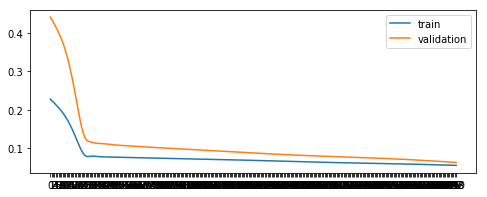

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.plot(fitted.history['loss'], label='train')
if 'val_loss' in fitted.history.keys():
    ax.plot(fitted.history['val_loss'], label='validation')
ax.legend()
ax.set_xticks(np.arange(EPOCH_NUM))
fig.show()

In [22]:
train_Y_hat_array = fitted.model.predict(train_X)
train_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in train_Y])
train_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in train_Y_hat_array])

train_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(train_Y_real, train_Y_hat)]
train_score = np.mean(train_mse_array)
print('Training Score: %.3f RMSE' % train_score)

Training Score: 0.997 RMSE


### Testing

In [23]:
test_Y_hat_array = fitted.model.predict(test_X)
test_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in test_Y])
test_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in test_Y_hat_array])

test_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(test_Y_real, test_Y_hat)]
test_score = np.mean(test_mse_array)
print('Training Score: %.3f RMSE' % test_score)
print('Real\t:\n %s,\nPredict\t:\n %s' % (test_Y_real[-1], test_Y_hat[-1]))

Training Score: 2.071 RMSE
Real	:
 [[ -1.           0.        ]
 [  0.71000004  19.39999962]
 [  0.34000003  19.60000038]
 [ -1.          19.79999924]],
Predict	:
 [[ -7.31450737e-01   6.04535484e+00]
 [  1.53932571e-02   1.66319332e+01]
 [ -4.17421460e-02   1.94050541e+01]
 [ -1.65134966e-01   1.87413883e+01]]


---
# Sequential Output (`TimeDistributed`)

!['lstm_many_to_many_2'](lstm_many_to_many_2.jpg)

!['lstm_many_to_many_3'](lstm_charseq.jpeg)
!['Use of the complete encoded sequence in the decoder network'](lstm_attention_2.png)

### Modeling

In [24]:
_, timestepX, ndimX = train_X.shape
_, timestepY, ndimY = train_Y.shape
#_, ndimY = seq_Y.shape

HIDDEN_SIZE = 16

# simple lstm network learning
model = Sequential()
"""
2D: (batch_size, units)
3D: (batch_size, timesteps, input_dim)
"""
model.add(LSTM(HIDDEN_SIZE,  # Network Node
               input_shape=(timestepX, ndimX),  # Time-step, Feature Number
               #dropout=.3,  # Drop-Out Ratio; Among the Input
               recurrent_dropout=.3,  # Recurrent Drop-out Ratio; Among the Recurrent Network
               return_sequences=True,  # If LSTM Returns the sequence;the same dimension of the input.
               kernel_initializer=keras.initializers.Zeros(),
               recurrent_initializer='zeros',
               bias_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
               use_bias=True
              ))

#model.add(TimeDistributed(Dense(ndimY),  # Network Node
model.add(TimeDistributed(Dense(ndimY,
                               activation='linear',
                               kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                bias_initializer=keras.initializers.Constant(value=0)),  # Network Node
                input_shape=(ylen, ndimY),))  # Time-step, Feature Number

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

pprint(model.weights)
model.summary()

[<tf.Variable 'lstm_2/kernel:0' shape=(3, 64) dtype=float32_ref>,
 <tf.Variable 'lstm_2/recurrent_kernel:0' shape=(16, 64) dtype=float32_ref>,
 <tf.Variable 'lstm_2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'time_distributed_1/kernel:0' shape=(16, 2) dtype=float32_ref>,
 <tf.Variable 'time_distributed_1/bias:0' shape=(2,) dtype=float32_ref>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4, 16)             1280      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 2)              34        
Total params: 1,314
Trainable params: 1,314
Non-trainable params: 0
_________________________________________________________________


### Training

In [25]:
EPOCH_NUM = 300
BATCH_SIZE = 32

fitted = model.fit(seq_X, padded_seq_Y,
                   epochs=EPOCH_NUM,     # How many times to run back_propagation
                   batch_size=BATCH_SIZE,  # How many data to deal with at one epoch
                   verbose=1,       # 1: progress bar, 2: one line per epoch
                   #validation_data=(testX, testY),  # Validation set
                   validation_split=.2,
                   shuffle=False,
                   callbacks=[history])

Train on 74 samples, validate on 19 samples
Epoch 1/300
74/74 [==============================] - 0s 3ms/step - loss: 0.2307 - mean_absolute_error: 0.3528 - val_loss: 0.4456 - val_mean_absolute_error: 0.5255
Epoch 2/300
74/74 [==============================] - 0s 235us/step - loss: 0.2275 - mean_absolute_error: 0.3493 - val_loss: 0.4400 - val_mean_absolute_error: 0.5225
Epoch 3/300
74/74 [==============================] - 0s 231us/step - loss: 0.2241 - mean_absolute_error: 0.3467 - val_loss: 0.4343 - val_mean_absolute_error: 0.5195
Epoch 4/300
74/74 [==============================] - 0s 248us/step - loss: 0.2207 - mean_absolute_error: 0.3442 - val_loss: 0.4286 - val_mean_absolute_error: 0.5166
Epoch 5/300
74/74 [==============================] - 0s 227us/step - loss: 0.2173 - mean_absolute_error: 0.3416 - val_loss: 0.4226 - val_mean_absolute_error: 0.5135
Epoch 6/300
74/74 [==============================] - 0s 244us/step - loss: 0.2138 - mean_absolute_error: 0.3390 - val_loss: 0.4164 - 

74/74 [==============================] - 0s 234us/step - loss: 0.0730 - mean_absolute_error: 0.2202 - val_loss: 0.0997 - val_mean_absolute_error: 0.2816
Epoch 100/300
74/74 [==============================] - 0s 230us/step - loss: 0.0729 - mean_absolute_error: 0.2200 - val_loss: 0.0996 - val_mean_absolute_error: 0.2814
Epoch 101/300
74/74 [==============================] - 0s 244us/step - loss: 0.0729 - mean_absolute_error: 0.2199 - val_loss: 0.0995 - val_mean_absolute_error: 0.2812
Epoch 102/300
74/74 [==============================] - 0s 234us/step - loss: 0.0728 - mean_absolute_error: 0.2198 - val_loss: 0.0993 - val_mean_absolute_error: 0.2811
Epoch 103/300
74/74 [==============================] - 0s 232us/step - loss: 0.0728 - mean_absolute_error: 0.2197 - val_loss: 0.0992 - val_mean_absolute_error: 0.2809
Epoch 104/300
74/74 [==============================] - 0s 233us/step - loss: 0.0727 - mean_absolute_error: 0.2196 - val_loss: 0.0991 - val_mean_absolute_error: 0.2807
Epoch 105/30

Epoch 197/300
74/74 [==============================] - 0s 245us/step - loss: 0.0666 - mean_absolute_error: 0.2049 - val_loss: 0.0856 - val_mean_absolute_error: 0.2560
Epoch 198/300
74/74 [==============================] - 0s 229us/step - loss: 0.0665 - mean_absolute_error: 0.2047 - val_loss: 0.0854 - val_mean_absolute_error: 0.2556
Epoch 199/300
74/74 [==============================] - 0s 240us/step - loss: 0.0664 - mean_absolute_error: 0.2045 - val_loss: 0.0853 - val_mean_absolute_error: 0.2552
Epoch 200/300
74/74 [==============================] - 0s 232us/step - loss: 0.0664 - mean_absolute_error: 0.2042 - val_loss: 0.0851 - val_mean_absolute_error: 0.2548
Epoch 201/300
74/74 [==============================] - 0s 231us/step - loss: 0.0663 - mean_absolute_error: 0.2040 - val_loss: 0.0849 - val_mean_absolute_error: 0.2544
Epoch 202/300
74/74 [==============================] - 0s 241us/step - loss: 0.0662 - mean_absolute_error: 0.2038 - val_loss: 0.0847 - val_mean_absolute_error: 0.254

74/74 [==============================] - 0s 231us/step - loss: 0.0613 - mean_absolute_error: 0.1904 - val_loss: 0.0756 - val_mean_absolute_error: 0.2313
Epoch 247/300
74/74 [==============================] - 0s 233us/step - loss: 0.0611 - mean_absolute_error: 0.1900 - val_loss: 0.0754 - val_mean_absolute_error: 0.2309
Epoch 248/300
74/74 [==============================] - 0s 234us/step - loss: 0.0610 - mean_absolute_error: 0.1896 - val_loss: 0.0752 - val_mean_absolute_error: 0.2304
Epoch 249/300
74/74 [==============================] - 0s 266us/step - loss: 0.0609 - mean_absolute_error: 0.1892 - val_loss: 0.0750 - val_mean_absolute_error: 0.2299
Epoch 250/300
74/74 [==============================] - 0s 237us/step - loss: 0.0608 - mean_absolute_error: 0.1888 - val_loss: 0.0748 - val_mean_absolute_error: 0.2294
Epoch 251/300
74/74 [==============================] - 0s 234us/step - loss: 0.0607 - mean_absolute_error: 0.1884 - val_loss: 0.0746 - val_mean_absolute_error: 0.2290
Epoch 252/30

### Scoring

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


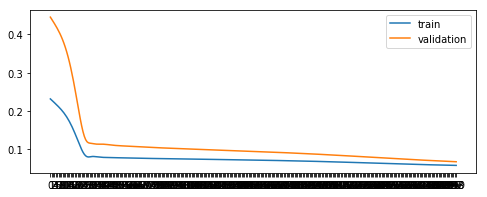

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.plot(fitted.history['loss'], label='train')
if 'val_loss' in fitted.history.keys():
    ax.plot(fitted.history['val_loss'], label='validation')
ax.legend()
ax.set_xticks(np.arange(EPOCH_NUM))
fig.show()

In [27]:
train_Y_hat_array = fitted.model.predict(train_X)
train_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in train_Y])
train_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in train_Y_hat_array])

train_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(train_Y_real, train_Y_hat)]
train_score = np.mean(train_mse_array)
print('Training Score: %.3f RMSE' % train_score)

Training Score: 1.069 RMSE


### Testing

In [28]:
test_Y_hat_array = fitted.model.predict(test_X)
test_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in test_Y])
test_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in test_Y_hat_array])

test_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(test_Y_real, test_Y_hat)]
test_score = np.mean(test_mse_array)
print('Training Score: %.3f RMSE' % test_score)
print('Real\t:\n %s,\nPredict\t:\n %s' % (test_Y_real[-1], test_Y_hat[-1]))

Training Score: 2.219 RMSE
Real	:
 [[ -1.           0.        ]
 [  0.71000004  19.39999962]
 [  0.34000003  19.60000038]
 [ -1.          19.79999924]],
Predict	:
 [[ -0.64096427   6.34051943]
 [ -0.04348934  16.17313385]
 [ -0.02096432  19.92650604]
 [ -0.11960101  20.42235947]]


---
# Bidirectional LSTM

!['lstm_many_to_many_2'](lstm_many_to_many_2.jpg)

!['lstm_seq_to_seq_1'](rnn_bidirectional_2.png)

!['lstm_bidirectional'](lstm_bidirectional.jpg)

### Modeling

In [29]:
_, timestepX, ndimX = train_X.shape
_, timestepY, ndimY = train_Y.shape
#_, ndimY = seq_Y.shape

HIDDEN_SIZE = 16

# simple lstm network learning
model = Sequential()
"""
2D: (batch_size, units)
3D: (batch_size, timesteps, input_dim)
"""
model.add(Bidirectional(LSTM(HIDDEN_SIZE,  # Network Node
               input_shape=(timestepX, ndimX),  # Time-step, Feature Number
               #dropout=.3,  # Drop-Out Ratio; Among the Input
               recurrent_dropout=.3,  # Recurrent Drop-out Ratio; Among the Recurrent Network
               return_sequences=True,  # If LSTM Returns the sequence;the same dimension of the input.
               kernel_initializer=keras.initializers.Zeros(),
               recurrent_initializer='zeros',
               bias_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
               use_bias=True
              ), merge_mode='concat',  # {'sum', 'mul', 'concat', 'ave', None}
                input_shape=(timestepX, ndimX)))

#model.add(TimeDistributed(Dense(ndimY),  # Network Node
model.add(TimeDistributed(Dense(ndimY,
                               activation='linear',
                               kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                               bias_initializer=keras.initializers.Constant(value=0)),  # Network Node
                input_shape=(ylen, ndimY),))  # Time-step, Feature Number

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

pprint(model.weights)
model.summary()

[<tf.Variable 'bidirectional_1/forward_lstm_3/kernel:0' shape=(3, 64) dtype=float32_ref>,
 <tf.Variable 'bidirectional_1/forward_lstm_3/recurrent_kernel:0' shape=(16, 64) dtype=float32_ref>,
 <tf.Variable 'bidirectional_1/forward_lstm_3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'bidirectional_1/backward_lstm_3/kernel:0' shape=(3, 64) dtype=float32_ref>,
 <tf.Variable 'bidirectional_1/backward_lstm_3/recurrent_kernel:0' shape=(16, 64) dtype=float32_ref>,
 <tf.Variable 'bidirectional_1/backward_lstm_3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'time_distributed_2/kernel:0' shape=(32, 2) dtype=float32_ref>,
 <tf.Variable 'time_distributed_2/bias:0' shape=(2,) dtype=float32_ref>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 4, 32)             2560      
_________________________________________________________________
time_distributed_2 (TimeDist

### Training

In [30]:
EPOCH_NUM = 300
BATCH_SIZE = 32

fitted = model.fit(seq_X, padded_seq_Y,
                   epochs=EPOCH_NUM,     # How many times to run back_propagation
                   batch_size=BATCH_SIZE,  # How many data to deal with at one epoch
                   verbose=1,       # 1: progress bar, 2: one line per epoch
                   #validation_data=(testX, testY),  # Validation set
                   validation_split=.2,
                   shuffle=False,
                   callbacks=[history])

Train on 74 samples, validate on 19 samples
Epoch 1/300
74/74 [==============================] - 0s 7ms/step - loss: 0.2271 - mean_absolute_error: 0.3490 - val_loss: 0.4388 - val_mean_absolute_error: 0.5215
Epoch 2/300
74/74 [==============================] - 0s 393us/step - loss: 0.2228 - mean_absolute_error: 0.3455 - val_loss: 0.4309 - val_mean_absolute_error: 0.5178
Epoch 3/300
74/74 [==============================] - 0s 414us/step - loss: 0.2182 - mean_absolute_error: 0.3424 - val_loss: 0.4227 - val_mean_absolute_error: 0.5141
Epoch 4/300
74/74 [==============================] - 0s 402us/step - loss: 0.2135 - mean_absolute_error: 0.3393 - val_loss: 0.4141 - val_mean_absolute_error: 0.5101
Epoch 5/300
74/74 [==============================] - 0s 401us/step - loss: 0.2086 - mean_absolute_error: 0.3361 - val_loss: 0.4049 - val_mean_absolute_error: 0.5058
Epoch 6/300
74/74 [==============================] - 0s 388us/step - loss: 0.2035 - mean_absolute_error: 0.3330 - val_loss: 0.3951 - 

74/74 [==============================] - 0s 415us/step - loss: 0.0714 - mean_absolute_error: 0.2160 - val_loss: 0.0953 - val_mean_absolute_error: 0.2726
Epoch 100/300
74/74 [==============================] - 0s 402us/step - loss: 0.0712 - mean_absolute_error: 0.2157 - val_loss: 0.0950 - val_mean_absolute_error: 0.2720
Epoch 101/300
74/74 [==============================] - 0s 406us/step - loss: 0.0711 - mean_absolute_error: 0.2154 - val_loss: 0.0947 - val_mean_absolute_error: 0.2714
Epoch 102/300
74/74 [==============================] - 0s 390us/step - loss: 0.0710 - mean_absolute_error: 0.2151 - val_loss: 0.0944 - val_mean_absolute_error: 0.2708
Epoch 103/300
74/74 [==============================] - 0s 395us/step - loss: 0.0708 - mean_absolute_error: 0.2148 - val_loss: 0.0940 - val_mean_absolute_error: 0.2702
Epoch 104/300
74/74 [==============================] - 0s 400us/step - loss: 0.0707 - mean_absolute_error: 0.2144 - val_loss: 0.0937 - val_mean_absolute_error: 0.2695
Epoch 105/30

74/74 [==============================] - 0s 385us/step - loss: 0.0502 - mean_absolute_error: 0.1482 - val_loss: 0.0507 - val_mean_absolute_error: 0.1574
Epoch 198/300
74/74 [==============================] - 0s 390us/step - loss: 0.0501 - mean_absolute_error: 0.1473 - val_loss: 0.0506 - val_mean_absolute_error: 0.1569
Epoch 199/300
74/74 [==============================] - 0s 401us/step - loss: 0.0499 - mean_absolute_error: 0.1464 - val_loss: 0.0505 - val_mean_absolute_error: 0.1564
Epoch 200/300
74/74 [==============================] - 0s 401us/step - loss: 0.0498 - mean_absolute_error: 0.1455 - val_loss: 0.0504 - val_mean_absolute_error: 0.1561
Epoch 201/300
74/74 [==============================] - 0s 406us/step - loss: 0.0497 - mean_absolute_error: 0.1447 - val_loss: 0.0504 - val_mean_absolute_error: 0.1559
Epoch 202/300
74/74 [==============================] - 0s 392us/step - loss: 0.0496 - mean_absolute_error: 0.1440 - val_loss: 0.0504 - val_mean_absolute_error: 0.1559
Epoch 203/30

74/74 [==============================] - 0s 403us/step - loss: 0.0478 - mean_absolute_error: 0.1321 - val_loss: 0.0501 - val_mean_absolute_error: 0.1521
Epoch 296/300
74/74 [==============================] - 0s 398us/step - loss: 0.0478 - mean_absolute_error: 0.1320 - val_loss: 0.0501 - val_mean_absolute_error: 0.1521
Epoch 297/300
74/74 [==============================] - 0s 404us/step - loss: 0.0478 - mean_absolute_error: 0.1319 - val_loss: 0.0501 - val_mean_absolute_error: 0.1520
Epoch 298/300
74/74 [==============================] - 0s 398us/step - loss: 0.0478 - mean_absolute_error: 0.1319 - val_loss: 0.0501 - val_mean_absolute_error: 0.1519
Epoch 299/300
74/74 [==============================] - 0s 399us/step - loss: 0.0478 - mean_absolute_error: 0.1318 - val_loss: 0.0500 - val_mean_absolute_error: 0.1518
Epoch 300/300
74/74 [==============================] - 0s 418us/step - loss: 0.0478 - mean_absolute_error: 0.1317 - val_loss: 0.0500 - val_mean_absolute_error: 0.1517


### Scoring

In [31]:
fitted.history['loss']

[0.22705792816909584,
 0.22276287384935328,
 0.21817503668166496,
 0.21346124281754364,
 0.20860079172495249,
 0.20353476340706284,
 0.19818228885934158,
 0.19249352168392492,
 0.18643150458464752,
 0.17993832923270561,
 0.17302451745883837,
 0.16570731272568573,
 0.15803169277874199,
 0.15007506431760015,
 0.14195165078382235,
 0.13381537231239113,
 0.12585721225351901,
 0.1182896567357553,
 0.11131044658454689,
 0.10505345181838886,
 0.099569237312755063,
 0.094862359198364055,
 0.090933422381813456,
 0.08778561329519427,
 0.085405887381450551,
 0.083737054588021456,
 0.082656202686799546,
 0.081979240920092608,
 0.081503165734780808,
 0.081069800499323247,
 0.080608709841161155,
 0.080129556357860565,
 0.079677872963853785,
 0.079292068610320218,
 0.078984474410881869,
 0.078744588268769761,
 0.078551795434307403,
 0.078386784606688728,
 0.078236473975954832,
 0.078095068601337636,
 0.077960867334056549,
 0.077833430187122243,
 0.077711735625524775,
 0.077593692251153895,
 0.0774767

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


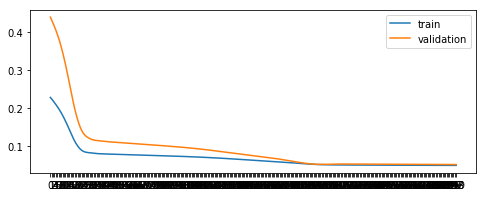

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.plot(fitted.history['loss'], label='train')
if 'val_loss' in fitted.history.keys():
    ax.plot(fitted.history['val_loss'], label='validation')
ax.legend()
ax.set_xticks(np.arange(EPOCH_NUM))
fig.show()

In [33]:
train_Y_hat_array = fitted.model.predict(train_X)
train_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in train_Y])
train_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in train_Y_hat_array])

train_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(train_Y_real, train_Y_hat)]
train_score = np.mean(train_mse_array)
print('Training Score: %.3f RMSE' % train_score)

Training Score: 0.510 RMSE


### Testing

In [34]:
test_Y_hat_array = fitted.model.predict(test_X)
test_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in test_Y])
test_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in test_Y_hat_array])

test_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(test_Y_real, test_Y_hat)]
test_score = np.mean(test_mse_array)
print('Training Score: %.3f RMSE' % test_score)
print('Real\t:\n %s,\nPredict\t:\n %s' % (test_Y_real[-1], test_Y_hat[-1]))

Training Score: 0.803 RMSE
Real	:
 [[ -1.           0.        ]
 [  0.71000004  19.39999962]
 [  0.34000003  19.60000038]
 [ -1.          19.79999924]],
Predict	:
 [[ -0.83619463   2.2648859 ]
 [  0.1841619   18.25313187]
 [  0.13531947  20.14250565]
 [ -0.10308242  17.62427139]]


Done.